<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Association_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign7: Outliers/outlier_missfr.xlsx')
df.head()

PatientUID  PatientVisitUID     Slopes  InPatient  OutPatient  Emergency  \
0        2299          3386255  -7.158596          0           1          0   
1        2299          4546471   5.550691          0           1          0   
2        2299          5812902  -6.063710          0           1          0   
3        2299          6947220 -12.812245          0           1          0   
4        2299          8186767  28.287500          0           1          0   

                   time_t1  eGFR_t1               VisitLocation  \
0  2017-10-03 09:19:54.710    63.60  เวชปฏิบัติทั่วไป (OPD)-D03   
1  2018-12-12 09:18:49.913    70.20  เวชปฏิบัติทั่วไป (OPD)-D03   
2  2019-12-19 09:51:24.427    64.02  เวชปฏิบัติทั่วไป (OPD)-D03   
3  2021-03-04 10:01:42.113    48.54  เวชปฏิบัติทั่วไป (OPD)-D03   
4  2022-04-21 08:45:54.580    80.47  เวชปฏิบัติทั่วไป (OPD)-D03   

                StartDTTM  ... L14-WBC L15-Platelet  L19-Blood-sugar  \
0 2016-08-15 08:13:26.043  ...  4.9248       194.24             91.0   
1 2017-10-03 07:37:22.777  ...  5.1634       251.46             86.0   
2 2018-12-12 07:58:57.190  ...  9.4100       313.00            100.0   
3 2019-12-19 08:19:38.647  ...  4.3718       204.65             89.0   
4 2021-03-04 07:55:40.703  ...  5.4200       434.00             88.0   

   L20-HbA1c  L21-Cholesterol  L22-Triglyceride  L23-LDL-Cholesterol  \
0      5.284            215.0              81.0                123.0   
1      5.755            219.0              64.0                146.0   
2      5.300            193.0              62.0                129.0   
3      5.562            205.0              69.0                139.0   
4      5.500            198.0              74.0                129.0   

   L24-HDL-Cholesterol  L28-UrineProtein-Cr-ratio  LabLocation  
0                 99.0                     21.019            1  
1                 73.0                     15.198            1  
2                 65.0                     30.879            1  
3                 76.0                     36.916            1  
4                 60.0                     28.684            1  

[5 rows x 82 columns]

In [3]:
df.columns

Index(['PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient', 'OutPatient',
       'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failu

In [8]:
selected_columns = ['InPatient', 'OutPatient','Emergency',
      'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP','Slopes',
    'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
    'L1-eGFR', 'L2-BUN',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
df_selected = df[selected_columns]

In [9]:
df_selected.shape

(52620, 72)

In [10]:
df_selected.describe()

InPatient    OutPatient     Emergency           Sex           Age  \
count  52620.000000  52620.000000  52620.000000  52620.000000  52620.000000   
mean       0.088027      0.868890      0.043082      0.479932     66.812828   
std        0.283337      0.337524      0.203045      0.499602     11.646585   
min        0.000000      0.000000      0.000000      0.000000     18.000000   
25%        0.000000      1.000000      0.000000      0.000000     60.000000   
50%        0.000000      1.000000      0.000000      0.000000     67.000000   
75%        0.000000      1.000000      0.000000      1.000000     75.000000   
max        1.000000      1.000000      1.000000      1.000000    102.000000   

              NATNL           BMI           BSA  Diastolic-BP   Systolic-BP  \
count  52620.000000  52620.000000  52620.000000  52620.000000  52620.000000   
mean       0.013816     24.657083      1.656821     73.153166    136.058107   
std        0.168555      3.652668      0.164151     11.533484     17.253685   
min        0.000000     11.120000      1.000000     11.000000     60.000000   
25%        0.000000     22.370000      1.540000     66.000000    126.000000   
50%        0.000000     24.467650      1.650000     73.000000    136.000000   
75%        0.000000     26.560000      1.770000     80.000000    146.000000   
max        3.000000     49.430000      3.000000    120.000000    200.000000   

       ...  L13-Hematocrit       L14-WBC  L15-Platelet  L19-Blood-sugar  \
count  ...    52620.000000  52620.000000  52620.000000     52620.000000   
mean   ...       38.087801      7.279853    246.952447       120.499811   
std    ...        5.020433      2.276061     74.997597        49.196827   
min    ...        0.000000      1.250000     31.000000        40.000000   
25%    ...       35.300000      5.890000    202.000000        93.000000   
50%    ...       38.458000      6.971500    241.000000       104.000000   
75%    ...       41.562000      8.200000    285.000000       131.402500   
max    ...       67.000000     29.900000    998.000000       989.000000   

          L20-HbA1c  L21-Cholesterol  L22-Triglyceride  L23-LDL-Cholesterol  \
count  52620.000000     52620.000000      52620.000000         52620.000000   
mean       6.519305       175.662508        139.219384           111.819297   
std        1.399190        40.744457         72.447643            34.752885   
min        4.000000        29.000000         20.000000            10.000000   
25%        5.600000       152.000000         94.457500            89.000000   
50%        6.045000       173.050000        117.000000           110.000000   
75%        7.000000       193.672500        166.490000           128.000000   
max       15.000000       865.000000        856.000000           300.000000   

       L24-HDL-Cholesterol  L28-UrineProtein-Cr-ratio  
count         52620.000000               52620.000000  
mean             52.145962                  88.277345  
std              12.711384                  58.046303  
min              20.000000                   0.000000  
25%              44.000000                  39.822000  
50%              50.000000                  76.425000  
75%              59.780000                 125.958250  
max             196.000000                 499.000000  

[8 rows x 72 columns]

In [11]:
df_selected.head()

InPatient  OutPatient  Emergency  Sex  Age  NATNL    BMI   BSA  \
0          0           1          0    1   73      0  20.80  1.39   
1          0           1          0    1   74      0  20.27  1.38   
2          0           1          0    1   75      0  20.72  1.38   
3          0           1          0    1   76      0  20.27  1.36   
4          0           1          0    1   78      0  19.05  1.33   

   Diastolic-BP  Systolic-BP  ...  L13-Hematocrit  L14-WBC  L15-Platelet  \
0          75.0        127.0  ...          39.367   4.9248        194.24   
1          64.0        105.0  ...          41.270   5.1634        251.46   
2          76.0        138.0  ...          32.400   9.4100        313.00   
3          66.0        134.0  ...          39.053   4.3718        204.65   
4          57.0        103.0  ...          34.600   5.4200        434.00   

   L19-Blood-sugar  L20-HbA1c  L21-Cholesterol  L22-Triglyceride  \
0             91.0      5.284            215.0              81.0   
1             86.0      5.755            219.0              64.0   
2            100.0      5.300            193.0              62.0   
3             89.0      5.562            205.0              69.0   
4             88.0      5.500            198.0              74.0   

   L23-LDL-Cholesterol  L24-HDL-Cholesterol  L28-UrineProtein-Cr-ratio  
0                123.0                 99.0                     21.019  
1                146.0                 73.0                     15.198  
2                129.0                 65.0                     30.879  
3                139.0                 76.0                     36.916  
4                129.0                 60.0                     28.684  

[5 rows x 72 columns]

##แบ่งข้อมูล

### Age

In [ ]:
df_selected['Age'].min()

18

In [ ]:
df_selected['Age'].max()

102

In [ ]:
#from pandas import cut

# Create bins and labels
#bins = [i for i in range(18, 108, 5)]  # Extend bins to include up to 102
#labels = [f"[{i},{i + 4})" for i in range(18, 103, 5)]  # Adjusted labels to match bins

# Apply the binning to the 'Age' column
#df_selected["age"] = df_selected.Age.apply(lambda x: -1 if x < 18 or x > 102 else x)
#df_selected["age"] = cut(df_selected["Age"], bins, right=False, labels=labels).astype(str)

In [12]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [18, 65]
labels = ['Adult', 'Older']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['Age_range'] = binning(df_selected['Age'], cut_points, labels)

<ipython-input-12-9afb82a88996>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Age_range'] = binning(df_selected['Age'], cut_points, labels)


https://service-manual.nhs.uk/content/inclusive-content/age

###Slope

In [13]:
def categorize_slope(slope):
    if slope < 0.75:
        return 'Stable and better'  # Slope ลดลงน้อยกว่า 0.75 ml/min/year
    elif slope > 5:
        return 'Worse'  # Slope ลดลงมากกว่า 5 ml/min/year
    elif 0.75 <= slope <= 5:
        return 'Between'  # Slope อยู่ระหว่าง 0.75 และ 5 ml/min/year #Intermediate
    else:
        return 'Out of range'  # กรณีที่ไม่อยู่ในช่วงที่กำหนด

# Assuming df_selected is your DataFrame and 'Slopes' is a column in it
# Replace df_selected['Slopes'] with your actual column name if different
df_selected['Slopes_Category'] = df_selected['Slopes'].apply(categorize_slope)

<ipython-input-13-8cb916193fa8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Slopes_Category'] = df_selected['Slopes'].apply(categorize_slope)


###eGFR_t1 & L1-eGFR

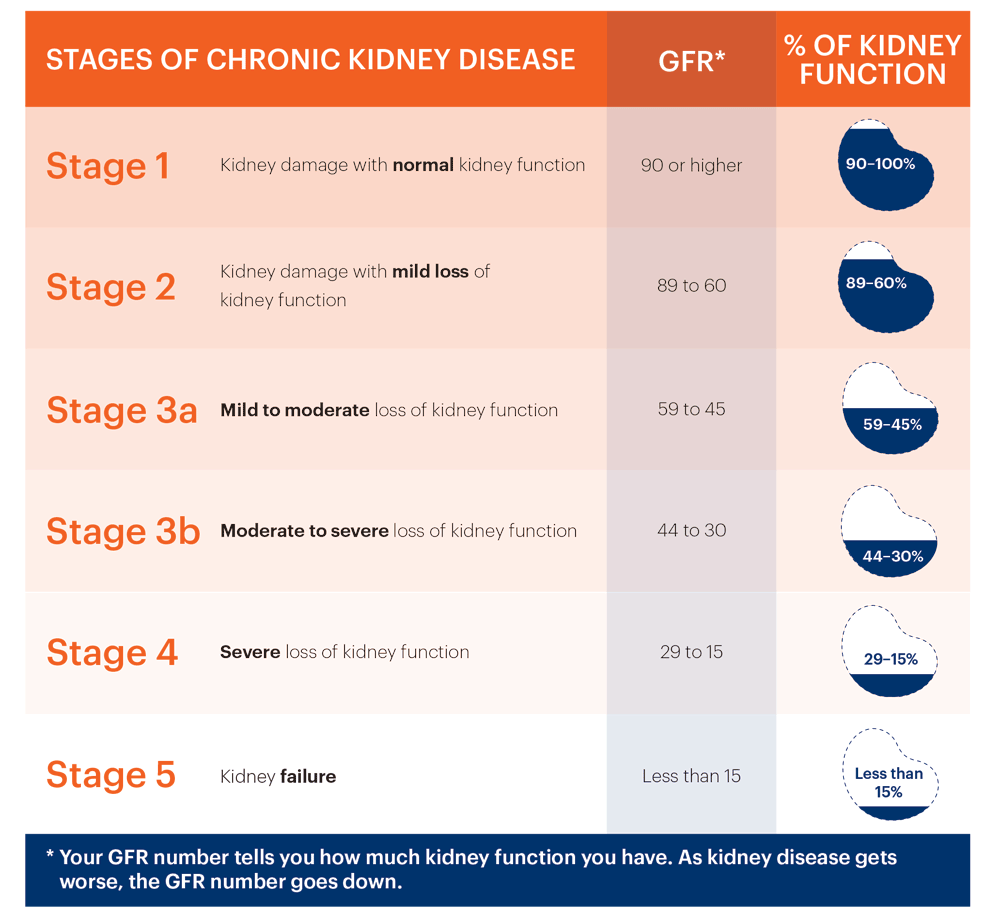

In [14]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
#df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)

<ipython-input-14-444b60a36127>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['eGFR_Category'] = df_selected['L1-eGFR'].apply(categorize_eGFR)


แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-estimated-glomerular-filtration-rate-egfr

###Systolic BP

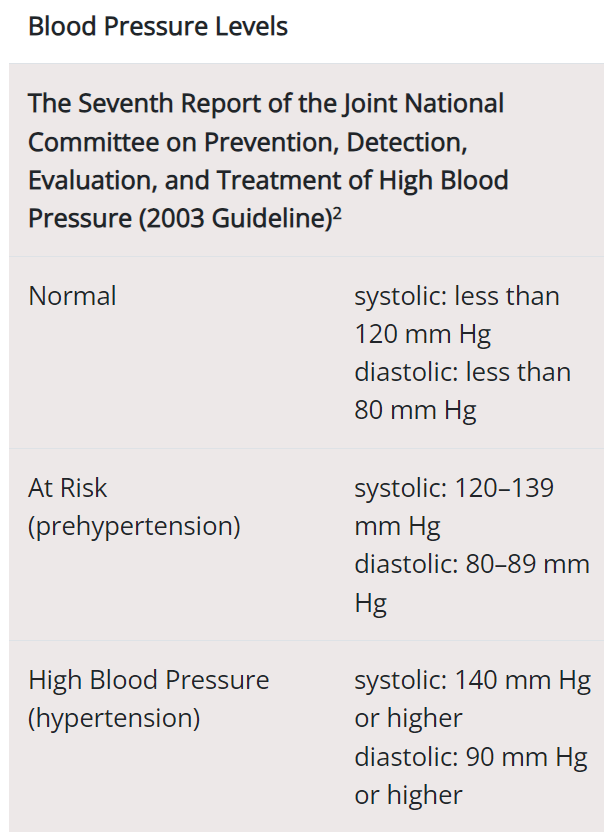

In [15]:
import pandas as pd

def binning(col, cut_points, labels):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))  # Sort the cut_points in ascending order
    break_points = [minval] + cut_points + [maxval]
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

# กำหนดค่าที่ต้องการแบ่งช่วง
cut_points = [119, 139]
labels = ['Normal', 'Risk', 'Hypertension']

# สมมติว่า df_selected เป็น DataFrame ของคุณและ 'Systolic-BP' เป็นชื่อคอลัมน์ที่ต้องการใช้
# แทน df_selected['Systolic-BP'] ด้วยชื่อคอลัมน์ของคุณ
df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)

<ipython-input-15-981471f26f10>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['SBP'] = binning(df_selected['Systolic-BP'], cut_points, labels)


In [ ]:
df_selected[df_selected['Systolic-BP'] <= 120][['SBP', 'Systolic-BP']].head()

SBP  Systolic-BP
1   Normal        105.0
4   Normal        103.0
9   Normal        116.0
14    Risk        120.0
64  Normal        116.0

แหล่งที่มา : https://www.cdc.gov/bloodpressure/about.htm

###Diastolic BP

In [16]:
import pandas as pd

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    cut_points = sorted(set(cut_points))
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points) + 1)
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True, duplicates='drop')
    return colBin

# Example cut points and labels
cut_points = [79, 89]
labels = ['Normal', 'Risk','hypertension']

# Assuming df_selected is your DataFrame and 'Age' is a column in it
# Replace df_selected['Age'] with your actual column name if different
df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)

<ipython-input-16-e4b2b581c09f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DBP'] = binning(df_selected['Diastolic-BP'], cut_points, labels)


แหล่งที่มา : https://www.cdc.gov/bloodpressure/about.htm

###BSA

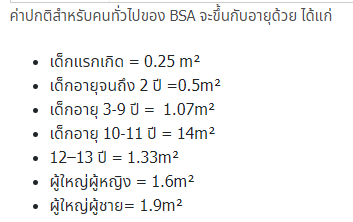

In [17]:
def interpret_BSA_by_sex(BSA_value, sex):
    if sex == 0:  # Male
        if BSA_value == 1.9:
            return 'Normal'
        elif BSA_value < 1.9:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if BSA_value == 1.6:
            return 'Normal'
        elif BSA_value < 1.6:
            return 'Low'
        else:
            return 'High'

# Add a new column 'BSA_Interpretation' based on 'BSA' values and 'Sex'
df_selected['BSA_range'] = df_selected.apply(lambda row: interpret_BSA_by_sex(row['BSA'], row['Sex']), axis=1)

<ipython-input-17-0fef12d150bf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BSA_range'] = df_selected.apply(lambda row: interpret_BSA_by_sex(row['BSA'], row['Sex']), axis=1)


แหล่งที่มา : https://www.rxlist.com/body_surface_area/definition.htm

###BMI

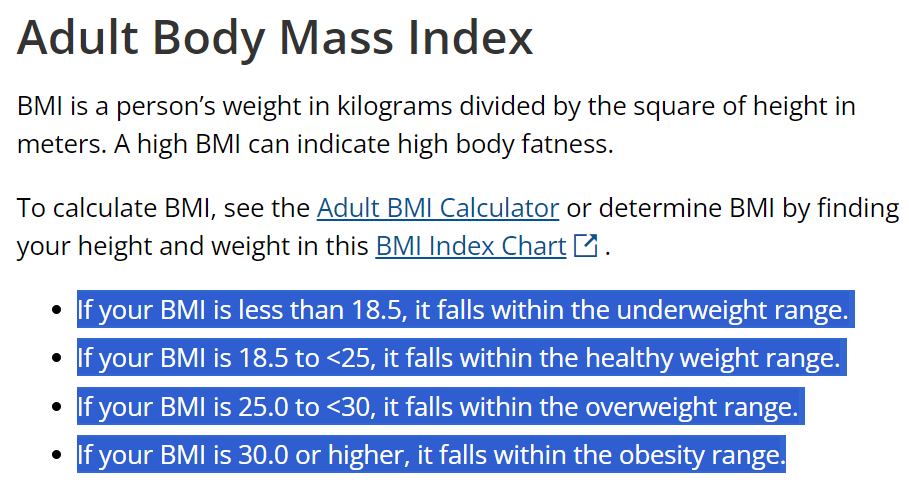

In [18]:
def interpret_BMI(BMI_value):
    if BMI_value < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI_value < 25:
        return 'Healthy weight'
    elif 25 <= BMI_value < 30:
        return 'Overweight'
    else:
        return 'Obesity'

# เพิ่มคอลัมน์ 'bmi' ที่บอกระดับของ 'interpret_BMI'
df_selected['BMI_range'] = df_selected['BMI'].apply(interpret_BMI)

<ipython-input-18-cb8db4119a6f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BMI_range'] = df_selected['BMI'].apply(interpret_BMI)


แหล่งที่มา : https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.

###BUN

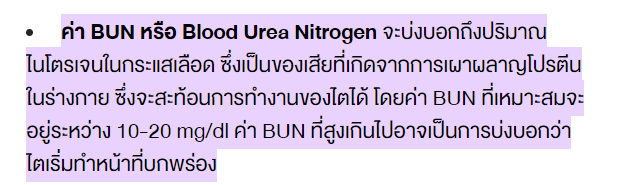

In [19]:
def interpret_BUN(BUN_value):
    if BUN_value < 10:
        return 'Low'
    elif 10 <= BUN_value <= 20:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'BUN_level' based on 'BUN' values
df_selected['BUN'] = df_selected['L2-BUN'].apply(interpret_BUN)

<ipython-input-19-6adf039b1a1c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BUN'] = df_selected['L2-BUN'].apply(interpret_BUN)


แหล่งที่มา : https://hdmall.co.th/c/kidney-screening

###Creatinine

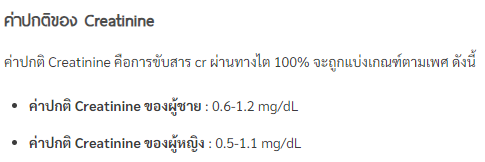

In [ ]:
#def interpret_creatinine_by_sex(creatinine_value, sex):
#   if sex == 0:  # Male
 #       if 0.6 <= creatinine_value <= 1.2:
 #           return 'Normal'
  #      elif creatinine_value < 0.6:
  #          return 'Low'
  #      else:
  #          return 'High'
  #  elif sex == 1:  # Female
  #      if 0.5 <= creatinine_value <= 1.1:
  #          return 'Normal'
 #       elif creatinine_value < 0.5:
  #          return 'Low'
 #       else:
  #          return 'High'

# Add a new column 'Creatinine_Interpretation' based on 'Creatinine' values and 'Sex'
#df_selected['Creatinine'] = df_selected.apply(lambda row: interpret_creatinine_by_sex(row['L3-Creatinine'], row['Sex']), axis=1)

แหล่งที่มา : https://www.samitivejchinatown.com/th/health-article/renal-function-test

###Sodium

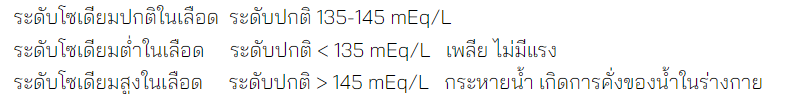

In [20]:
def interpret_sodium(sodium_value):
    if sodium_value < 135:
        return 'Low'
    elif 135 <= sodium_value <= 145:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'sodium_level' based on 'L4-Sodium' values
df_selected['Sodium'] = df_selected['L4-Sodium'].apply(interpret_sodium)

<ipython-input-20-f18c87546b5d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sodium'] = df_selected['L4-Sodium'].apply(interpret_sodium)


แหล่งที่มา : https://sriphat.med.cmu.ac.th/th/knowledge-61#:~:text=%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%20%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3&text=%E0%B8%A3%E0%B8%B0%E0%B8%94%E0%B8%B1%E0%B8%9A%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4%E0%B9%83%E0%B8%99%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%94,%E0%B8%84%E0%B8%B1%E0%B9%88%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B9%83%E0%B8%99%E0%B8%A3%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A2

###Potassium

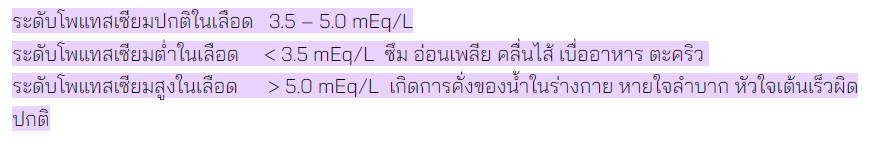

In [21]:
def interpret_potassium(potassium_value):
    if potassium_value < 3.5:
        return 'Low'
    elif 3.5 <= potassium_value <= 5.0:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'potassium_level' based on 'L5-Potassium' values
df_selected['Potassium'] = df_selected['L5-Potassium'].apply(interpret_potassium)


แหล่งที่มา : https://sriphat.med.cmu.ac.th/th/knowledge-61#:~:text=%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%20%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3&text=%E0%B8%A3%E0%B8%B0%E0%B8%94%E0%B8%B1%E0%B8%9A%E0%B9%82%E0%B8%8B%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4%E0%B9%83%E0%B8%99%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%94,%E0%B8%84%E0%B8%B1%E0%B9%88%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B9%83%E0%B8%99%E0%B8%A3%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A2

###Chloride

In [22]:
def interpret_chloride(chloride_value):
    if chloride_value < 96:
        return 'Low'
    elif 96 <= chloride_value <= 106:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'chloride_level' based on 'L6-Chloride' values
df_selected['Chloride'] = df_selected['L6-Chloride'].apply(interpret_chloride)


แหล่งที่มา : https://www.mountsinai.org/health-library/tests/chloride-test-blood#:~:text=Normal%20Results,vary%20slightly%20among%20different%20laboratories.

###Bicarbonate

In [23]:
def interpret_bicarbonate(bicarbonate_value):
    if bicarbonate_value < 22:
        return 'Low'
    elif 22 <= bicarbonate_value <= 29:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'bicarbonate_level' based on 'L7-Bicarbonate' values
df_selected['Bicarbonate'] = df_selected['L7-Bicarbonate'].apply(interpret_bicarbonate)


แหล่งที่มา : https://www.kidney.org/content/kidney-failure-risk-factor-serum-bicarbonate

###Uric

https://www.ucsfhealth.org/medical-tests/uric-acid----blood-

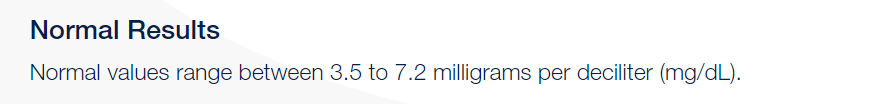

In [24]:
def interpret_uric(uric_value):
     if uric_value < 3.5:
        return 'Low'
     elif 3.5 <= uric_value <= 7.2:
        return 'Normal'
     else:
        return 'High'

# Add a new column 'uric' based on 'L8-Uric' values
df_selected['Uric'] = df_selected['L8-Uric'].apply(interpret_uric)


###Calcium

https://www.ucsfhealth.org/medical-tests/calcium-blood-test#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

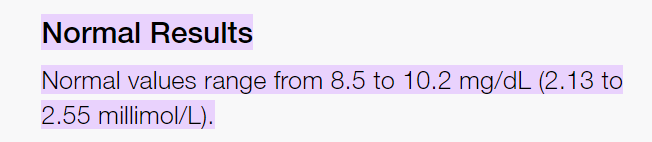

In [25]:
def interpret_calcium(calcium_value):
    if calcium_value < 8.5:
        return 'Low'
    elif 8.5 <= calcium_value <= 10.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'calcium_level' based on 'L9-Calcium' values
df_selected['Calcium'] = df_selected['L9-Calcium'].apply(interpret_calcium)


###Phosphorus

https://www.ucsfhealth.org/medical-tests/phosphorus-blood-test

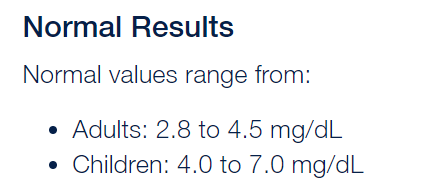

In [26]:
def interpret_phosphorus(phosphorus_value):
    if phosphorus_value < 2.8:
        return 'Low'
    elif 2.8 <= phosphorus_value <= 4.5:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'phosphorus_level' based on 'L10-Phosphorus' values
df_selected['Phosphorus'] = df_selected['L10-Phosphorus'].apply(interpret_phosphorus)


###Albumin

https://www.ucsfhealth.org/medical-tests/albumin-blood-(serum)-test#:~:text=The%20normal%20range%20is%203.4,vary%20slightly%20among%20different%20laboratories.

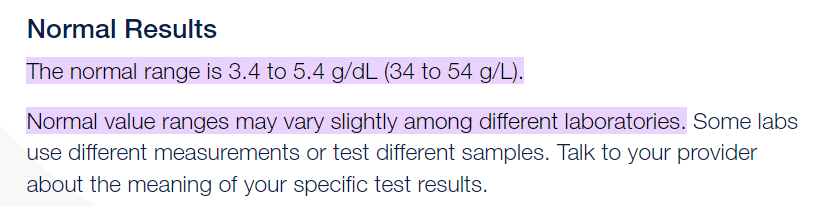

In [27]:
def interpret_albumin(albumin_value):
    if albumin_value < 3.4:
        return 'Low'
    elif 3.4 <= albumin_value <= 5.4:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['Albumin'] = df_selected['L11-Albumin'].apply(interpret_albumin)


###Hemoglobin

https://www.ucsfhealth.org/medical-tests/hemoglobin

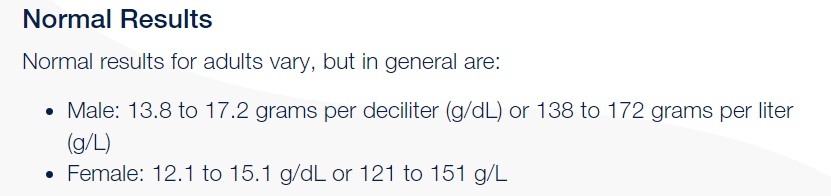

In [28]:
def interpret_Hemoglobin_by_sex(Hemoglobin_value, sex):
    if sex == 0:  # Male
        if 13.8 <= Hemoglobin_value <= 17.2:
            return 'Normal'
        elif Hemoglobin_value < 13.8:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 12.1 <= Hemoglobin_value <= 15.1:
            return 'Normal'
        elif Hemoglobin_value < 12.1:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hemoglobinl' based on 'L12-Hemoglobin' values and 'Sex'
df_selected['Hemoglobin'] = df_selected.apply(lambda row: interpret_Hemoglobin_by_sex(row['L12-Hemoglobin'], row['Sex']), axis=1)


###Hematocrit

https://www.redcrossblood.org/donate-blood/dlp/hematocrit.html#:~:text=A%20hematocrit%20level%20below%20the,may%20indicate%20polycythemia%20or%20erythrocytosis.

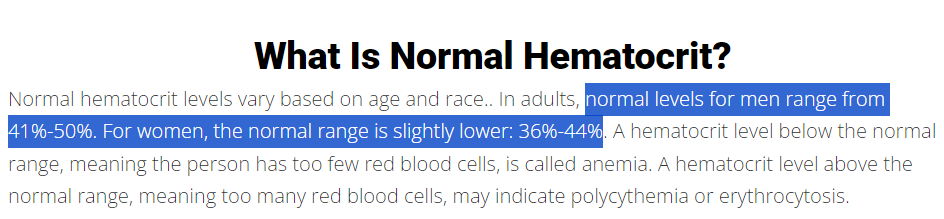

In [29]:
def interpret_Hematocrit_by_sex(Hematocrit_value, sex):
    if sex == 0:  # Male
        if 41 <= Hematocrit_value <= 50:
            return 'Normal'
        elif Hematocrit_value < 41:
            return 'Low'
        else:
            return 'High'
    elif sex == 1:  # Female
        if 36 <= Hematocrit_value <= 44:
            return 'Normal'
        elif Hematocrit_value < 36:
            return 'Low'
        else:
            return 'High'

# Add a new column 'Hematocrit' based on 'L13-Hematocrit' values and 'Sex'
df_selected['Hematocrit'] = df_selected.apply(lambda row: interpret_Hematocrit_by_sex(row['L13-Hematocrit'], row['Sex']), axis=1)


###WBC

https://www.mountsinai.org/health-library/tests/wbc-count#:~:text=Normal%20Results,or%20may%20test%20different%20specimens.

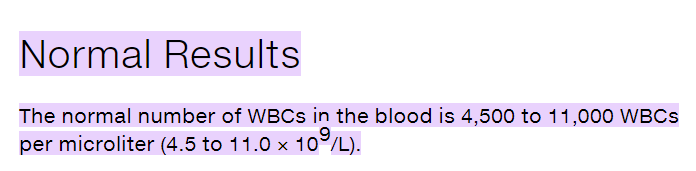

In [30]:
def interpret_WBC(WBC_value):
    if WBC_value < 4.5:
        return 'Low'
    elif 4.5 <= WBC_value <= 11:
        return 'Normal'
    else:
        return 'High'

# Add a new column 'albumin_level' based on 'L11-Albumin' values
df_selected['WBC'] = df_selected['L14-WBC'].apply(interpret_WBC)


###Platelet

https://www.ucsfhealth.org/medical-tests/platelet-count

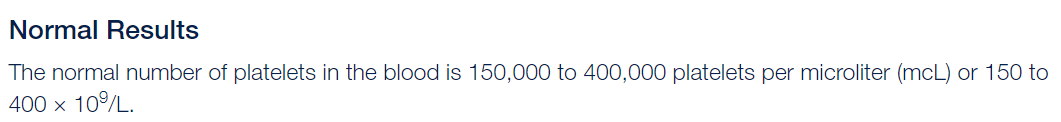

In [31]:
def interpret_Platelet(Platelet_value):
    if Platelet_value < 150:
        return 'Low'
    elif 150 <= Platelet_value <= 400:
        return 'Normal'
    else:
        return 'High'

df_selected['Platelet'] = df_selected['L15-Platelet'].apply(interpret_Platelet)

###Blood-sugar

https://www.mountsinai.org/health-library/tests/blood-sugar-test-blood

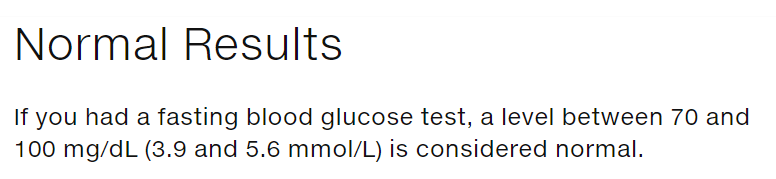

In [32]:
def interpret_BloodSugar(BloodSugar_value):
    if BloodSugar_value < 70:
        return 'Low'
    elif 70 <= BloodSugar_value <= 100:
        return 'Normal'
    else:
        return 'High'

df_selected['Blood-sugar'] = df_selected['L19-Blood-sugar'].apply(interpret_BloodSugar)

###HbA1c

https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/#:~:text=To%20diagnose%20diabetes%20or%20prediabetes,A1C%20of%206.5%25%20or%20higher

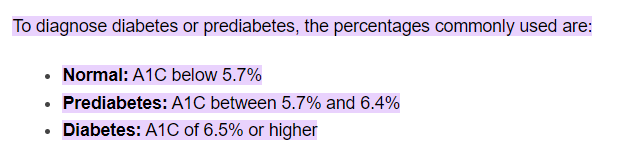

In [33]:
def interpret_HbA1c(HbA1c_value):
    if HbA1c_value < 5.7:
        return 'Normal'
    elif 5.7 <= HbA1c_value <= 6.4:
        return 'Prediabetesl'
    else:
        return 'Diabetes'

df_selected['HbA1c'] = df_selected['L20-HbA1c'].apply(interpret_HbA1c)

###Cholesterol

https://medlineplus.gov/lab-tests/cholesterol-levels/

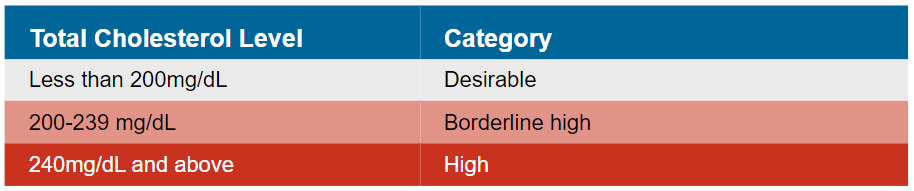

In [34]:
def interpret_Cholesterol(Cholesterol_value):
    if Cholesterol_value < 200:
        return 'Desirable'
    elif 200 <= Cholesterol_value <= 239:
        return 'Borderline high'
    else:
        return 'High'

df_selected['Cholesterol'] = df_selected['L21-Cholesterol'].apply(interpret_Cholesterol)

###Triglyceride

https://medlineplus.gov/lab-tests/triglycerides-test/

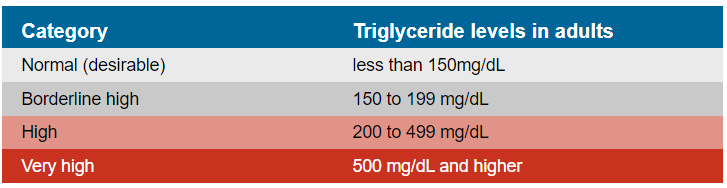

In [35]:
def interpret_Triglyceride(Triglyceride_value):
    if Triglyceride_value < 150:
        return 'Normal'
    elif 150 <= Triglyceride_value <= 199:
        return 'Borderline high'
    elif 200 <= Triglyceride_value <= 499:
        return 'High'
    else:
        return 'Very high'

df_selected['Triglyceride'] = df_selected['L22-Triglyceride'].apply(interpret_Triglyceride)

###LDL-Cholesterol

https://medlineplus.gov/lab-tests/cholesterol-levels/

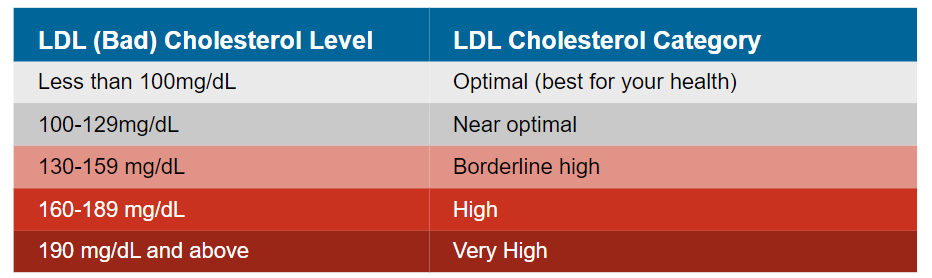

In [36]:
def interpret_LDL(LDL_value):
    if LDL_value < 100:
        return 'Optimal'
    elif 100 <= LDL_value <= 129:
        return 'Near Optimal'
    elif 130 <= LDL_value <= 159:
        return 'Borderline High'
    elif 160 <= LDL_value <= 189:
        return 'High'
    else:
        return 'Very High'

df_selected['LDL-Cholesterol'] = df_selected['L23-LDL-Cholesterol'].apply(interpret_LDL)

###HDL-Cholesterol


https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

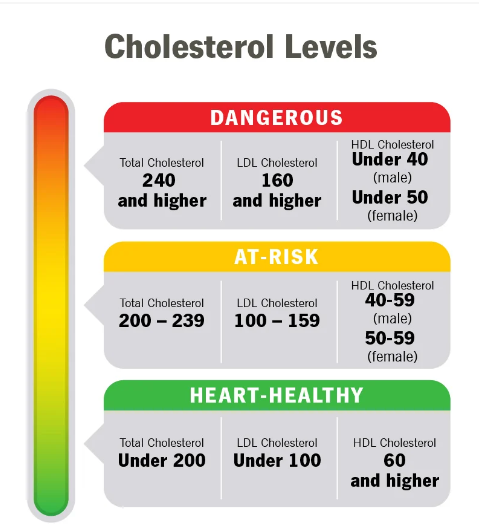

In [37]:
def interpret_HDL_by_sex(HDL_value, sex):
    if sex == 0:  # Male
        if HDL_value < 40:
            return 'Dangerous'
        elif 40 <= HDL_value <= 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'
    elif sex == 1:  # Female
        if HDL_value <50:
            return 'Dangerous'
        elif 50<= HDL_value < 59:
            return 'AT-Risk'
        else:
            return 'Heart-Healthy'

df_selected['HDL-Cholesterol'] = df_selected.apply(lambda row: interpret_HDL_by_sex(row['L24-HDL-Cholesterol'], row['Sex']), axis=1)


###UrineProtein-Cr-ratio

https://www.healthline.com/health/kidney-disease/urine-protein-creatinine-ratio#levels

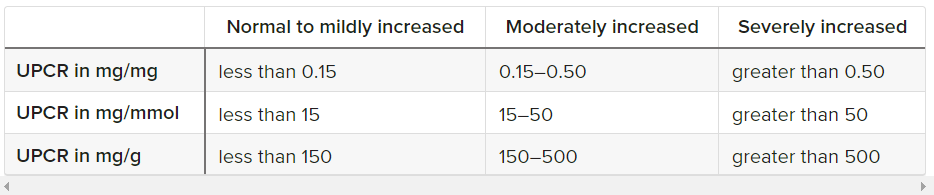

In [38]:
def interpret_UPCR(UPCR_value):
    if UPCR_value < 0.15:
        return 'Normal'
    elif 0.15 <= UPCR_value <= 0.5:
        return 'Moderately'
    else:
        return 'Severely'

df_selected['UPCR'] = df_selected['L28-UrineProtein-Cr-ratio'].apply(interpret_UPCR)

### drug groups

In [39]:
drug = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent']
drug = df[drug]

In [40]:
drug.head()

G1M2-ARB  G3M1-Statin  G5M2-NSAIDs  G1M5-Diuretic  G1M7-Beta-blocker  \
0        90            0            0              0                  0   
1        90           90            0              0                  0   
2       100          100           34              0                  0   
3        35            0            1             35                  0   
4       100            0           15              0                  0   

   G1M3-Dihydropyridine-CCB  G1M6-MRA  G1M1-ACEI  G2M2-Metformin  \
0                         0         0          0               0   
1                         0         0          0               0   
2                         0         0          0               0   
3                         0         0          0               0   
4                         0         0          0               0   

   G2M3-DPP4-inhibitor  ...  G1M9-Vasodilator  G1M8-Alpha-blocker  \
0                    0  ...                 0                   0   
1                    0  ...                 0                   0   
2                    0  ...                 0                   0   
3                    0  ...                 0                   0   
4                    0  ...                 0                   0   

   G2M6-Insulin  G2M4-TZD  G4M2-Febuxostat  G3M2-Ezetimibe  \
0             0         0                0               0   
1             0         0                0               0   
2             0         0                0               0   
3             0         0                0               0   
4             0         0                0               0   

   G1M4-Non-dihydropyridine-CCB  G5M1-Ketoanalog-amino-acid  G2M7-GLP1-RA  \
0                             0                           0             0   
1                             0                           0             0   
2                             0                           0             0   
3                             0                           0             0   
4                             0                           0             0   

   G4M3-Uricosuric-agent  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 24 columns]

In [41]:
drug.shape

(52620, 24)

In [42]:
drug.describe()

G1M2-ARB   G3M1-Statin   G5M2-NSAIDs  G1M5-Diuretic  \
count  52620.000000  52620.000000  52620.000000   52620.000000   
mean       8.887628     30.067104      1.047681       2.593330   
std       27.112374     43.033413      8.089661      14.695136   
min        0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000       0.000000   
75%        0.000000     70.000000      0.000000       0.000000   
max      365.000000    400.000000    200.000000     252.000000   

       G1M7-Beta-blocker  G1M3-Dihydropyridine-CCB      G1M6-MRA  \
count       52620.000000              52620.000000  52620.000000   
mean            8.862657                  9.167389      0.683390   
std            26.546391                 27.310031      7.339541   
min             0.000000                  0.000000      0.000000   
25%             0.000000                  0.000000      0.000000   
50%             0.000000                  0.000000      0.000000   
75%             0.000000                  0.000000      0.000000   
max           285.000000                210.000000    195.000000   

          G1M1-ACEI  G2M2-Metformin  G2M3-DPP4-inhibitor  ...  \
count  52620.000000    52620.000000         52620.000000  ...   
mean       6.630274       13.154257             4.558723  ...   
std       23.274212       32.222202            20.356311  ...   
min        0.000000        0.000000             0.000000  ...   
25%        0.000000        0.000000             0.000000  ...   
50%        0.000000        0.000000             0.000000  ...   
75%        0.000000        0.000000             0.000000  ...   
max      240.000000      315.000000           271.000000  ...   

       G1M9-Vasodilator  G1M8-Alpha-blocker  G2M6-Insulin      G2M4-TZD  \
count      52620.000000        52620.000000  52620.000000  52620.000000   
mean           3.167256            4.171532      0.394755      2.850171   
std           16.323534           18.723921      5.260395     16.281224   
min            0.000000            0.000000      0.000000      0.000000   
25%            0.000000            0.000000      0.000000      0.000000   
50%            0.000000            0.000000      0.000000      0.000000   
75%            0.000000            0.000000      0.000000      0.000000   
max          210.000000          210.000000    210.000000    240.000000   

       G4M2-Febuxostat  G3M2-Ezetimibe  G1M4-Non-dihydropyridine-CCB  \
count     52620.000000    52620.000000                  52620.000000   
mean          0.258989        1.769707                      1.772995   
std           4.904211       12.888611                     12.106452   
min           0.000000        0.000000                      0.000000   
25%           0.000000        0.000000                      0.000000   
50%           0.000000        0.000000                      0.000000   
75%           0.000000        0.000000                      0.000000   
max         119.000000      200.000000                    210.000000   

       G5M1-Ketoanalog-amino-acid  G2M7-GLP1-RA  G4M3-Uricosuric-agent  
count                52620.000000       52620.0           52620.000000  
mean                     0.333694           0.0               0.109787  
std                      5.319310           0.0               3.215718  
min                      0.000000           0.0               0.000000  
25%                      0.000000           0.0               0.000000  
50%                      0.000000           0.0               0.000000  
75%                      0.000000           0.0               0.000000  
max                    105.000000           0.0             180.000000  

[8 rows x 24 columns]

In [ ]:
#import pandas as pd

# คอลัมน์ของยาทั้งหมด
#drug_columns = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
#       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
 #       'G2M3-DPP4-inhibitor', 'G3M3-Fibrate', 'G2M5-SGLT2i',
  #      'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
 #       'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
  #      'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
 #       'G4M3-Uricosuric-agent']

# สร้างฟังก์ชันเพื่อตรวจสอบการรับประทานยาของแต่ละคอลัมน์
#def check_medication(cell_value):
#    try:
        # แปลงค่าเป็นตัวเลข
#        cell_value = int(cell_value)
 #       return 'Yes' if cell_value > 0 else 'No'
#    except ValueError:
        # กรณีไม่สามารถแปลงได้
#        return 'No'

# สร้างคอลัมน์ใหม่สำหรับการเก็บค่าที่แปลงแล้วของแต่ละยา
#for column in drug_columns:
  #  df_selected[f'{column}_taken'] = df_selected[column].apply(check_medication)


In [43]:
import pandas as pd

# คอลัมน์ของยาทั้งหมด
drug_columns  = ['G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent']

# สร้างคอลัมน์ใหม่สำหรับแต่ละยาที่ระบุว่าคนไข้กินหรือไม่กิน
for col in drug_columns:
    df_selected[col + '_taken'] = (df_selected[col] > 0).astype(int)

In [44]:
df_selected[['G1M2-ARB','G1M2-ARB_taken','G3M1-Statin', 'G3M1-Statin_taken',
       'G5M2-NSAIDs','G5M2-NSAIDs_taken']].head()

G1M2-ARB  G1M2-ARB_taken  G3M1-Statin  G3M1-Statin_taken  G5M2-NSAIDs  \
0        90               1            0                  0            0   
1        90               1           90                  1            0   
2       100               1          100                  1           34   
3        35               1            0                  0            1   
4       100               1            0                  0           15   

   G5M2-NSAIDs_taken  
0                  0  
1                  0  
2                  1  
3                  1  
4                  1

### diag groups

In [45]:
diag = ['D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy']
diag = df[diag]

In [46]:
diag.describe()

D1-Hypertension  D2-Diabetes-mellitus  D3-Dyslipidemia        D4-SLE  \
count     52620.000000          52620.000000     52620.000000  52620.000000   
mean          0.273831              0.226606         0.196769      0.009502   
std           0.528612              0.471462         0.402926      0.099529   
min           0.000000              0.000000         0.000000      0.000000   
25%           0.000000              0.000000         0.000000      0.000000   
50%           0.000000              0.000000         0.000000      0.000000   
75%           0.000000              0.000000         0.000000      0.000000   
max           4.000000              6.000000         7.000000      3.000000   

       D5-Systemic-sclerosis  D6-Rheumatoid-arthritis  D7-HIV-infection  \
count           52620.000000             52620.000000      52620.000000   
mean                0.004371                 0.016838          0.002471   
std                 0.066257                 0.131874          0.049644   
min                 0.000000                 0.000000          0.000000   
25%                 0.000000                 0.000000          0.000000   
50%                 0.000000                 0.000000          0.000000   
75%                 0.000000                 0.000000          0.000000   
max                 2.000000                 5.000000          1.000000   

       D8-HBV-infection  D9-HCV-infection  D10-Ischemic-heart-disease  \
count      52620.000000      52620.000000                52620.000000   
mean           0.007982          0.009977                    0.014994   
std            0.089410          0.099387                    0.122621   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            2.000000          1.000000                    2.000000   

       D11-Heart-failure  D12-Thalassemia  D13-Kidney-stone  \
count       52620.000000     52620.000000      52620.000000   
mean            0.005530         0.001558          0.020334   
std             0.075431         0.039445          0.144075   
min             0.000000         0.000000          0.000000   
25%             0.000000         0.000000          0.000000   
50%             0.000000         0.000000          0.000000   
75%             0.000000         0.000000          0.000000   
max             2.000000         1.000000          3.000000   

       D14-Valvular-heart-disease  D15-Solid-malignancy  \
count                52620.000000          52620.000000   
mean                     0.008837              0.043843   
std                      0.094197              0.209699   
min                      0.000000              0.000000   
25%                      0.000000              0.000000   
50%                      0.000000              0.000000   
75%                      0.000000              0.000000   
max                      2.000000              2.000000   

       D16-Hematologic-malignancy  
count                52620.000000  
mean                     0.013208  
std                      0.114664  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      2.000000

In [47]:
pd.DataFrame({
    'feature': diag.columns.values,
    'n_unique': diag.nunique().values, # ค่าไม่ซ้ำ
    'sample_unique': [diag[col].unique() for col in diag.columns]}
).round(3).reset_index(drop=True)

feature  n_unique       sample_unique
0              D1-Hypertension         5     [0, 1, 2, 3, 4]
1         D2-Diabetes-mellitus         6  [2, 1, 0, 3, 4, 6]
2              D3-Dyslipidemia         5     [0, 1, 2, 3, 7]
3                       D4-SLE         4        [0, 1, 2, 3]
4        D5-Systemic-sclerosis         3           [0, 1, 2]
5      D6-Rheumatoid-arthritis         5     [0, 1, 2, 5, 3]
6             D7-HIV-infection         2              [0, 1]
7             D8-HBV-infection         3           [0, 1, 2]
8             D9-HCV-infection         2              [0, 1]
9   D10-Ischemic-heart-disease         3           [0, 1, 2]
10           D11-Heart-failure         3           [0, 1, 2]
11             D12-Thalassemia         2              [0, 1]
12            D13-Kidney-stone         4        [0, 1, 2, 3]
13  D14-Valvular-heart-disease         3           [0, 1, 2]
14        D15-Solid-malignancy         3           [0, 2, 1]
15  D16-Hematologic-malignancy         3           [0, 1, 2]

In [ ]:
# คอลัมน์ของการตรวจสุขภาพทั้งหมด
#diag_columns =  ['D1-Hypertension',
 #      'D2-Diabetes-mellitus', 'D4-SLE',
 #      'D6-Rheumatoid-arthritis',  'D9-HCV-infection',
 #      'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
  #     'D14-Valvular-heart-disease', 'D15-Solid-malignancy']

# สร้างฟังก์ชันเพื่อตรวจสอบการรับประทานยาของแต่ละคอลัมน์
#def check_diagnose(cell_value):
 #   try:
        # แปลงค่าเป็นตัวเลข
   #     cell_value = int(cell_value)
   #     return 'Yes' if cell_value > 0 else 'No'
  #  except ValueError:
        # กรณีไม่สามารถแปลงได้
  #      return 'No'

# สร้างคอลัมน์ใหม่สำหรับการเก็บค่าที่แปลงแล้วของแต่ละยา
#for column in diag_columns:
 #   df_selected[f'{column}_check'] = df_selected[column].apply(check_diagnose)

In [48]:
# คอลัมน์ของการตรวจสุขภาพทั้งหมด
diag_columns = ['D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy']

# สร้างคอลัมน์ใหม่สำหรับแต่ละการตรวจที่ระบุว่าผู้ป่วยมีการตรวจหรือไม่มีการตรวจ
for col in diag_columns:
    df_selected[col + '_check'] = (df_selected[col] > 0).astype(int)

In [ ]:
df_selected[['D1-Hypertension','D1-Hypertension_check', 'D2-Diabetes-mellitus','D2-Diabetes-mellitus_check']].head()

D1-Hypertension  D1-Hypertension_check  D2-Diabetes-mellitus  \
0                0                      0                     2   
1                0                      0                     2   
2                0                      0                     1   
3                0                      0                     1   
4                1                      1                     1   

   D2-Diabetes-mellitus_check  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1

## Association Rule

In [59]:
data =['InPatient', 'OutPatient','Emergency',
       'Sex', 'Age_range', 'NATNL', 'BMI_range', 'BSA_range', 'DBP', 'SBP','Slopes_Category',
    'G1M2-ARB_taken', 'G3M1-Statin_taken', 'G5M2-NSAIDs_taken',
       'G1M5-Diuretic_taken', 'G1M7-Beta-blocker_taken', 'G1M3-Dihydropyridine-CCB_taken',
       'G1M6-MRA_taken', 'G1M1-ACEI_taken', 'G2M2-Metformin_taken', 'G2M3-DPP4-inhibitor_taken',
       'G2M1-SU_taken', 'G3M3-Fibrate_taken', 'G2M5-SGLT2i_taken', 'G4M1-Allopurinol_taken',
       'G1M9-Vasodilator_taken', 'G1M8-Alpha-blocker_taken', 'G2M6-Insulin_taken', 'G2M4-TZD_taken',
       'G4M2-Febuxostat_taken', 'G3M2-Ezetimibe_taken', 'G1M4-Non-dihydropyridine-CCB_taken',
       'G5M1-Ketoanalog-amino-acid_taken', 'G2M7-GLP1-RA_taken', 'G4M3-Uricosuric-agent_taken',
    'D1-Hypertension_check', 'D2-Diabetes-mellitus_check', 'D3-Dyslipidemia', 'D4-SLE_check',
       'D5-Systemic-sclerosis_check', 'D6-Rheumatoid-arthritis_check', 'D7-HIV-infection_check',
       'D8-HBV-infection_check', 'D9-HCV-infection_check', 'D10-Ischemic-heart-disease_check',
       'D11-Heart-failure_check', 'D12-Thalassemia_check', 'D13-Kidney-stone_check',
       'D14-Valvular-heart-disease_check', 'D15-Solid-malignancy_check',
       'D16-Hematologic-malignancy_check',
    'eGFR_Category', 'BUN',
       'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric',
       'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin',
       'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar',
       'HbA1c', 'Cholesterol', 'Triglyceride',
       'LDL-Cholesterol', 'HDL-Cholesterol',
       'UPCR']
data  = df_selected[data]

In [51]:
data.shape

(52620, 72)

In [60]:
# เปลี่ยนชื่อคอลัมน์โดยใช้ str.replace()
data.columns = data.columns.str.replace('_taken', '').str.replace('_check', '').str.replace('_Category', '').str.replace('_range', '')

In [61]:
# สร้าง mapping ของค่าที่จะแทนที่
replacement_mapping = {
    'Sex': {0: 'Male', 1: 'Female'},
    'NATNL' : {0: 'Thai', 1: 'Asian', 2: 'Caucasian', 3: 'Other'}
}

# ทำการ replace ค่าใน DataFrame
data.replace(replacement_mapping, inplace=True)

<ipython-input-61-4f1d8159d88a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(replacement_mapping, inplace=True)


In [62]:
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values, # ประเภทข้อมูล
    'n_unique': data.nunique().values, # ค่าไม่ซ้ำ
    'sample_unique': [data[col].unique() for col in data.columns]}
).round(3).reset_index(drop=True)

feature data_type  n_unique  \
0         InPatient     int64         2   
1        OutPatient     int64         2   
2         Emergency     int64         2   
3               Sex    object         2   
4               Age  category         2   
..              ...       ...       ...   
67      Cholesterol    object         3   
68     Triglyceride    object         4   
69  LDL-Cholesterol    object         5   
70  HDL-Cholesterol    object         3   
71             UPCR    object         2   

                                        sample_unique  
0                                              [0, 1]  
1                                              [1, 0]  
2                                              [0, 1]  
3                                      [Female, Male]  
4   ['Older', 'Adult']
Categories (2, object): ['A...  
..                                                ...  
67                 [Borderline high, Desirable, High]  
68         [Normal, Borderline high, High, Very high]  
69  [Near Optimal, Borderline High, Optimal, High,...  
70                [Heart-Healthy, AT-Risk, Dangerous]  
71                                 [Severely, Normal]  

[72 rows x 4 columns]

## Histogram

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


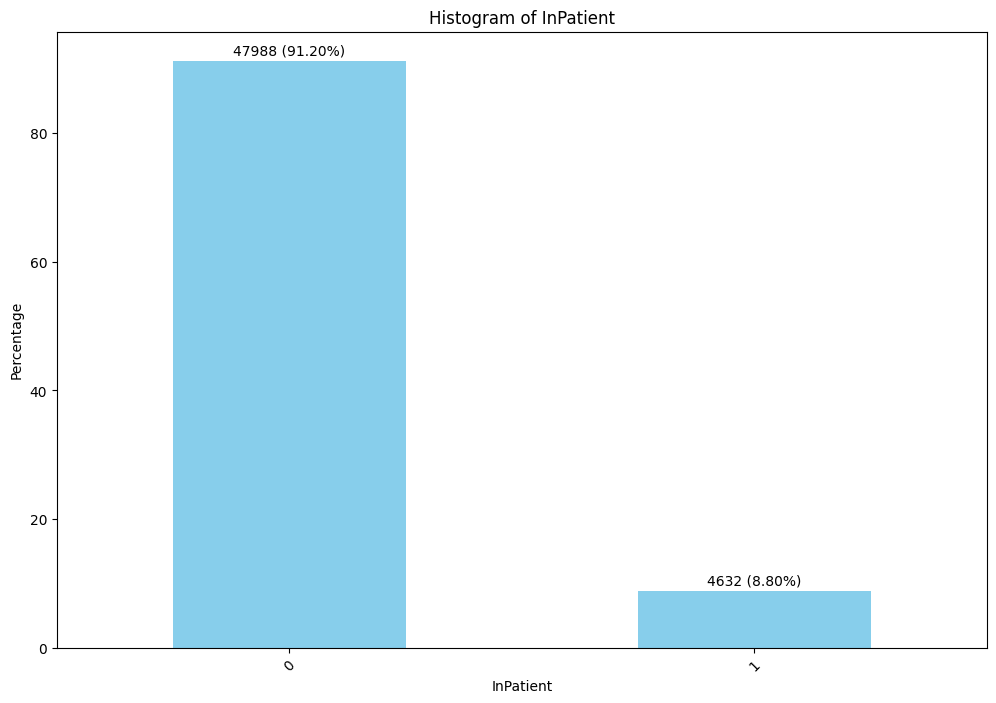

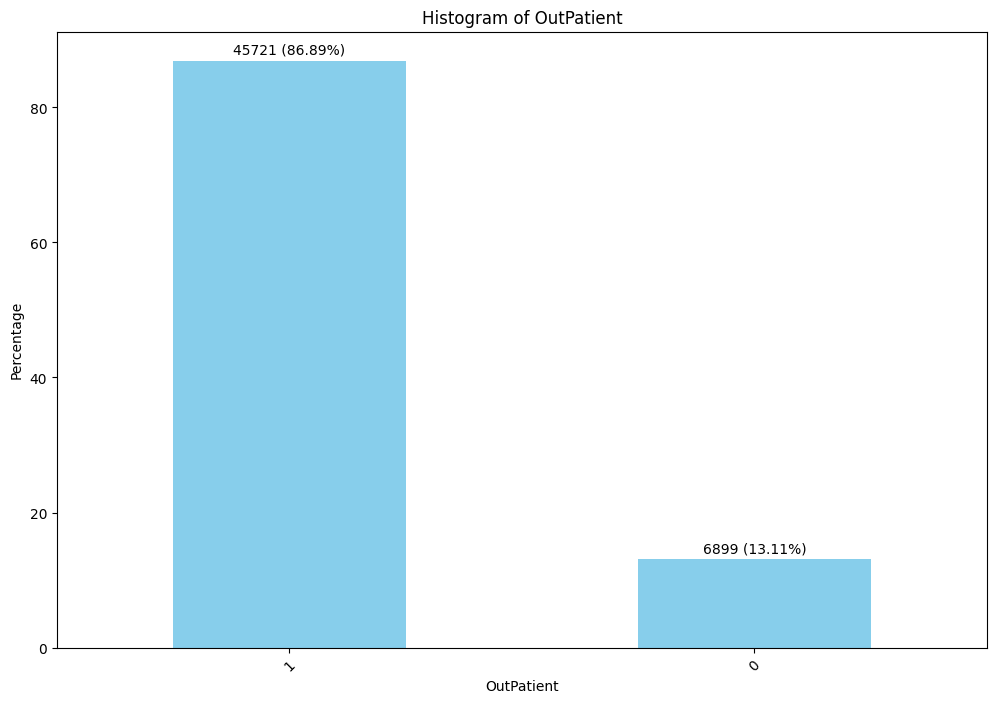

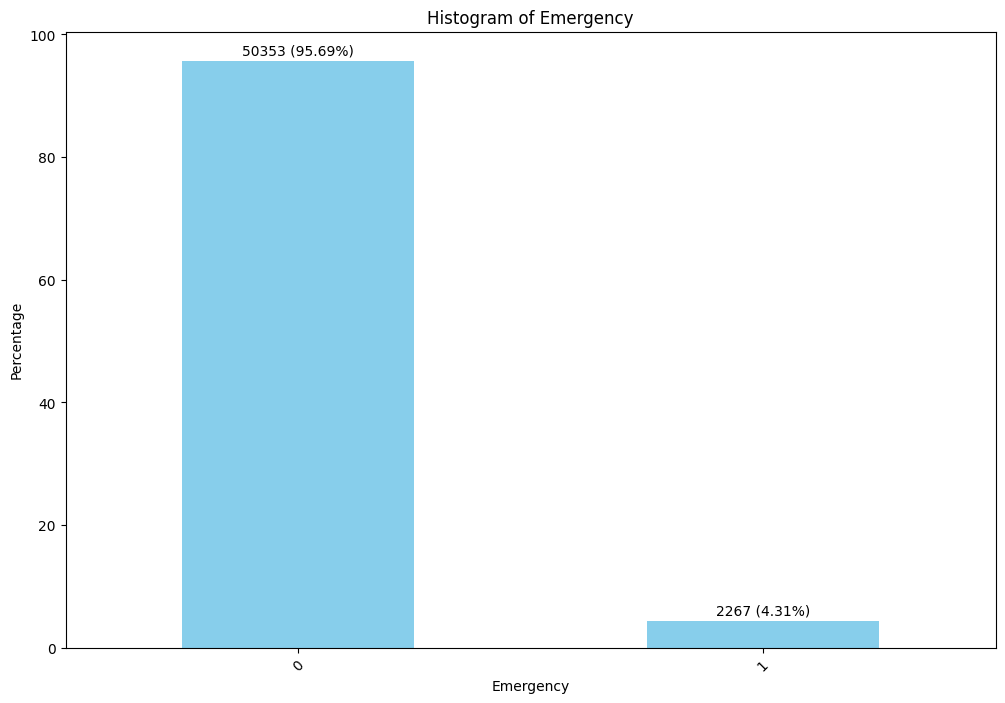

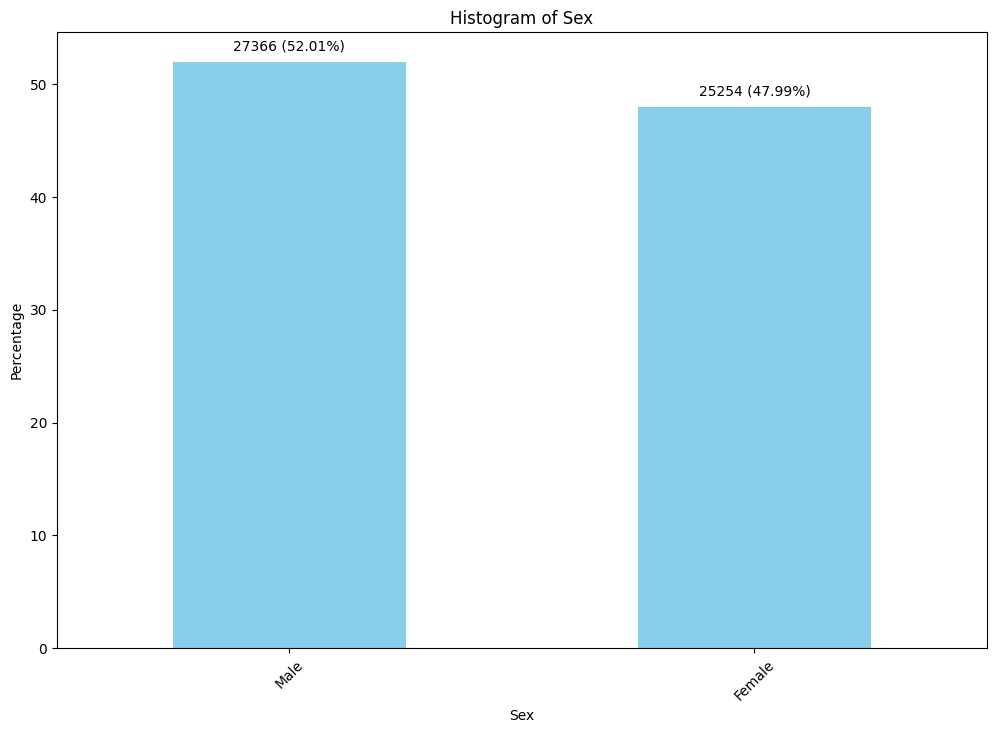

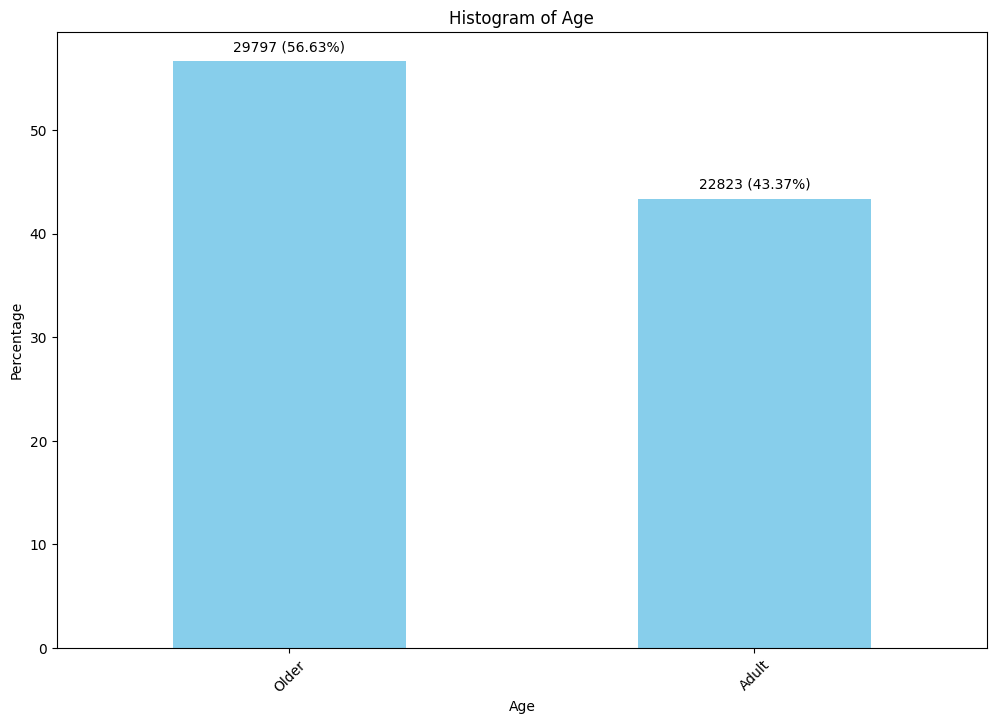

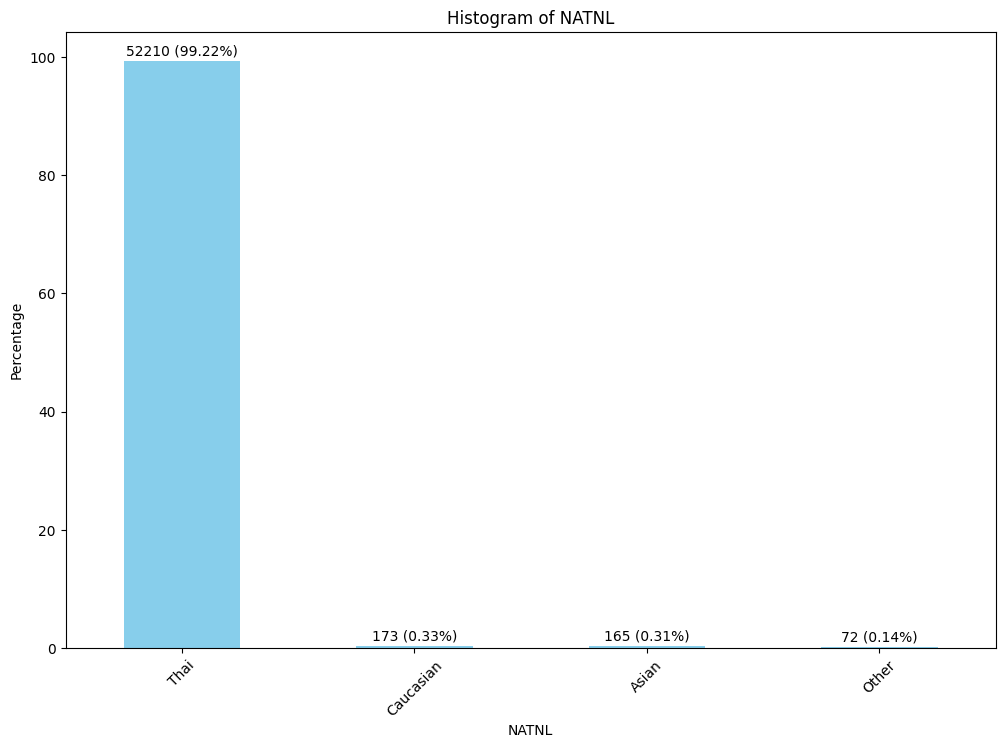

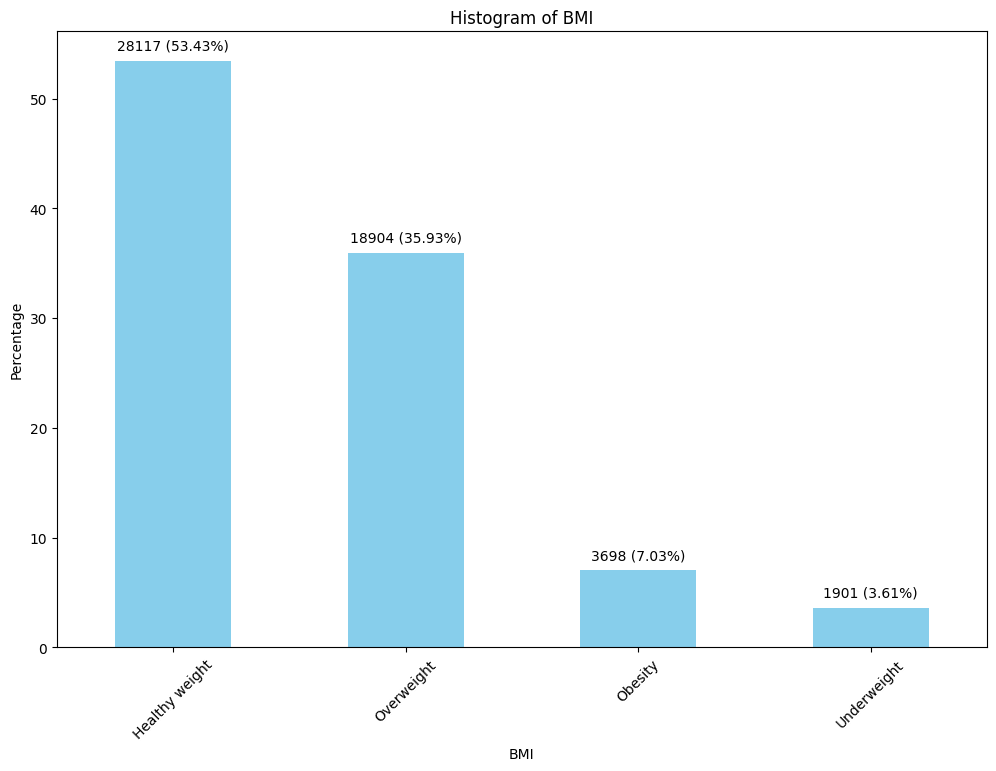

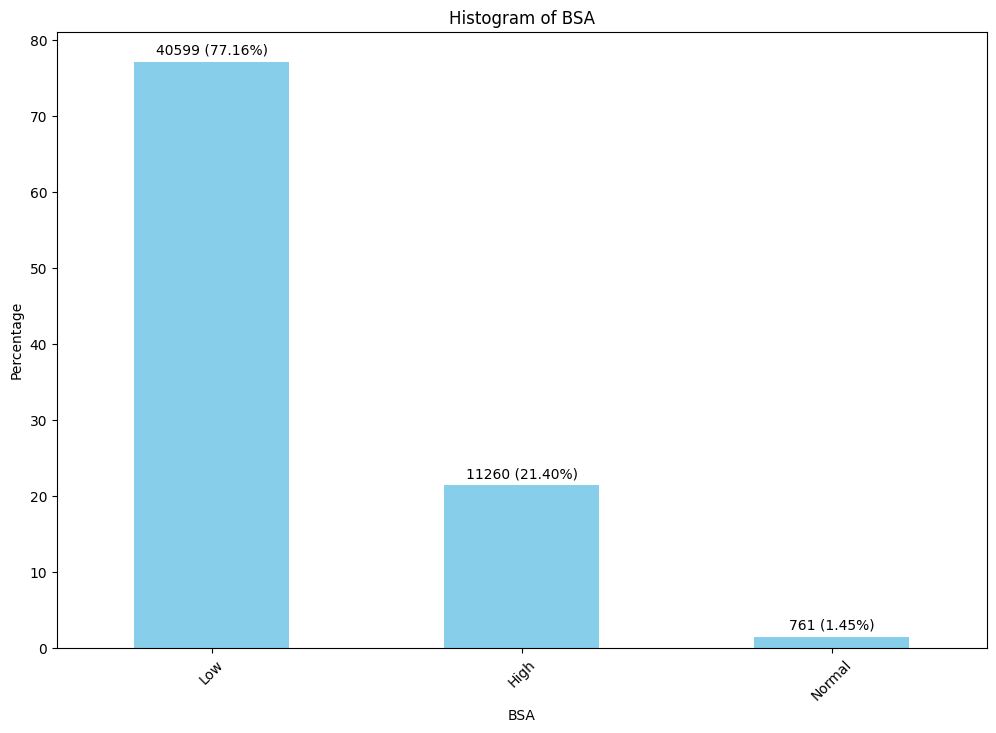

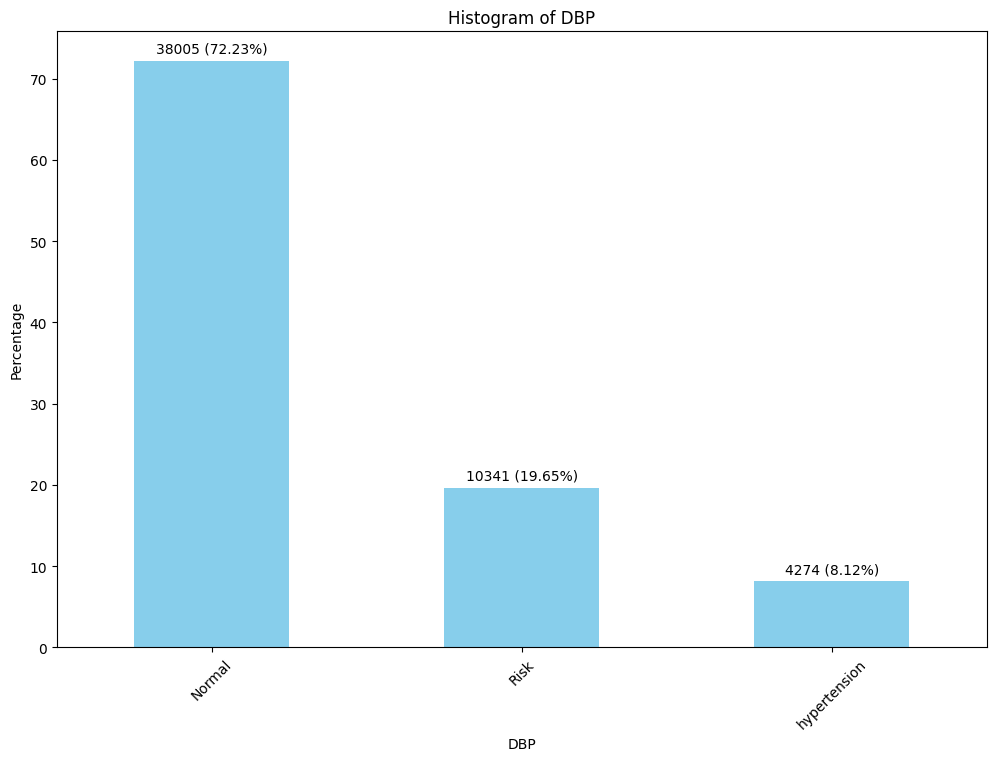

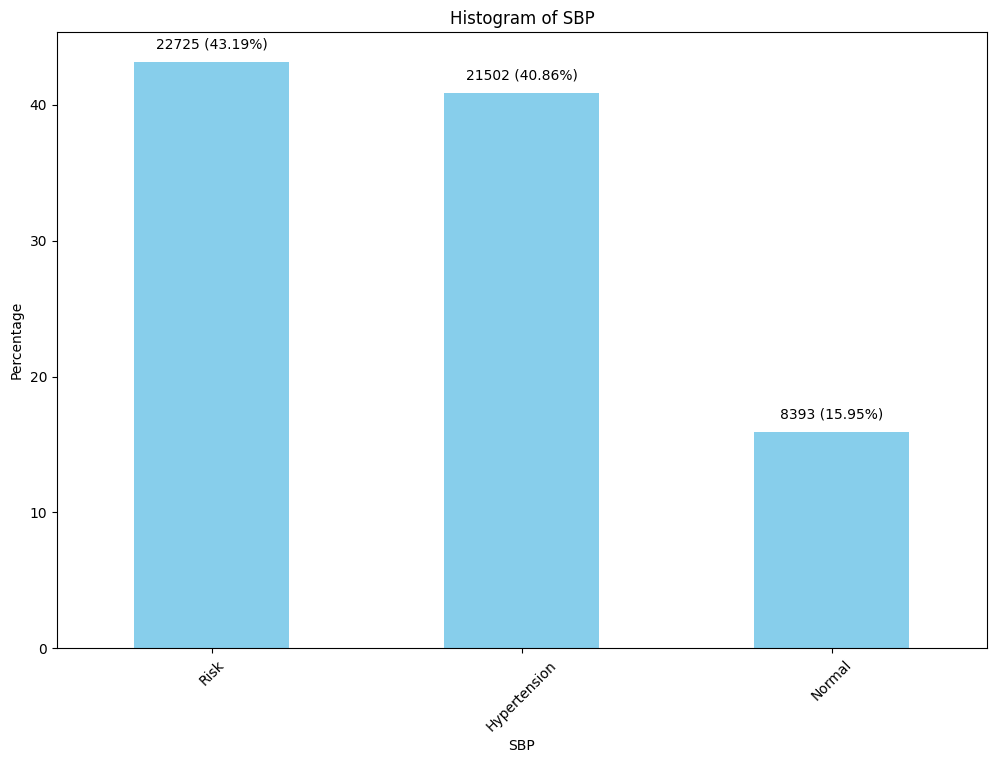

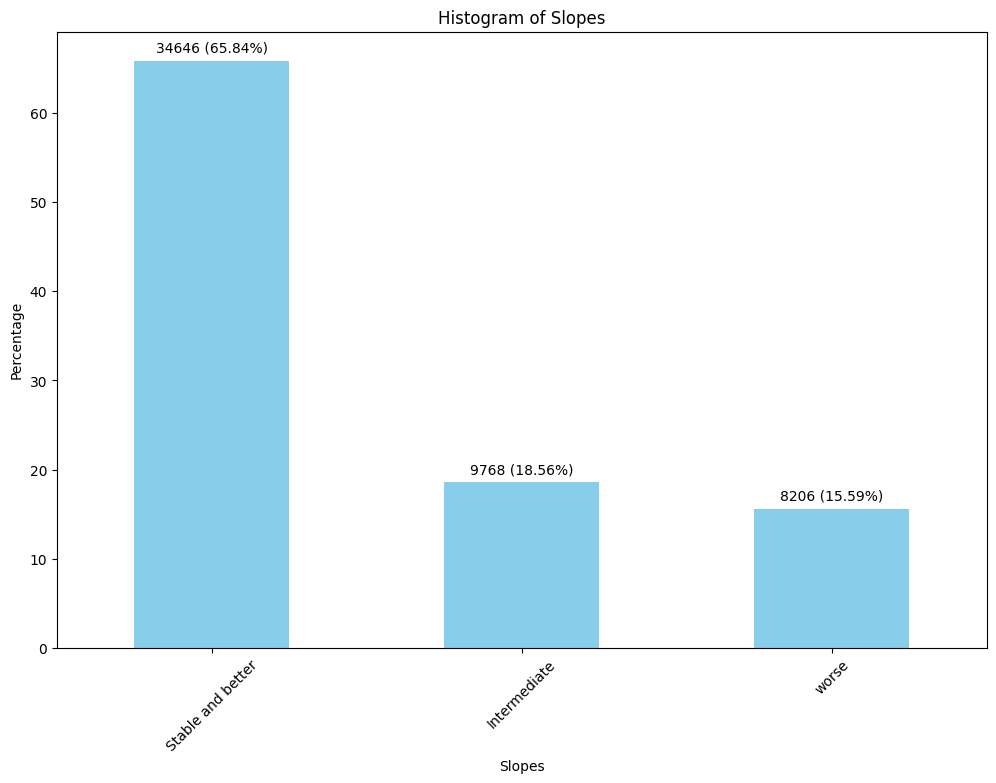

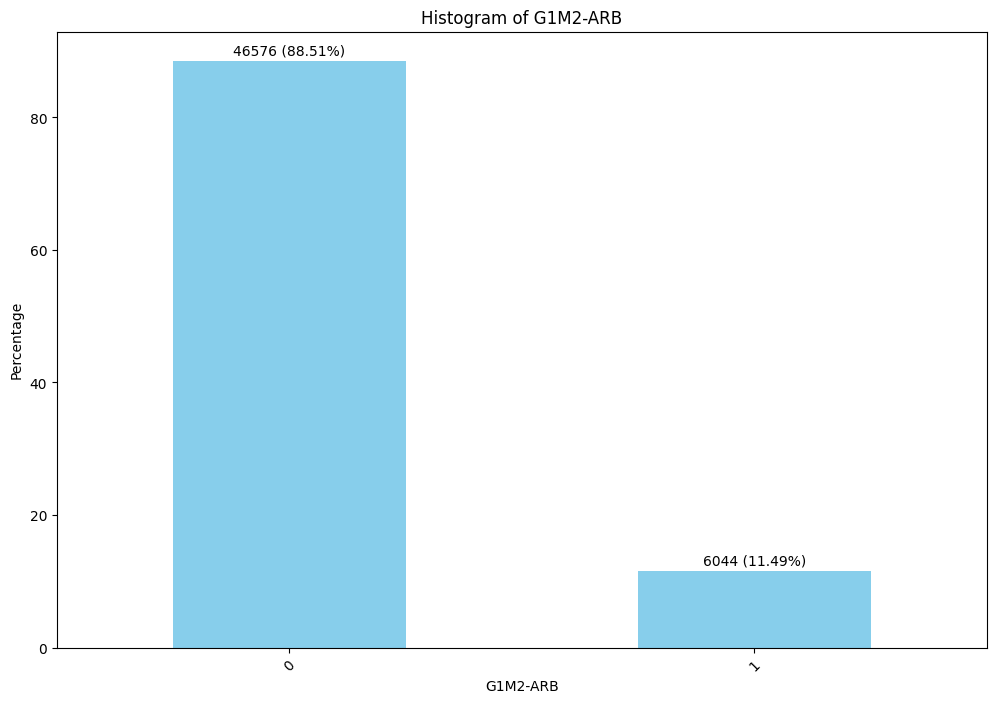

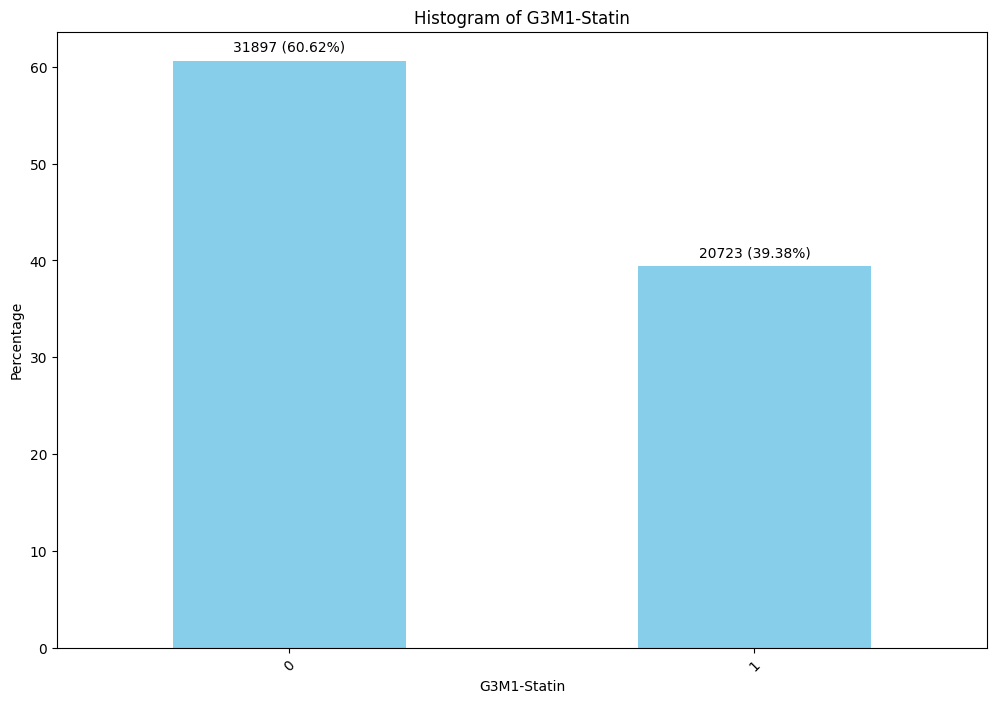

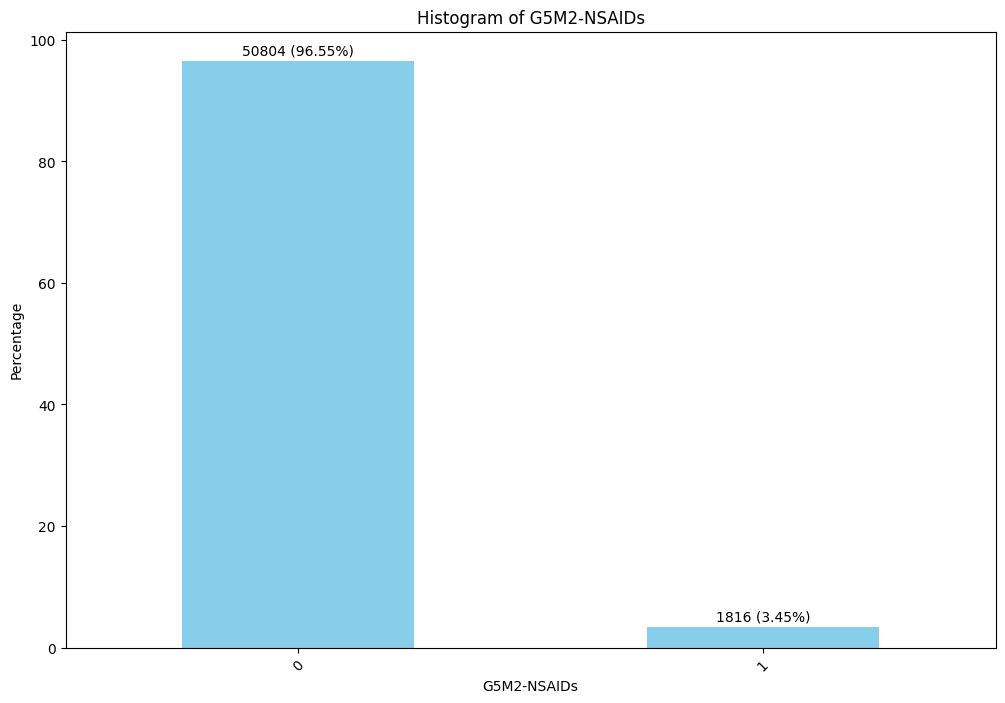

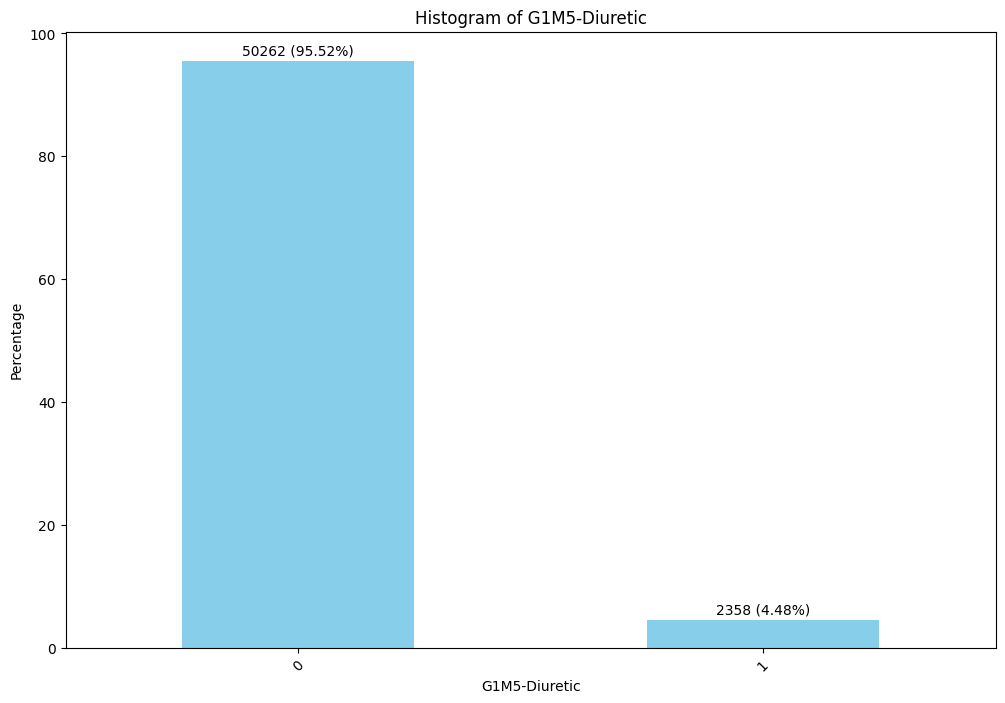

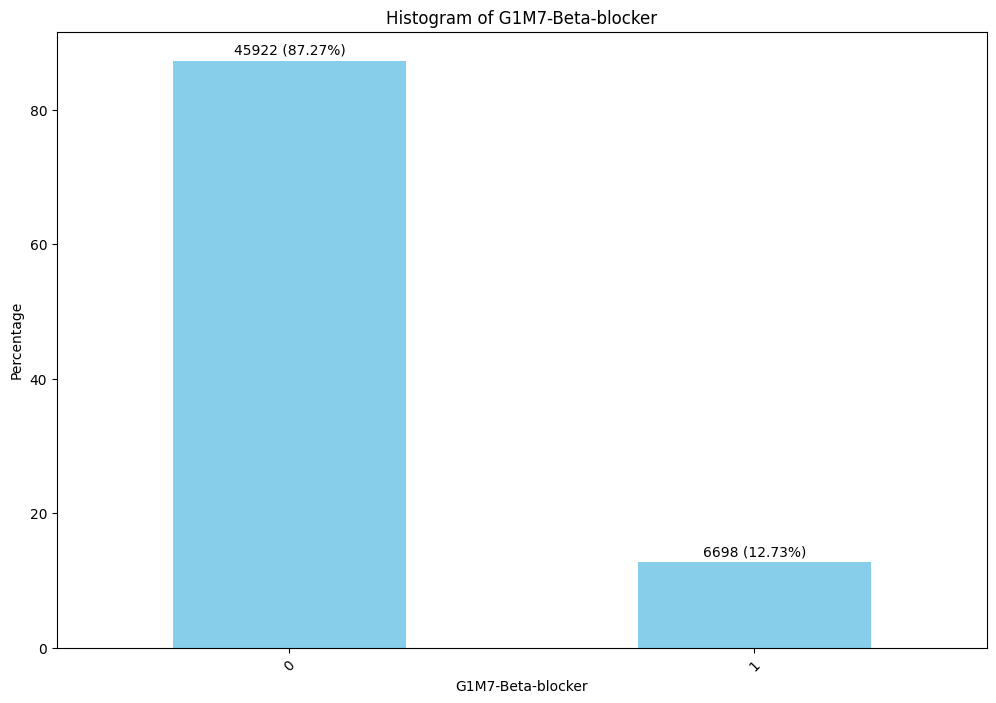

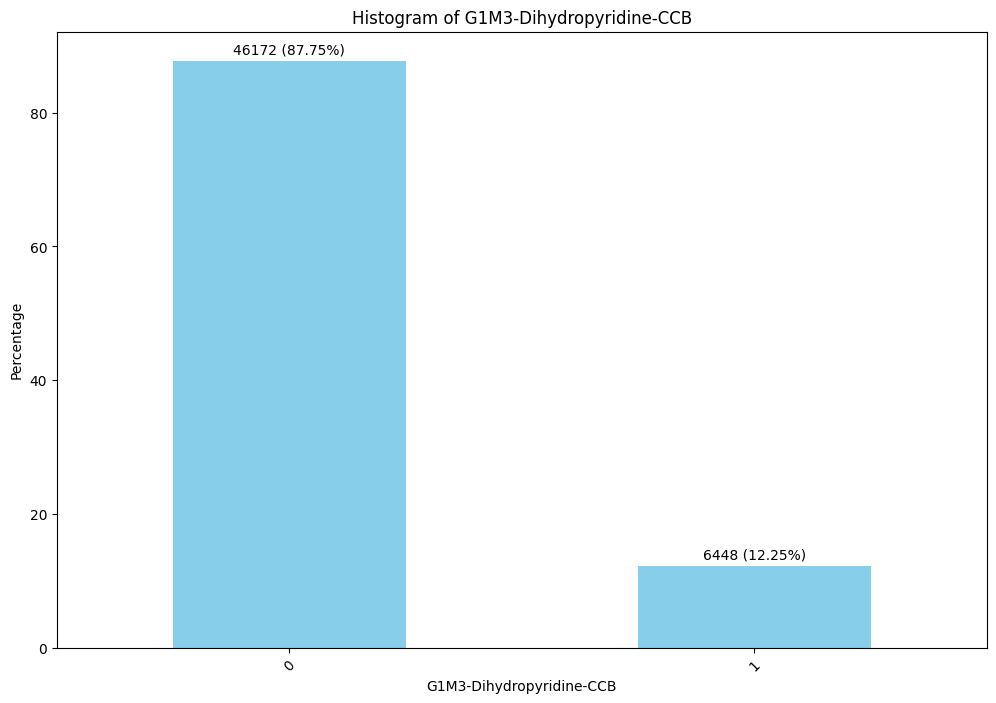

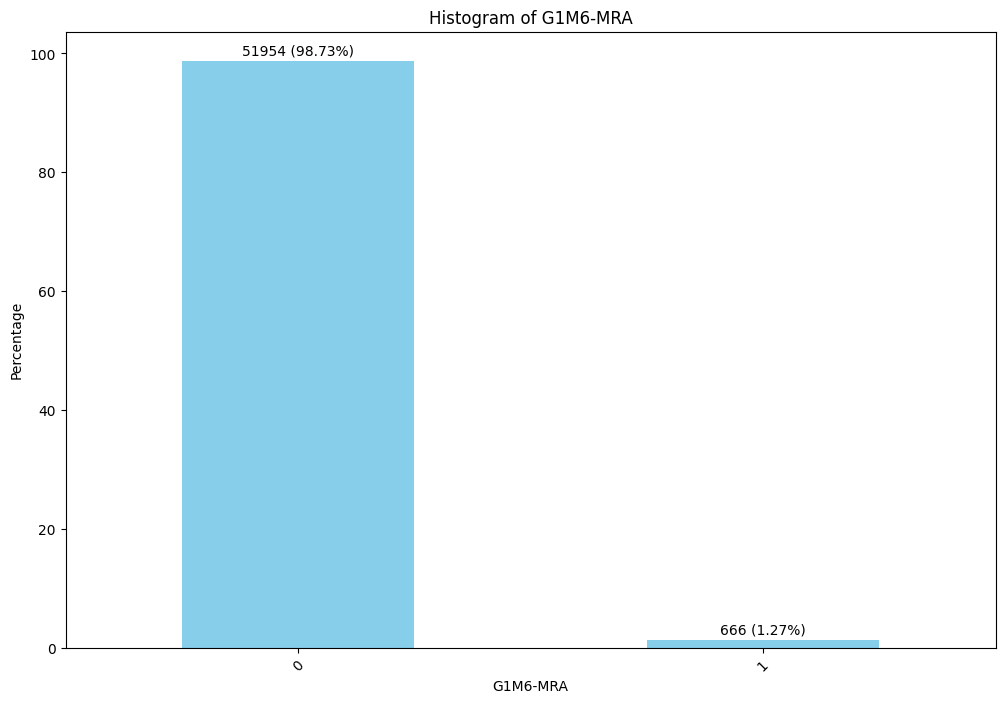

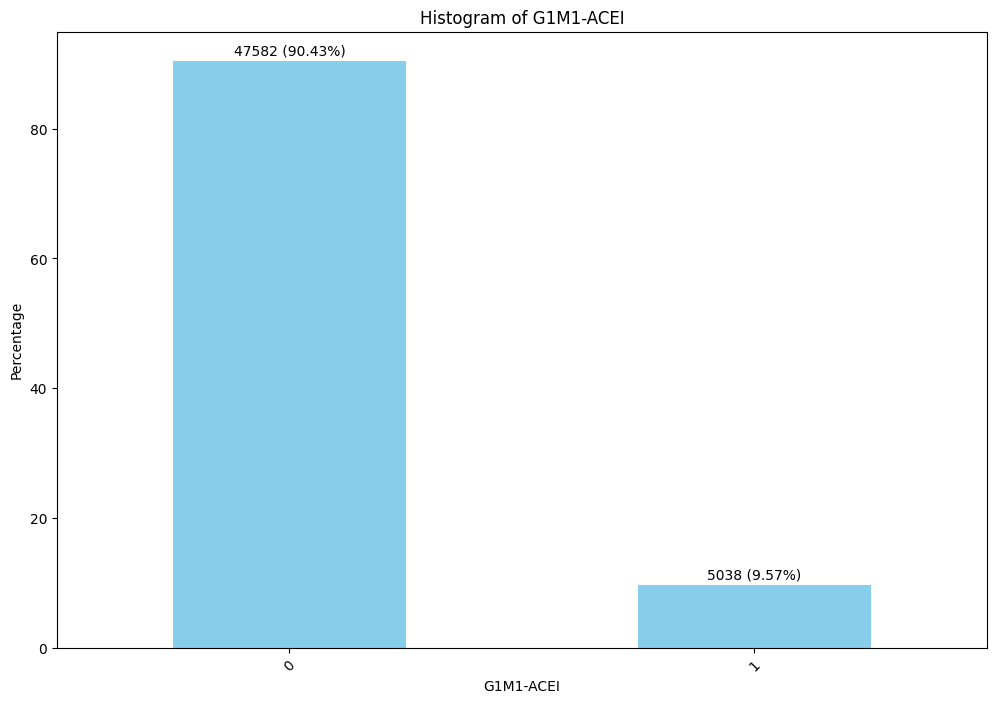

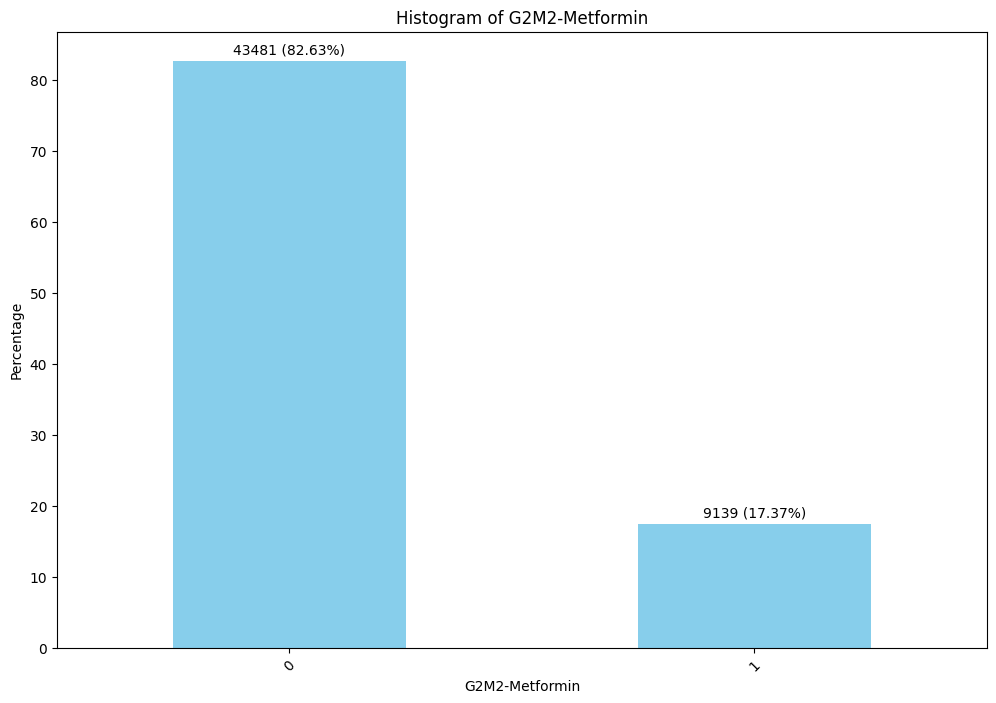

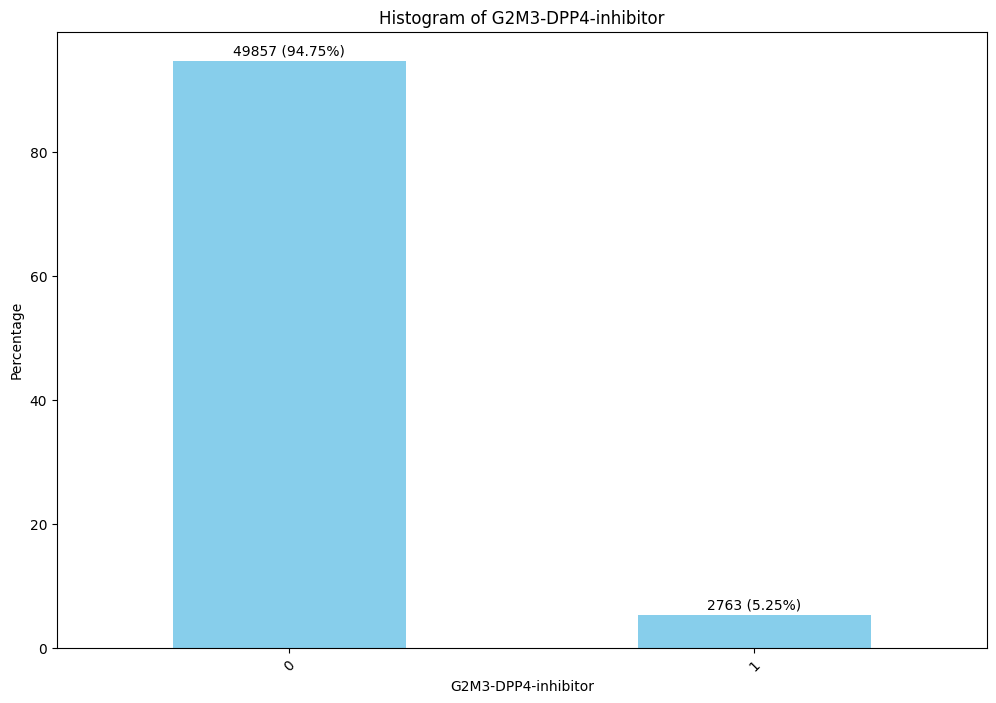

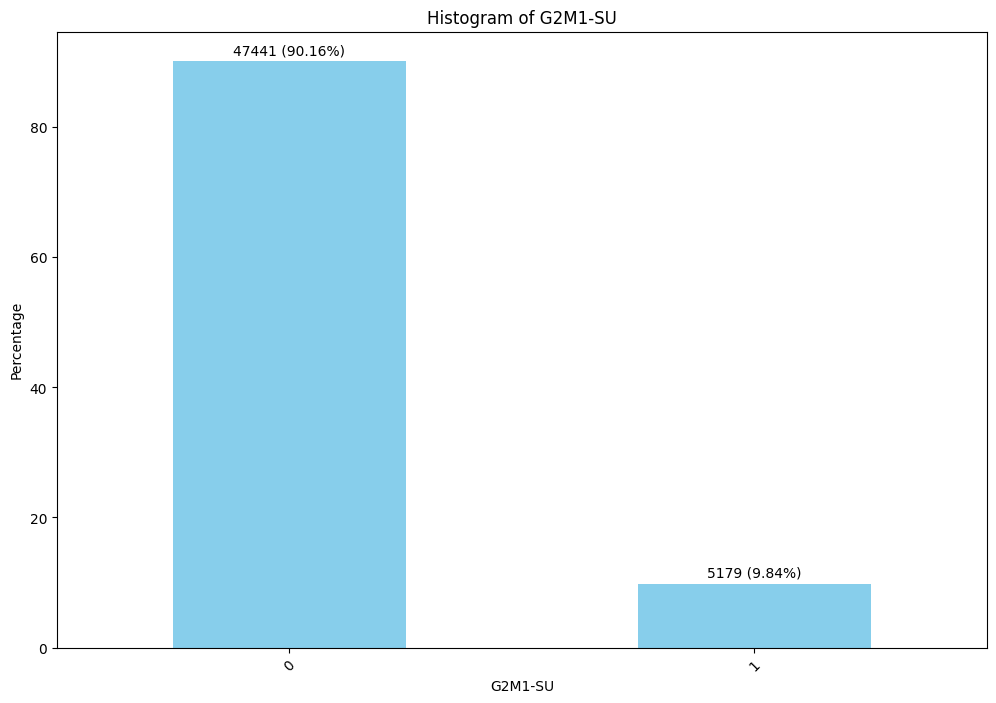

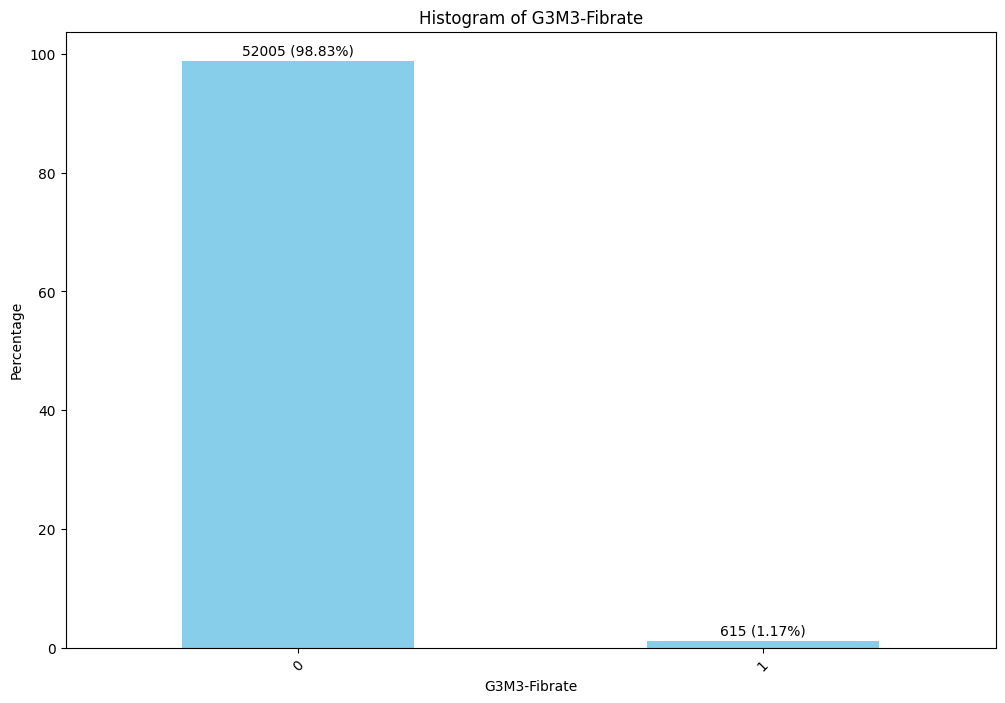

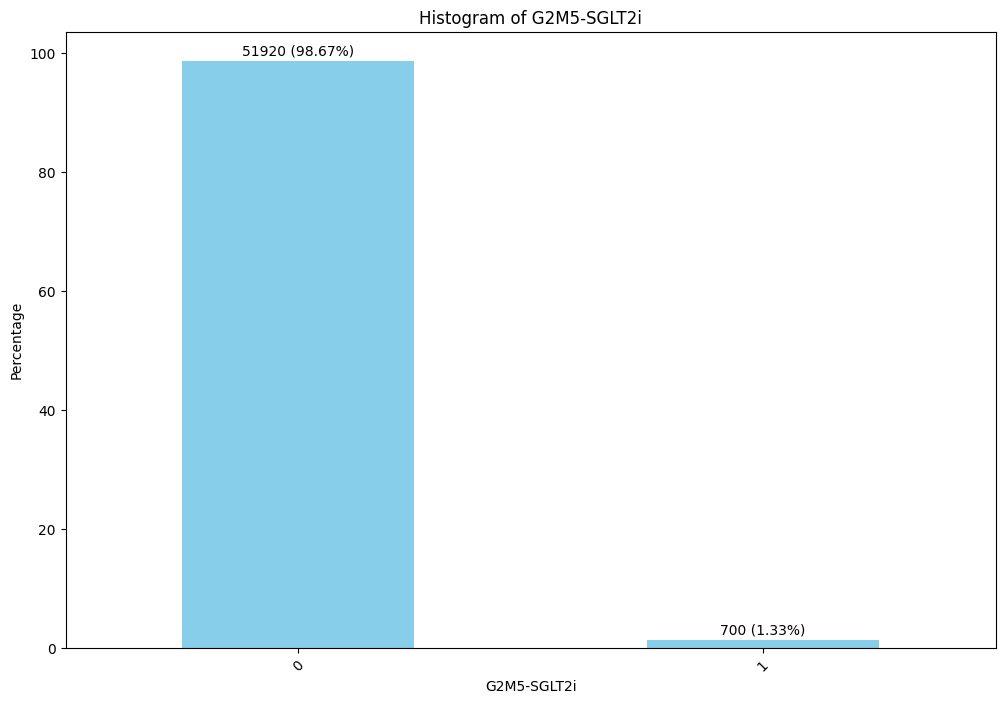

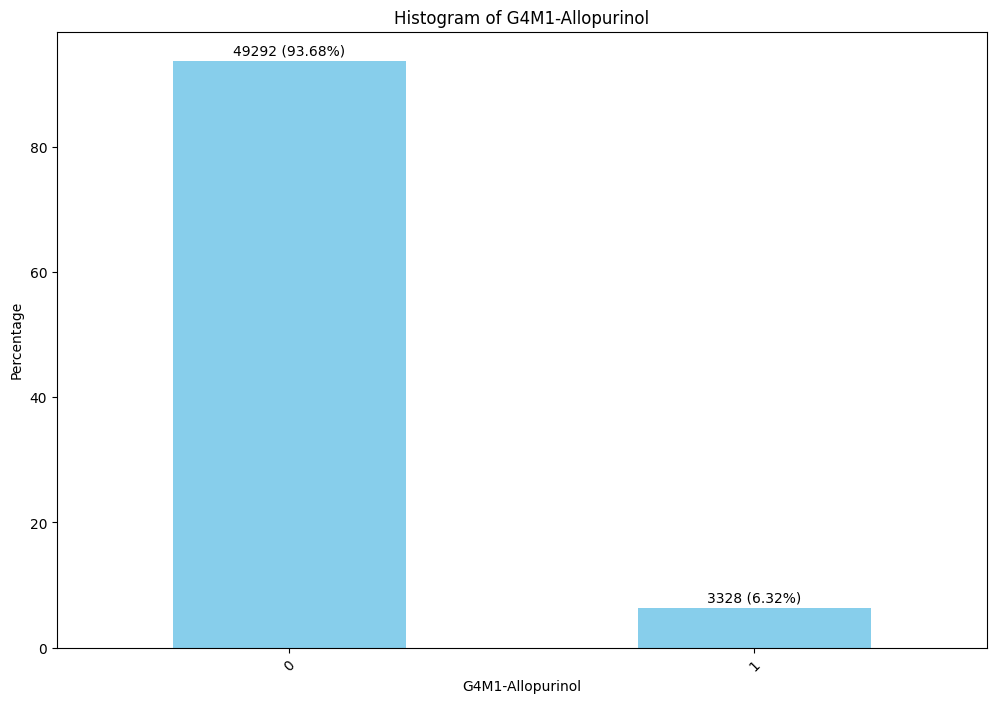

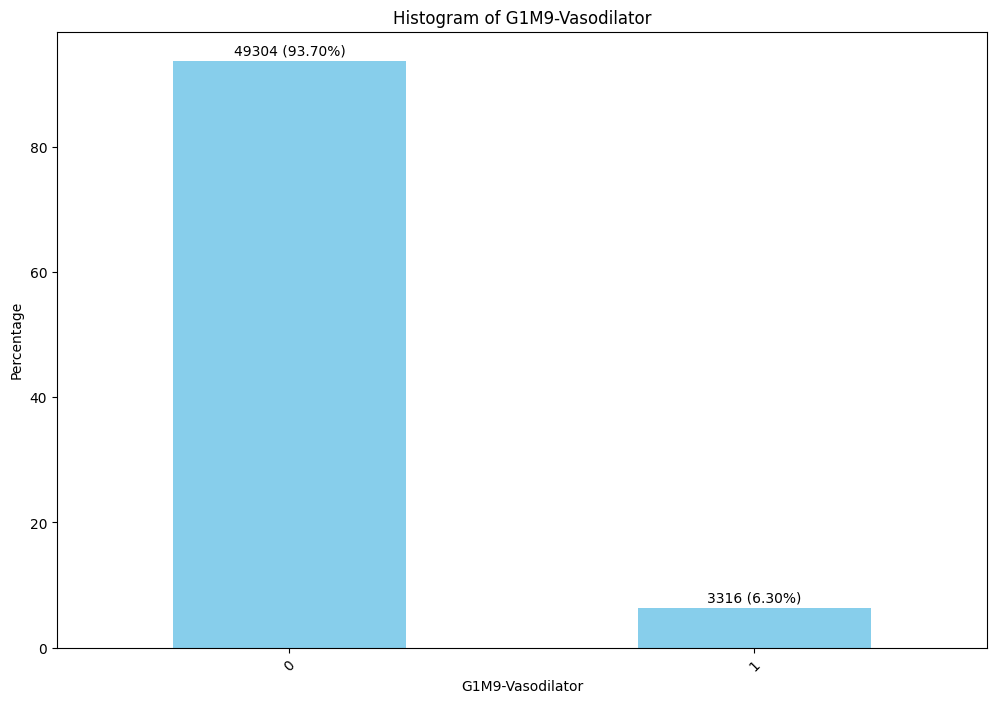

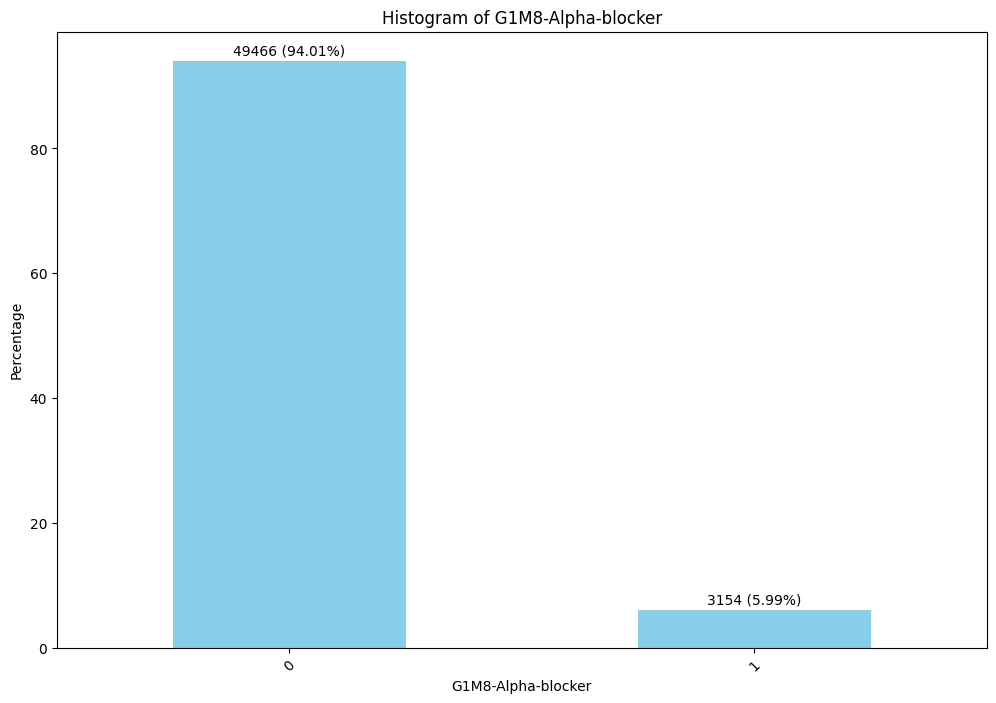

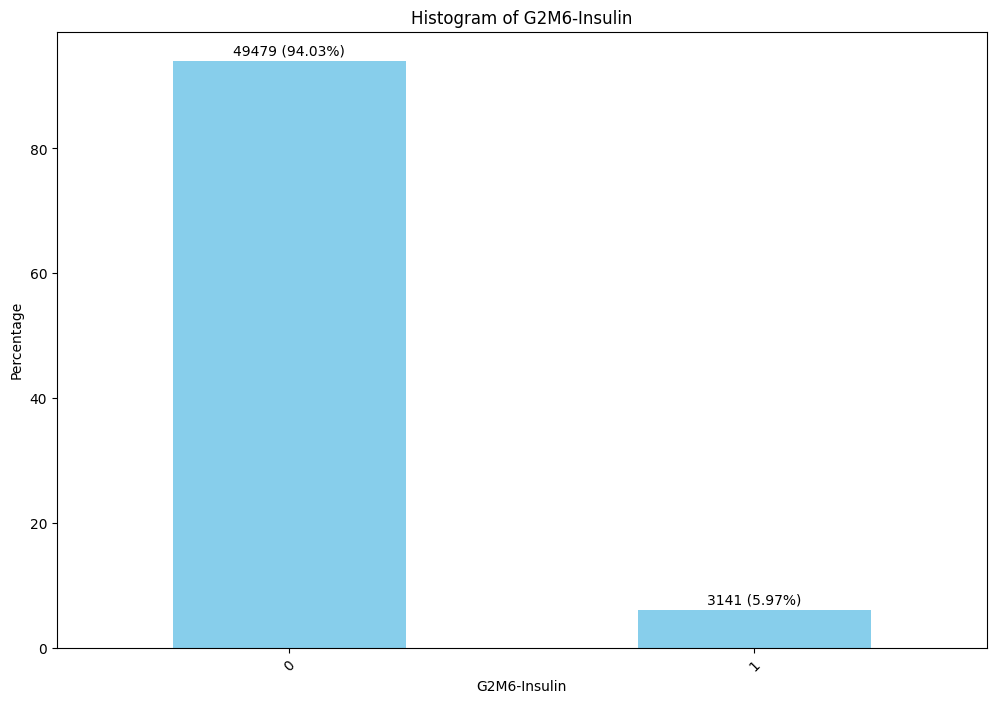

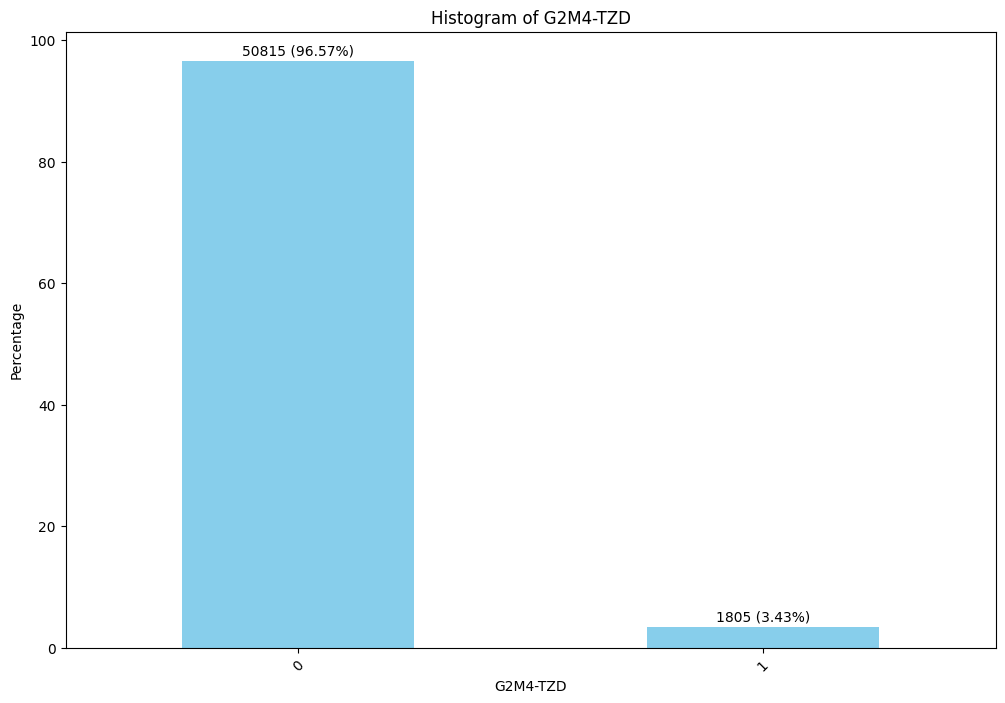

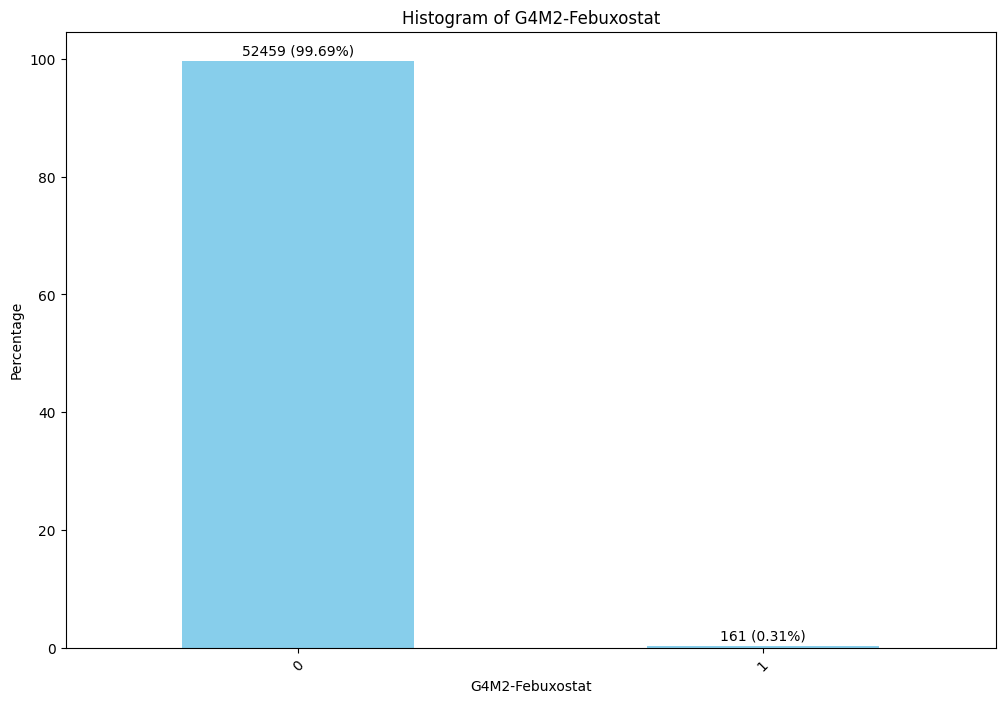

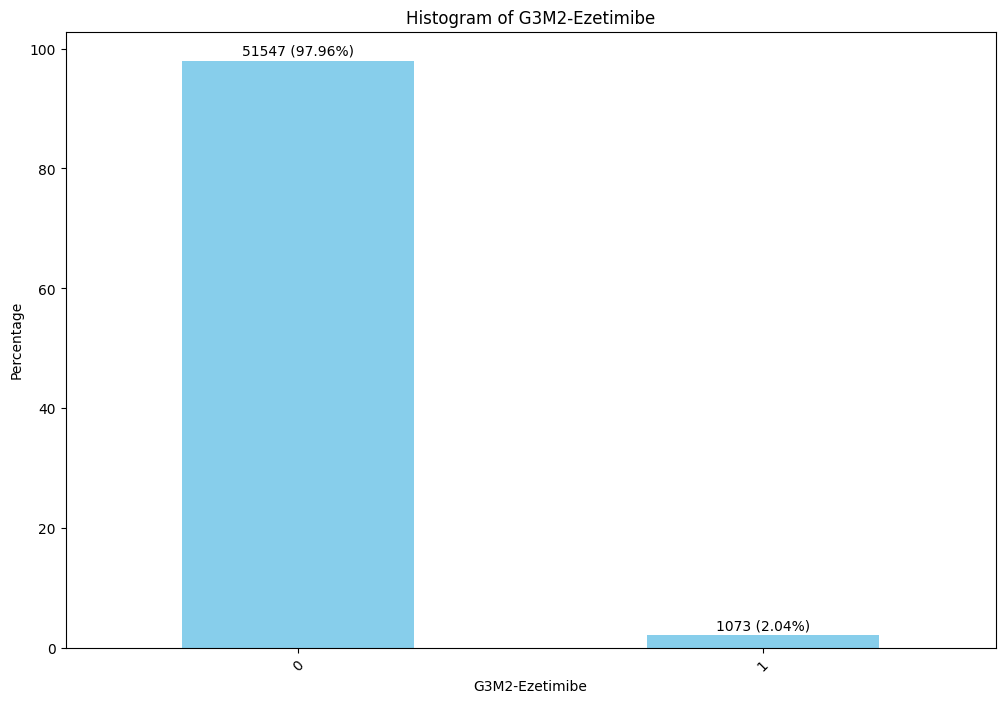

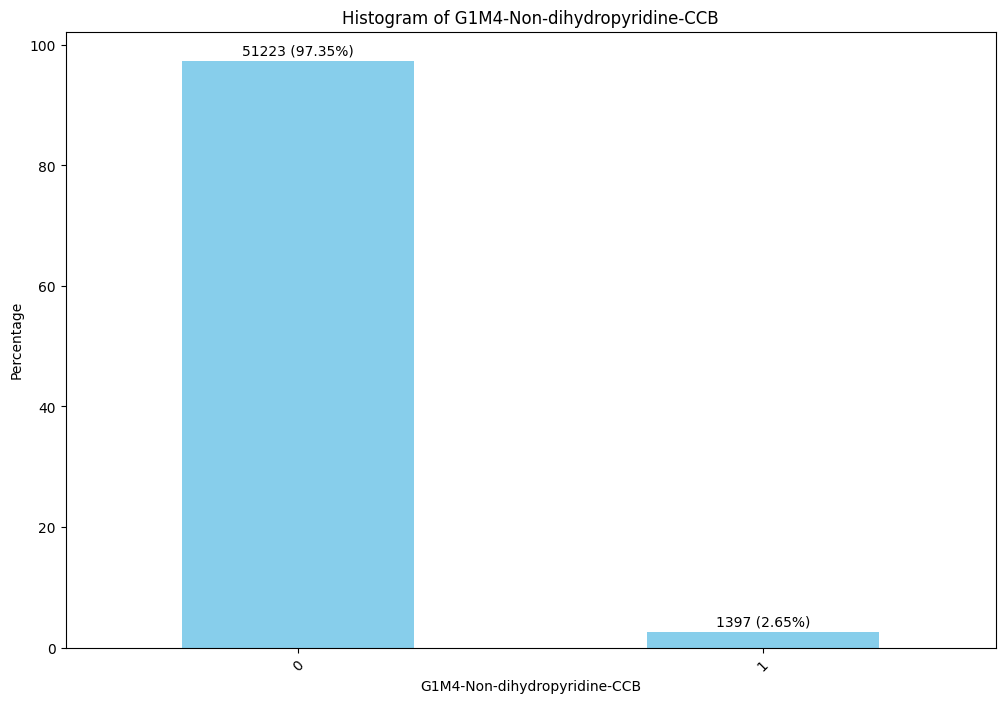

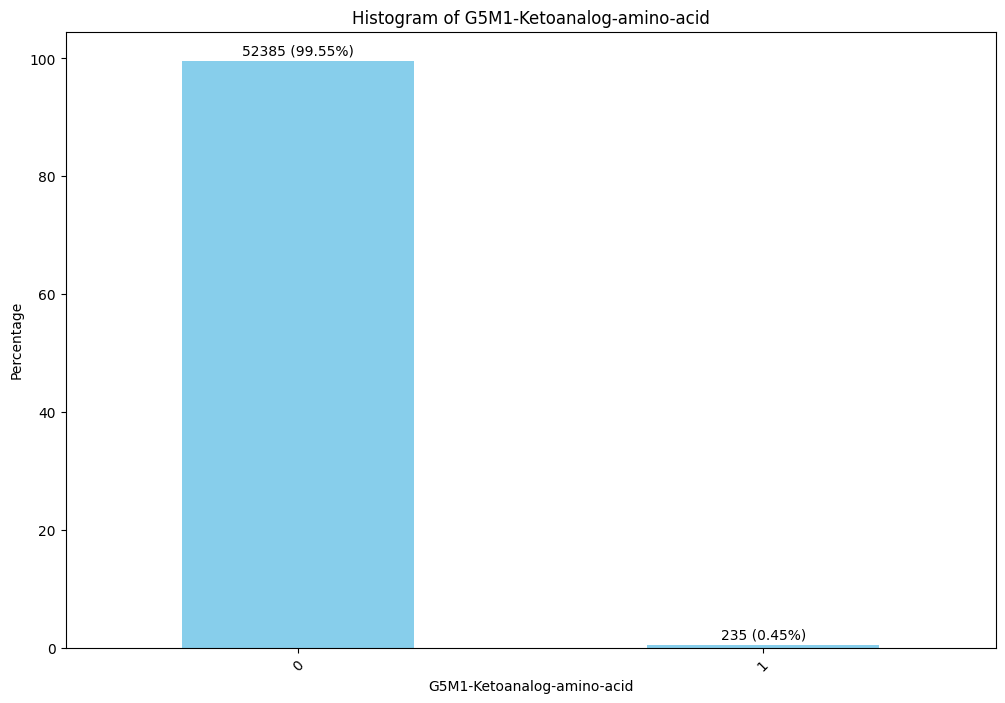

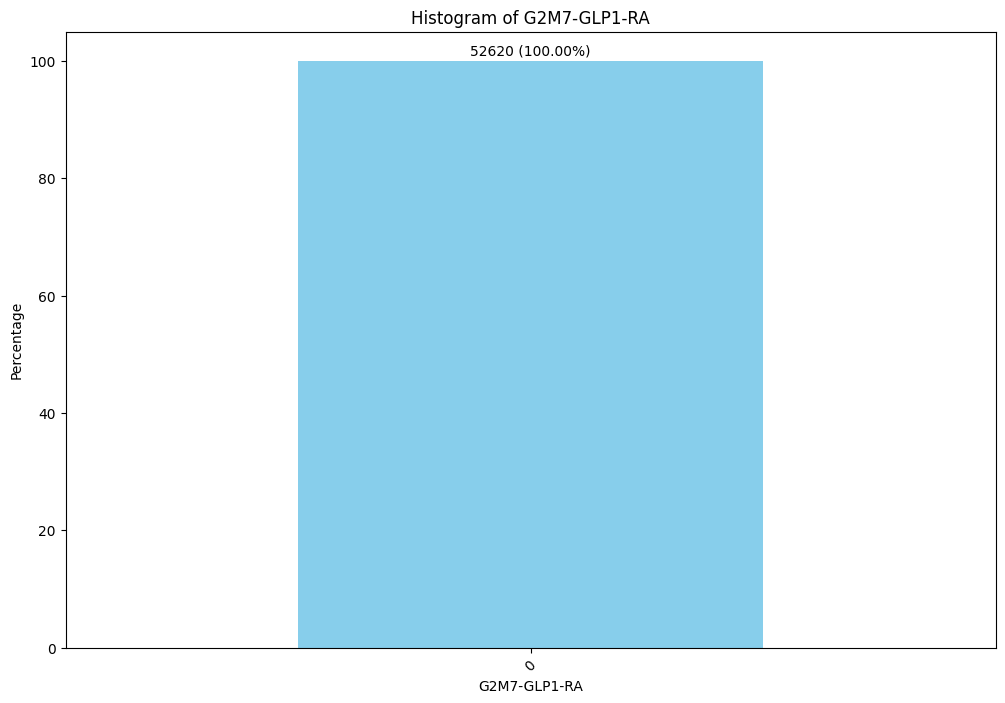

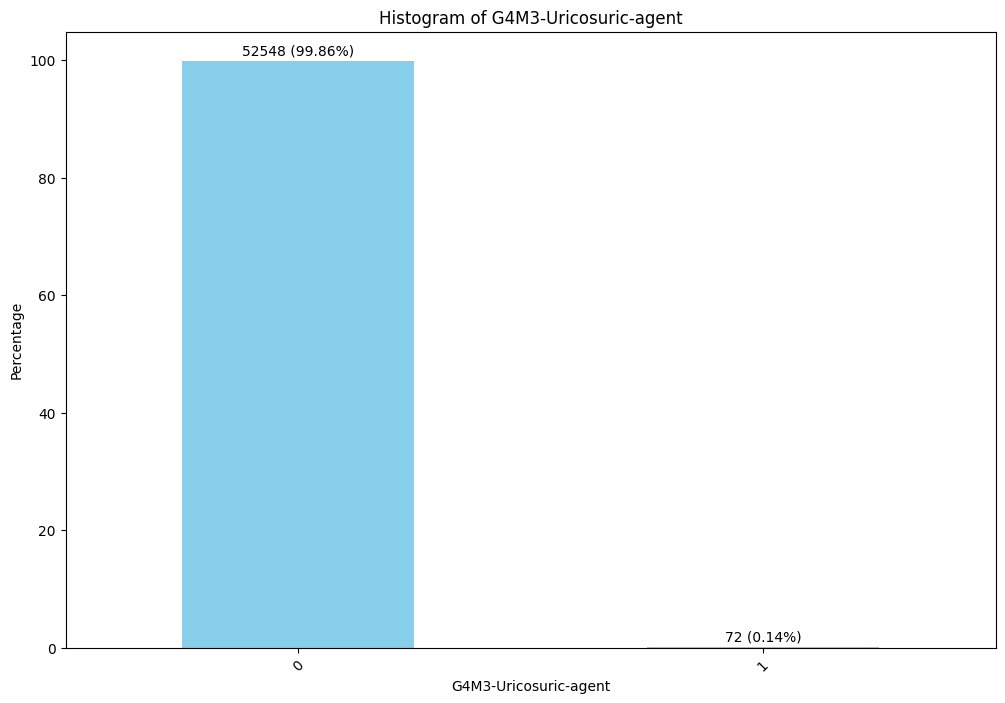

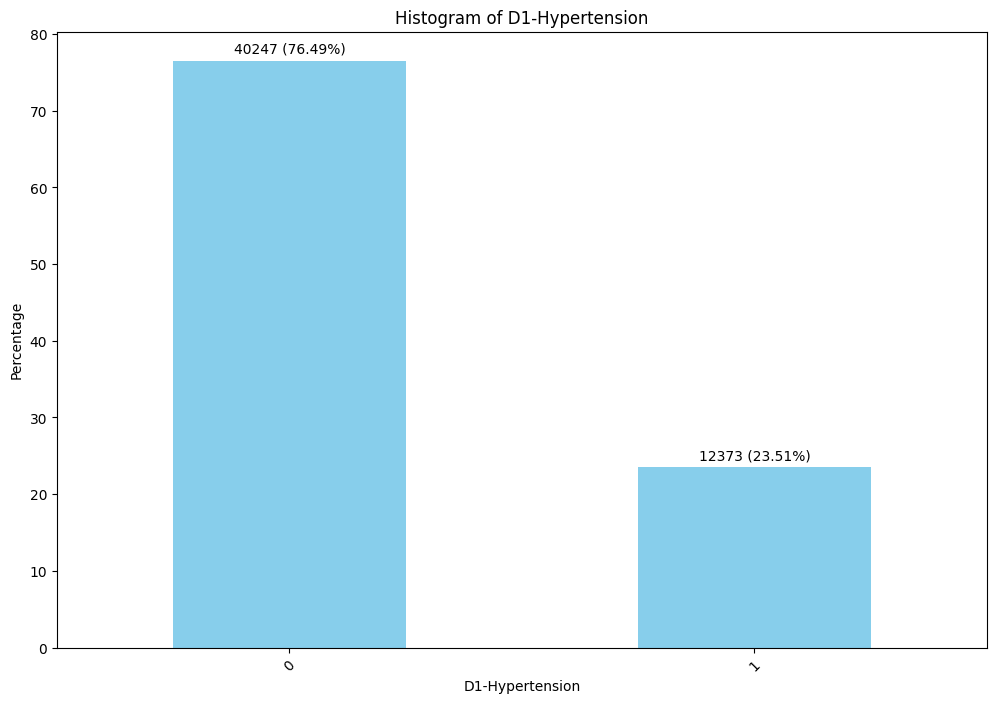

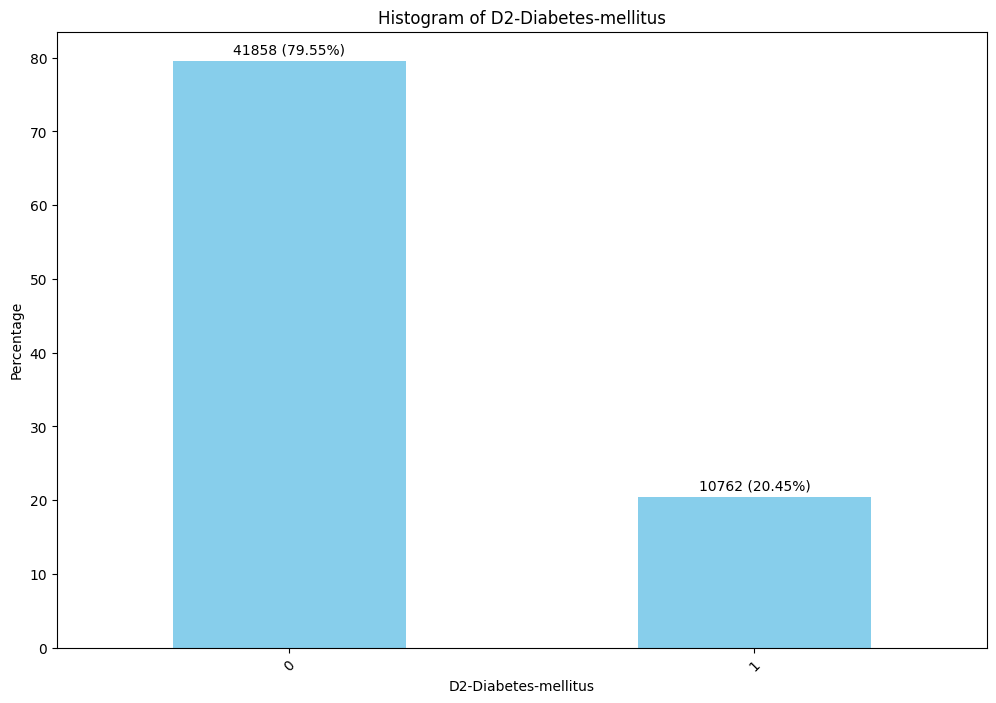

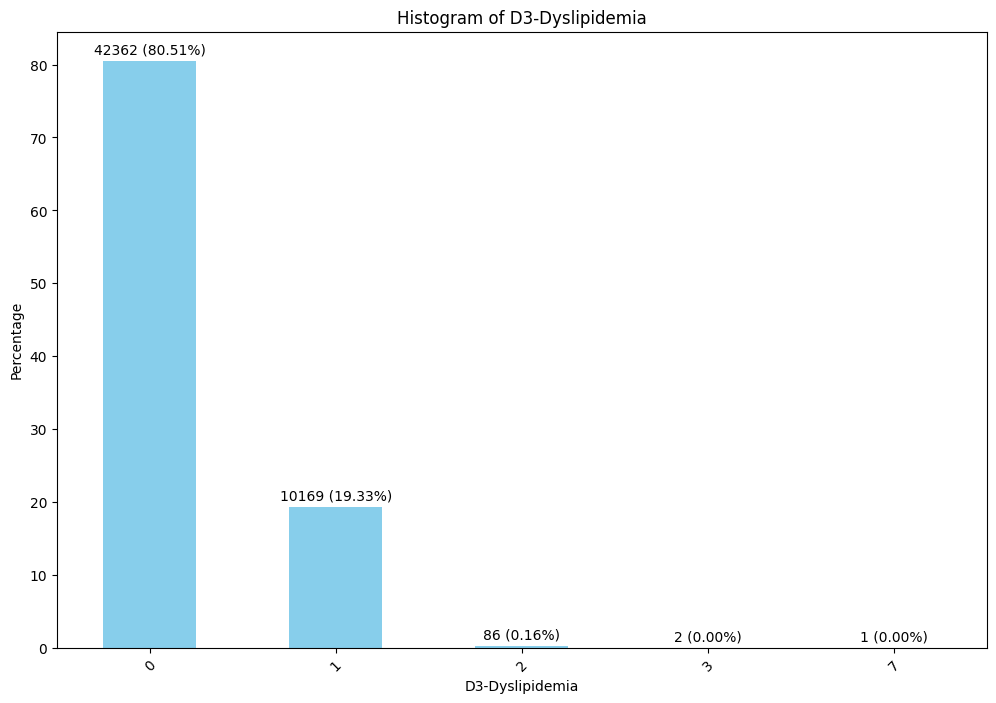

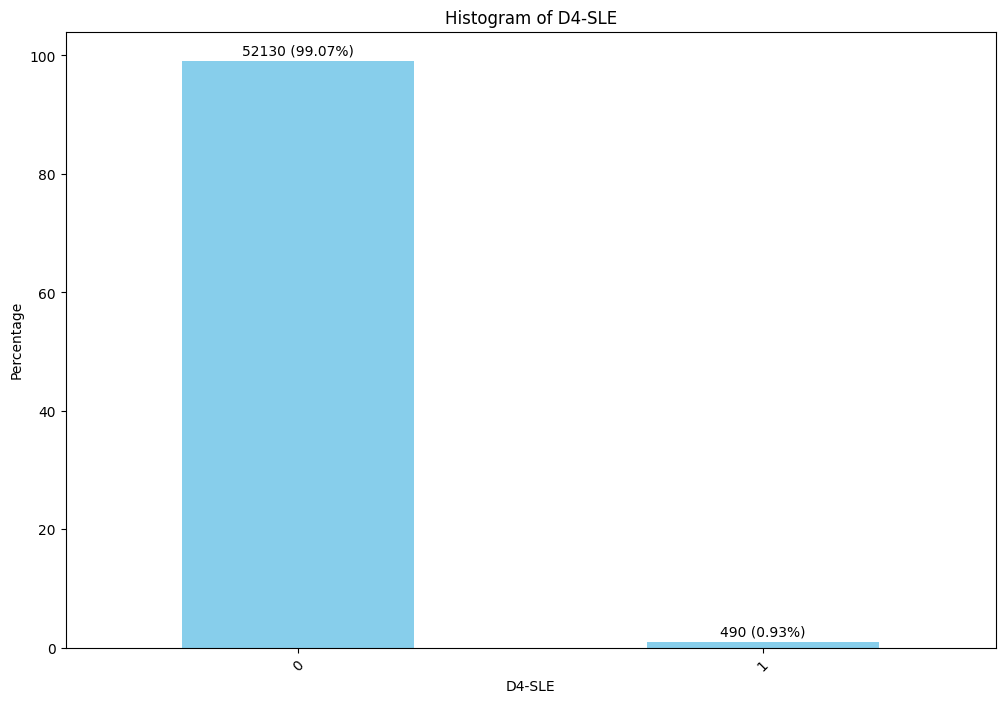

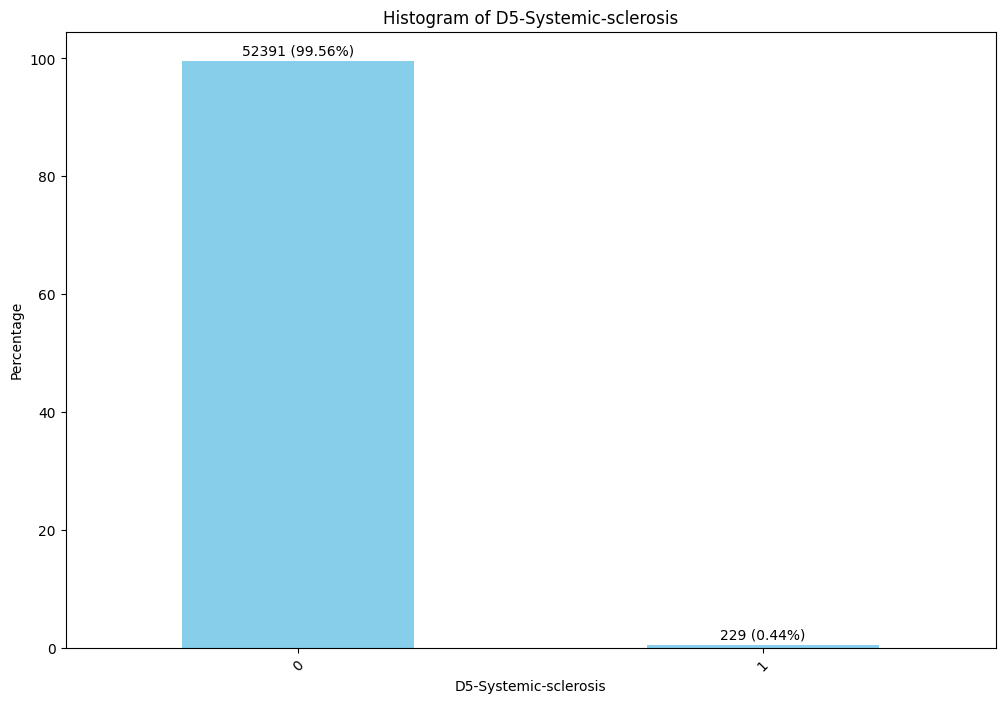

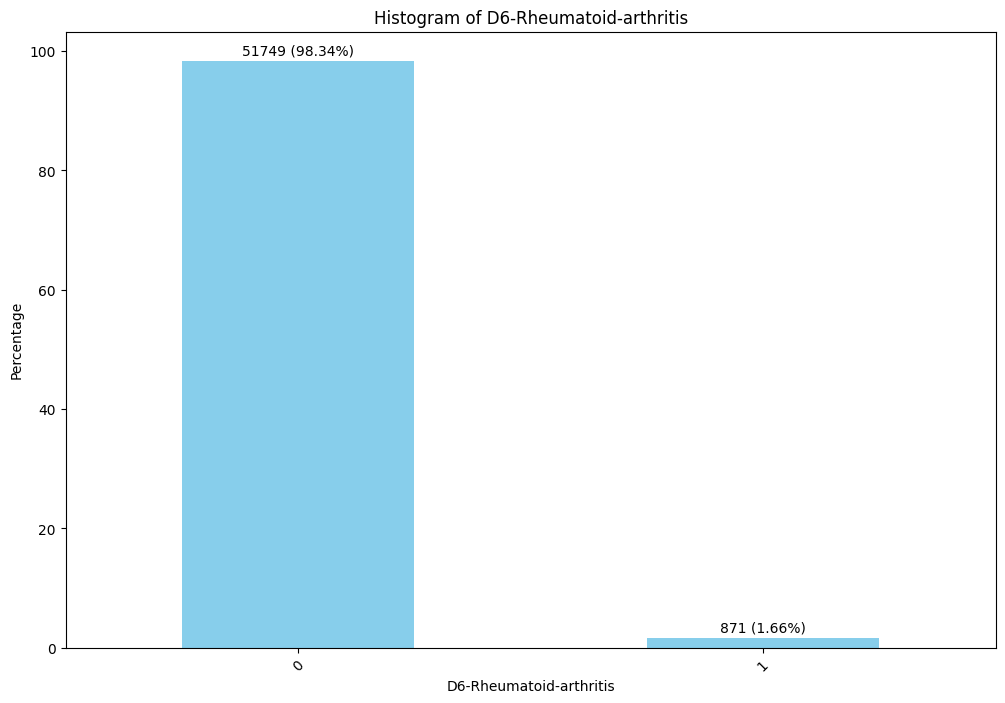

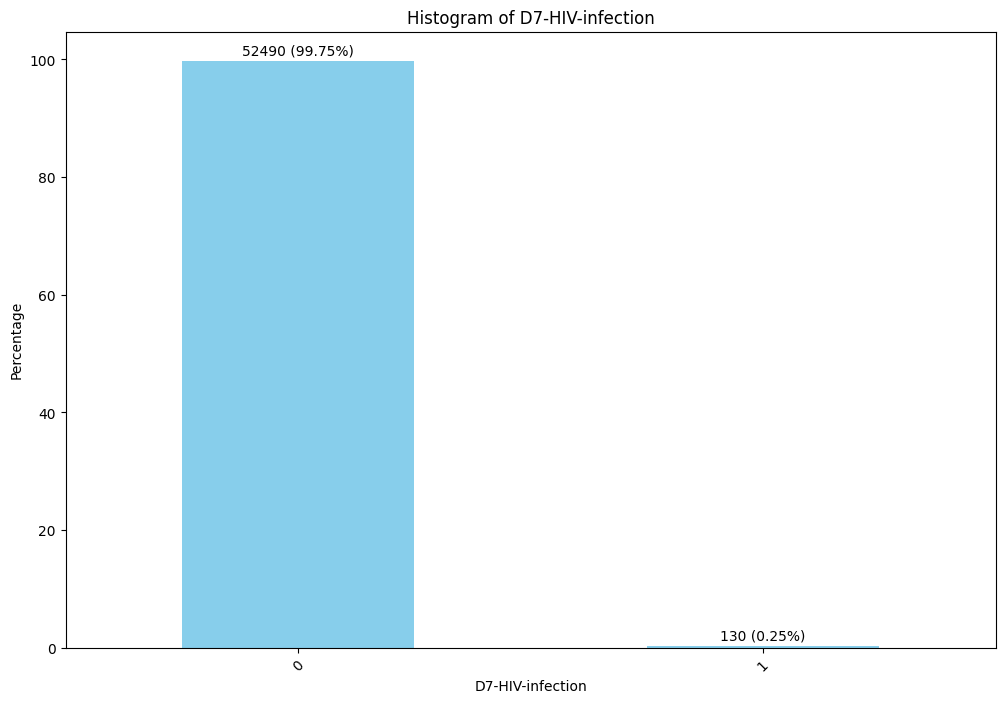

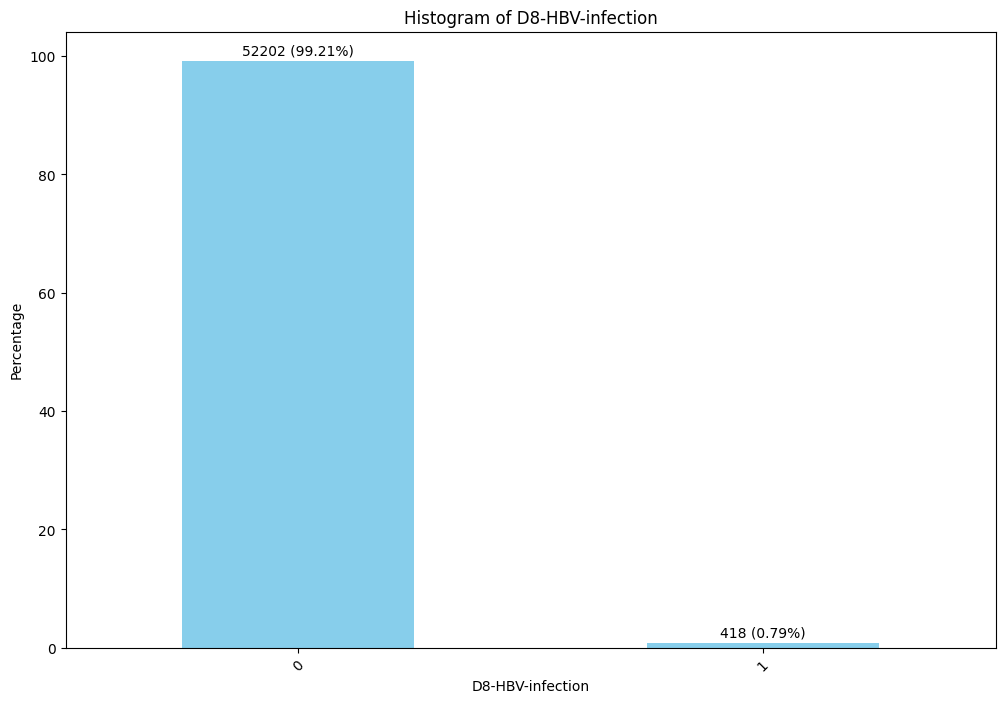

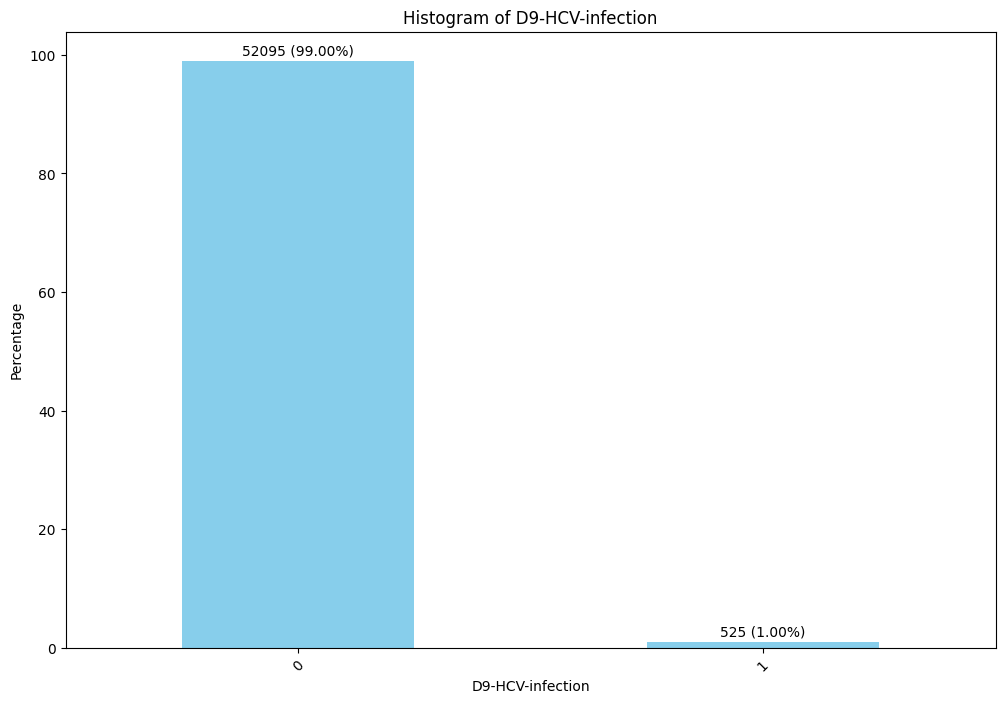

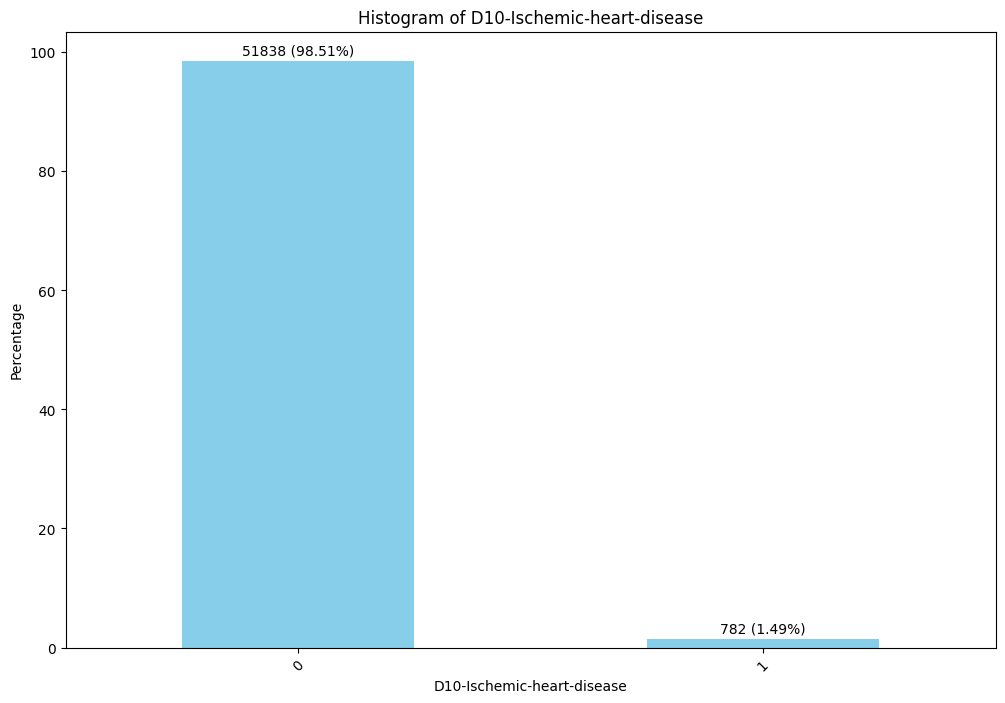

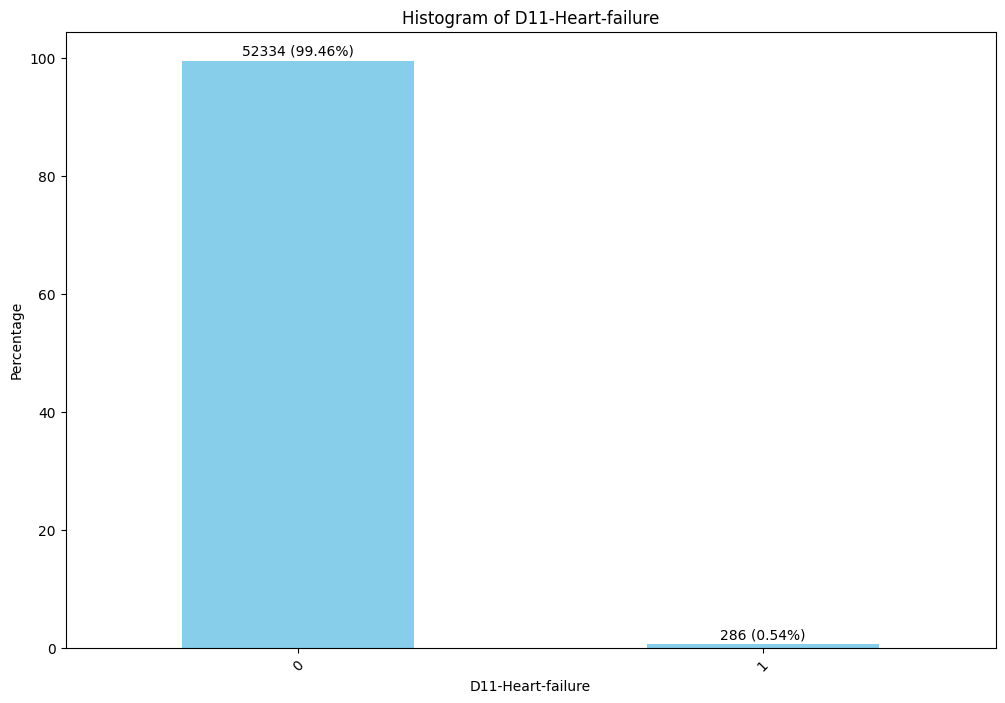

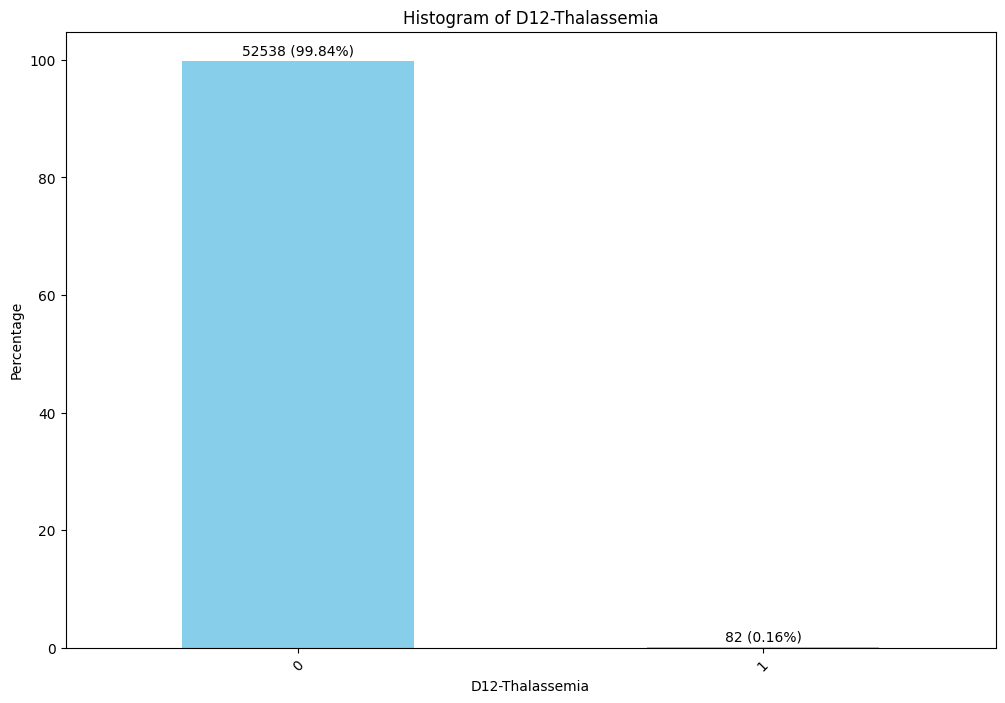

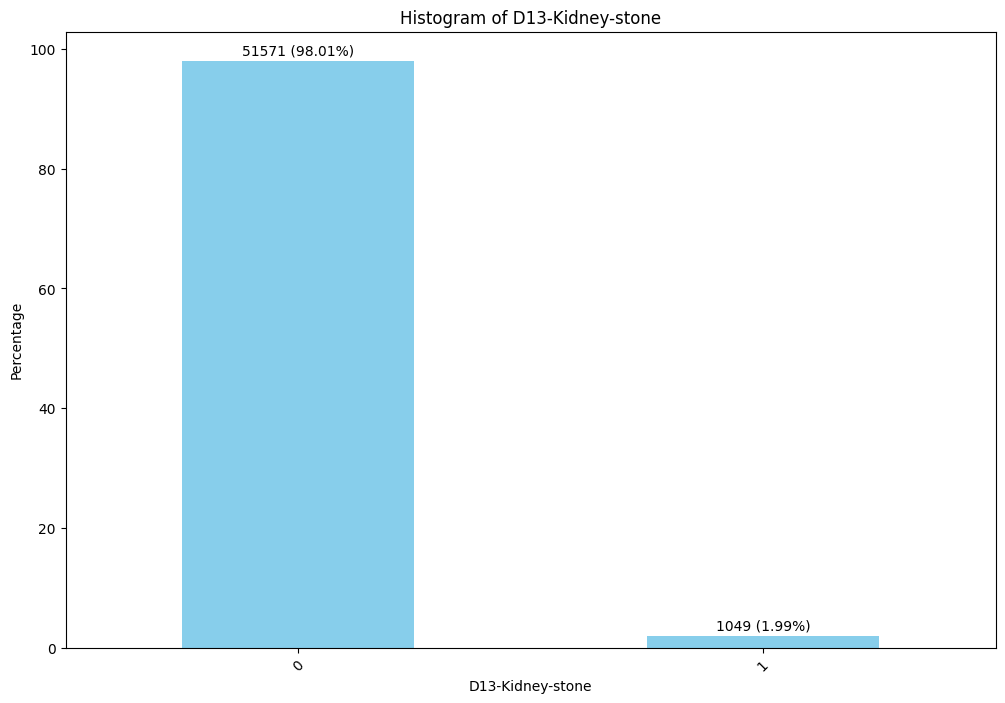

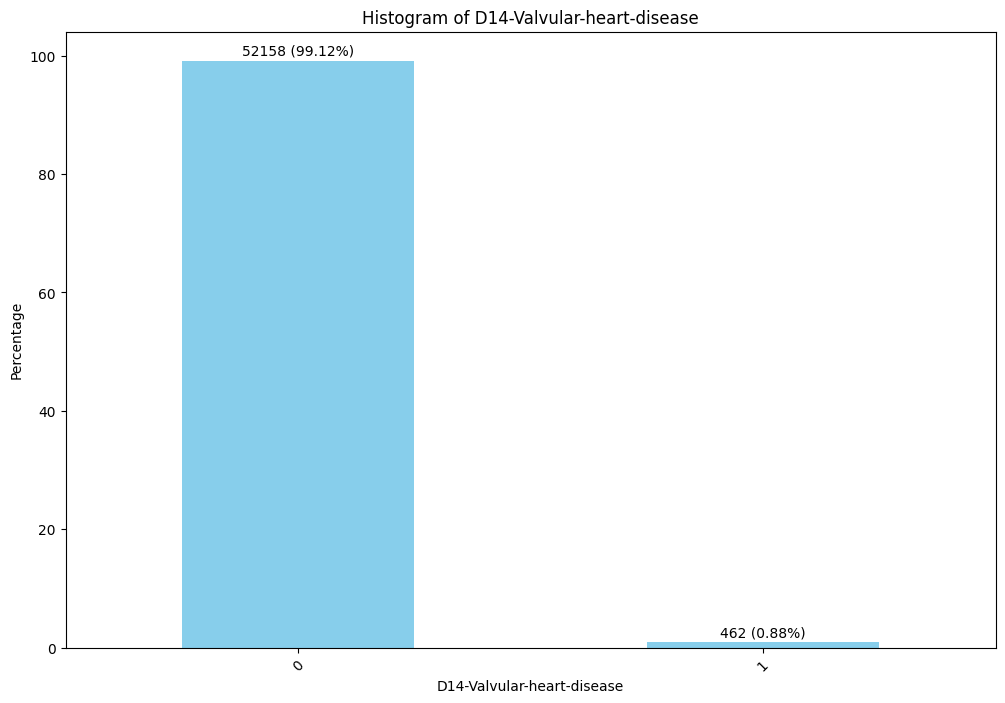

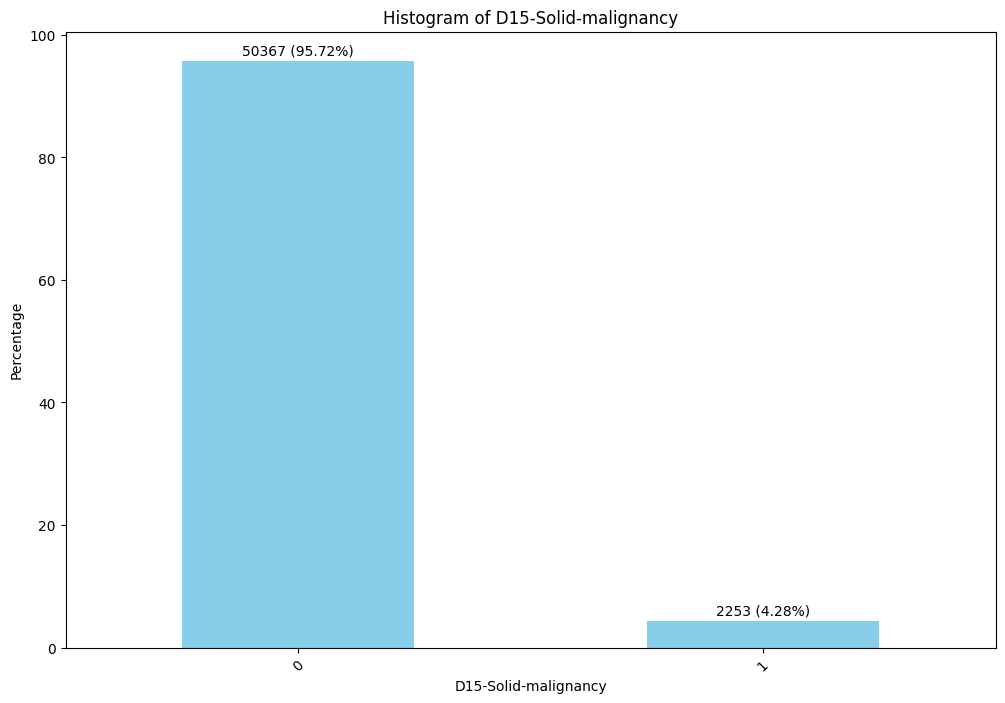

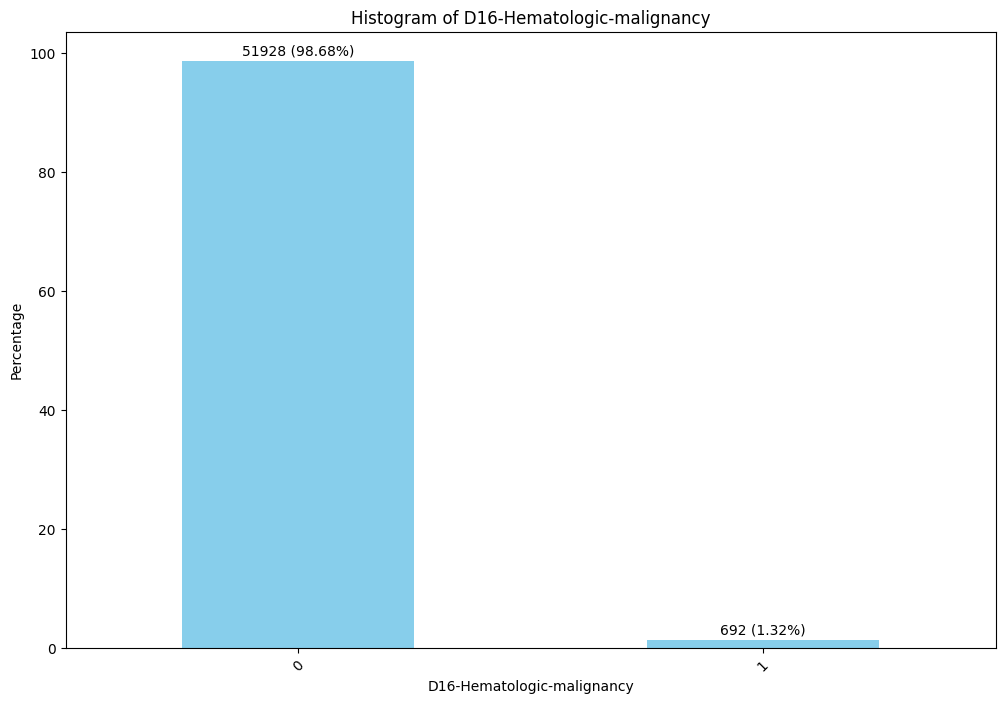

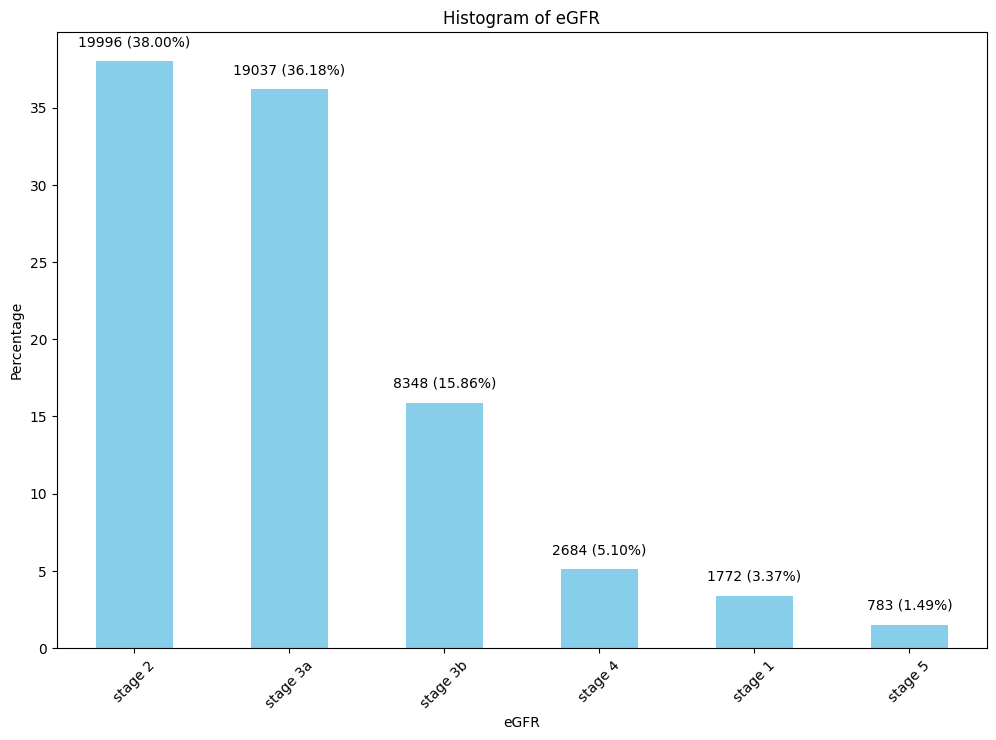

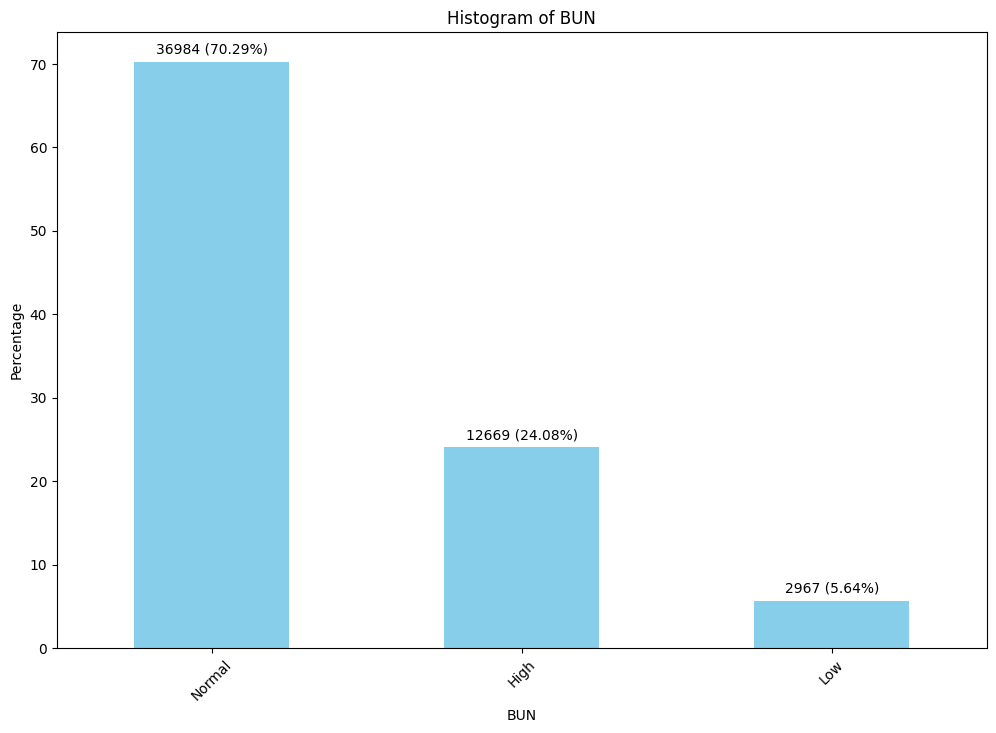

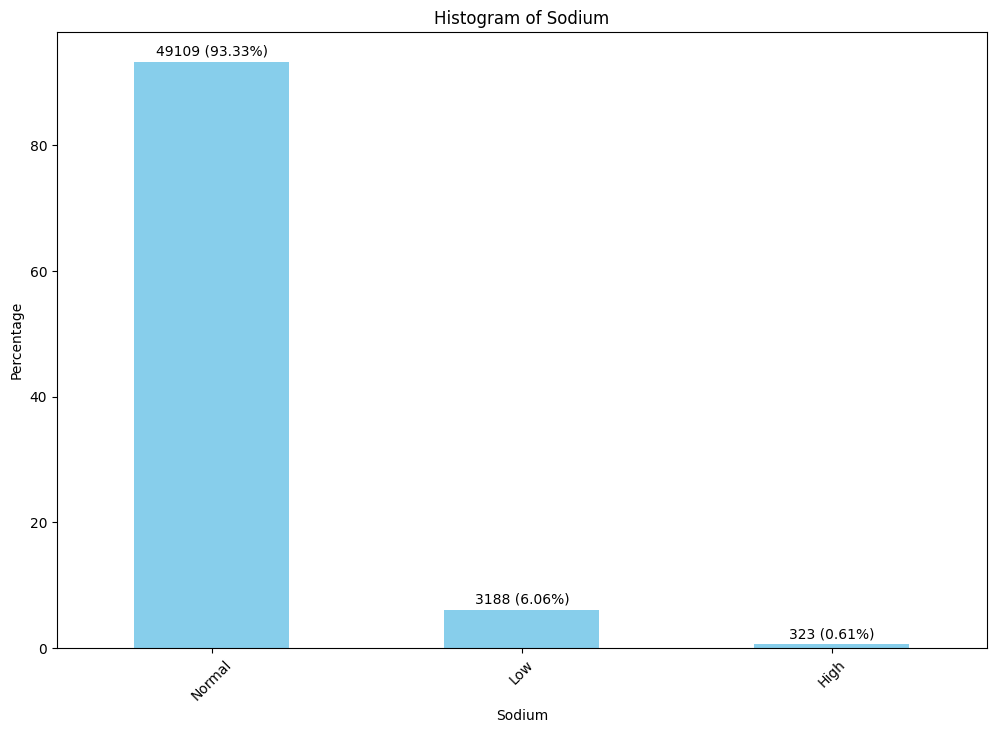

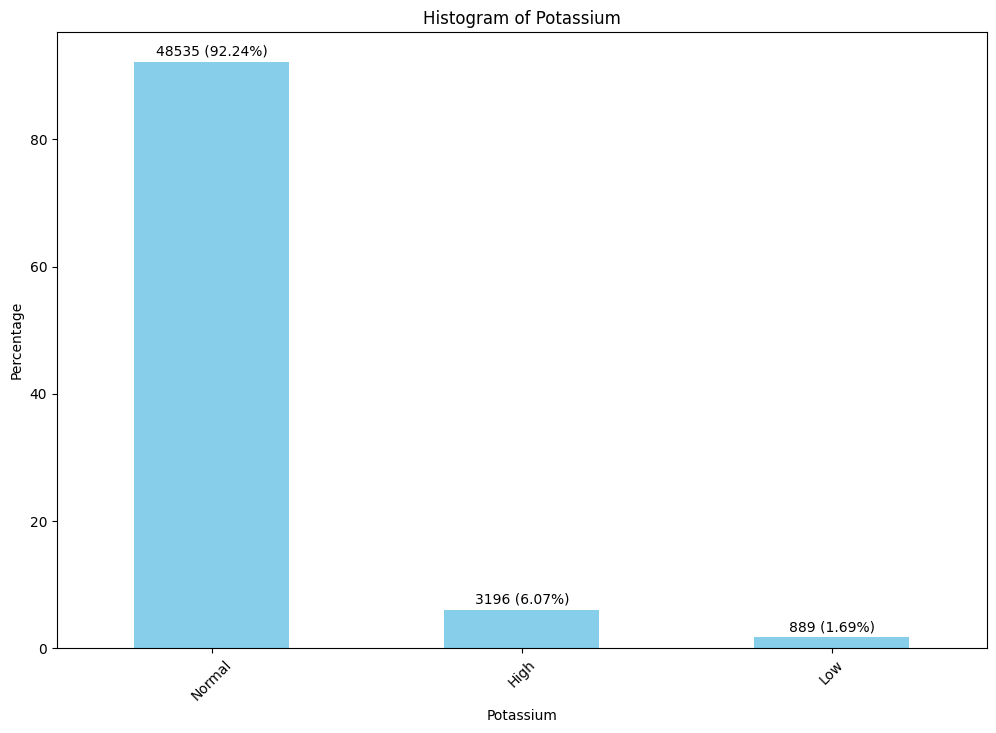

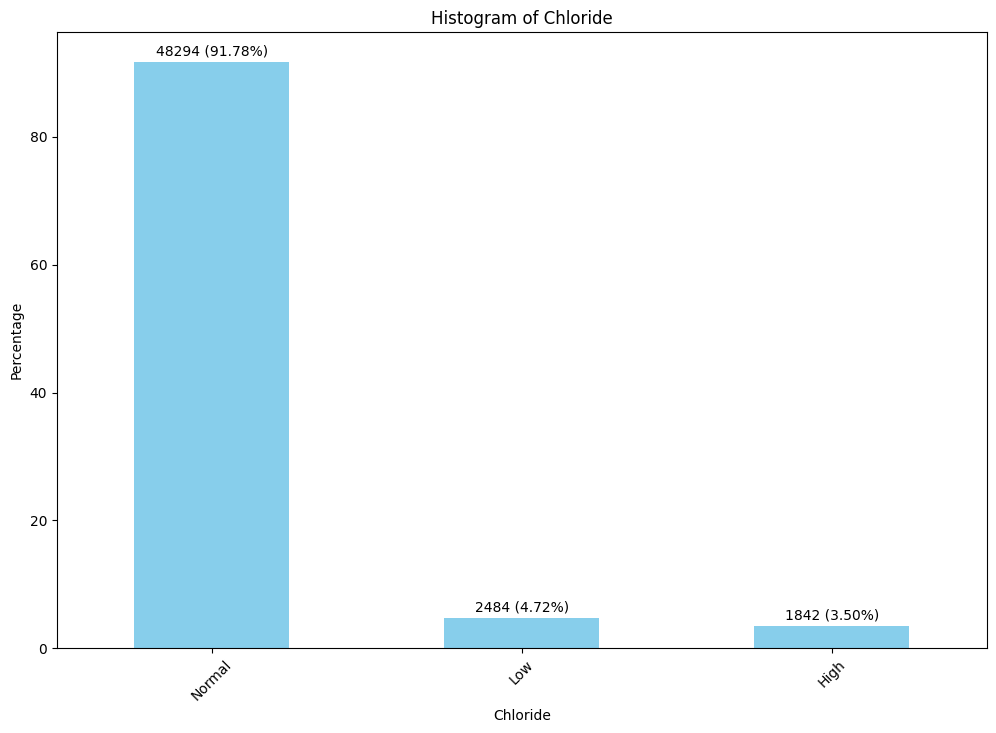

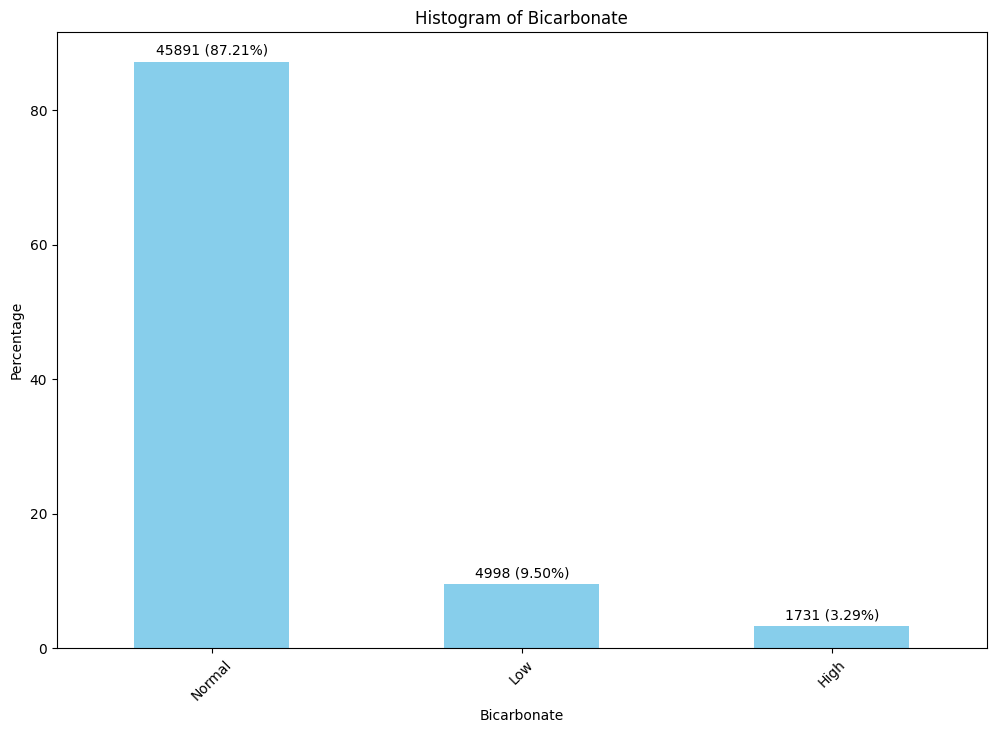

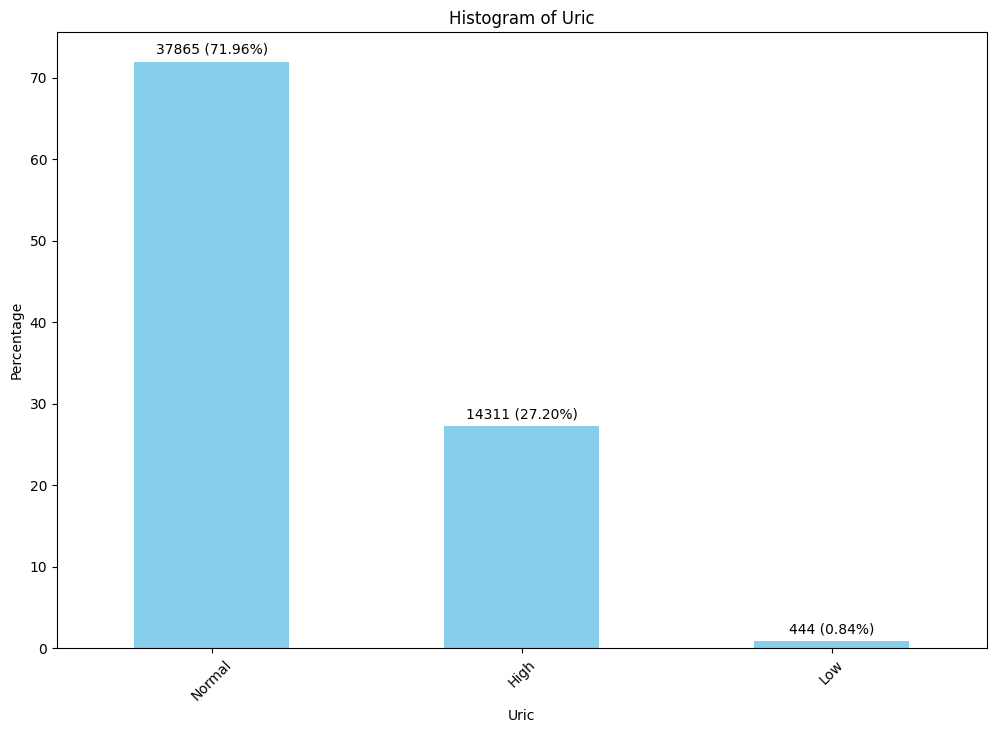

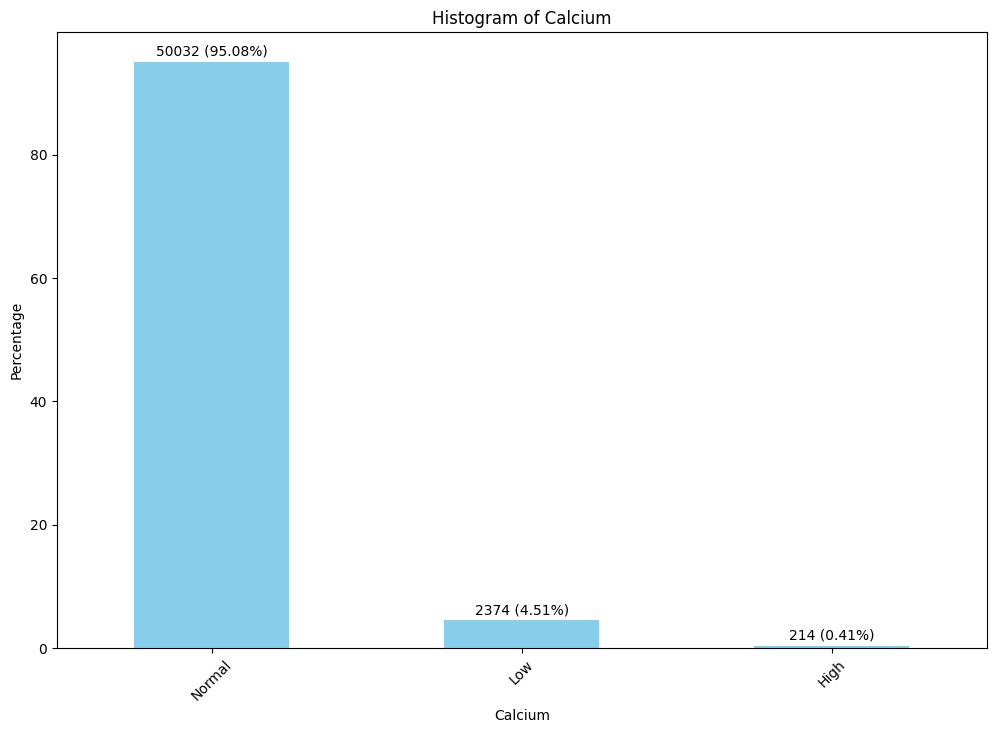

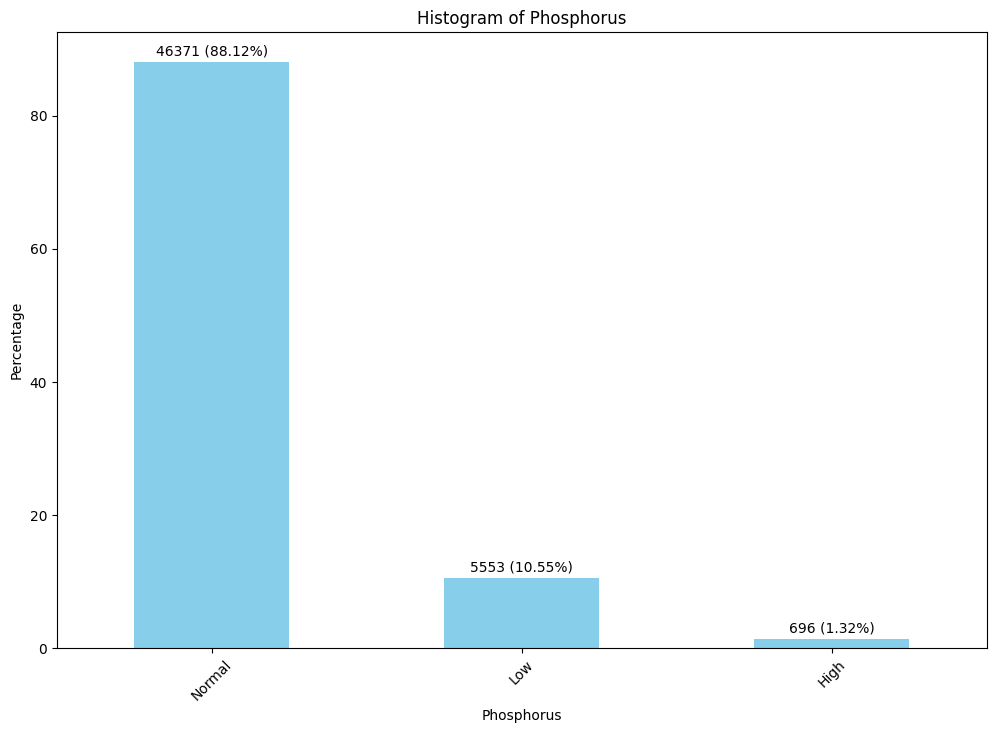

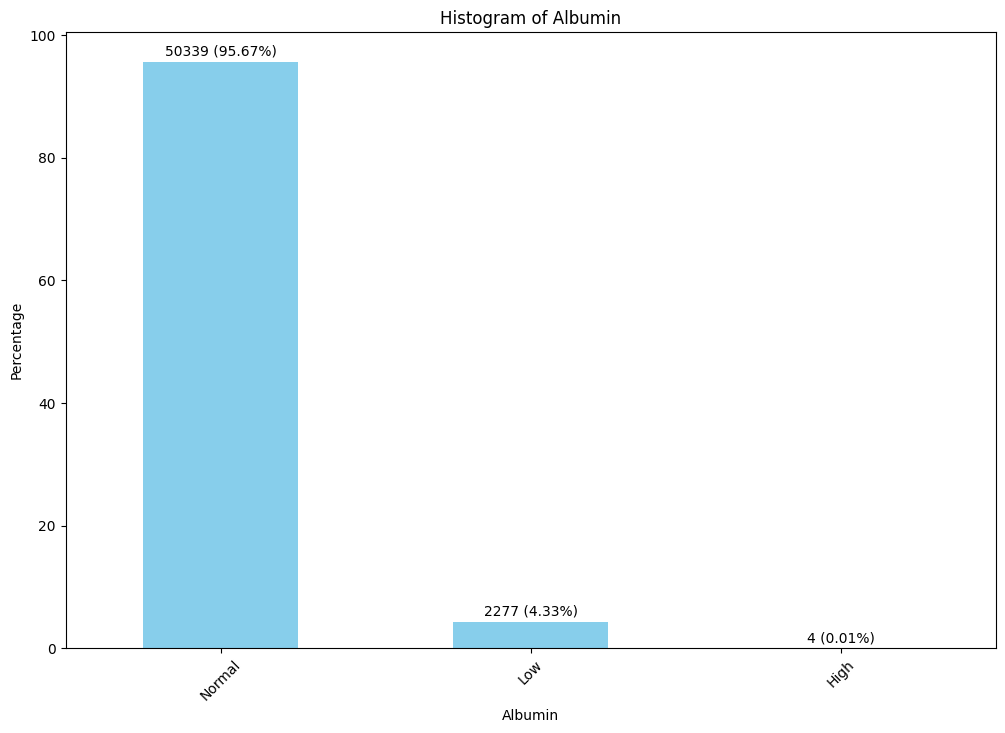

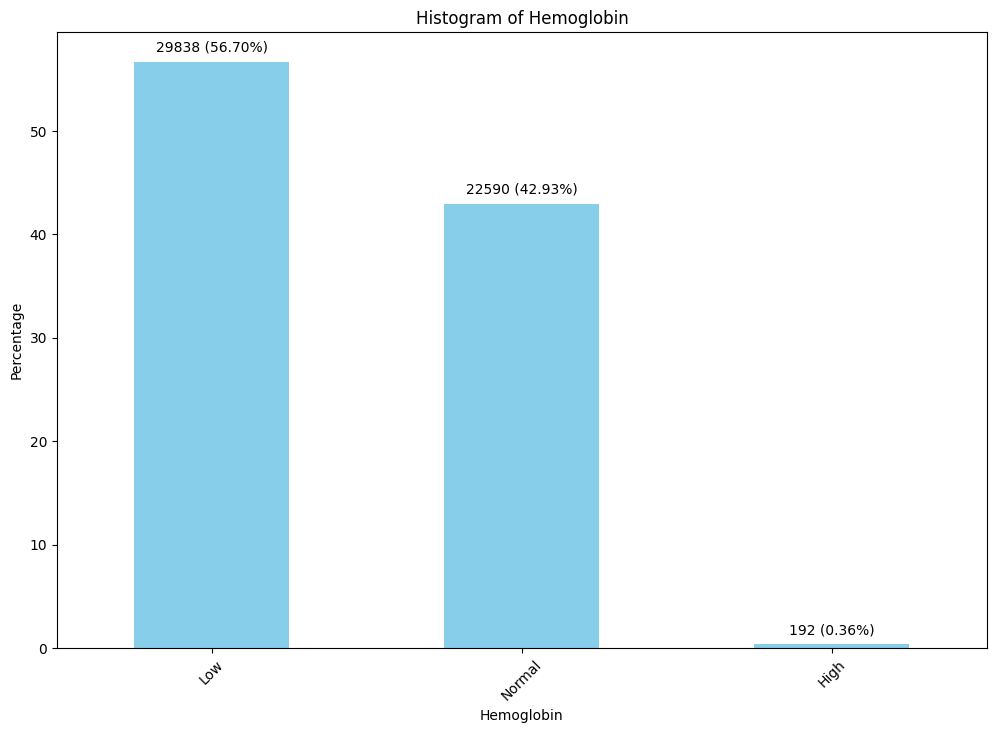

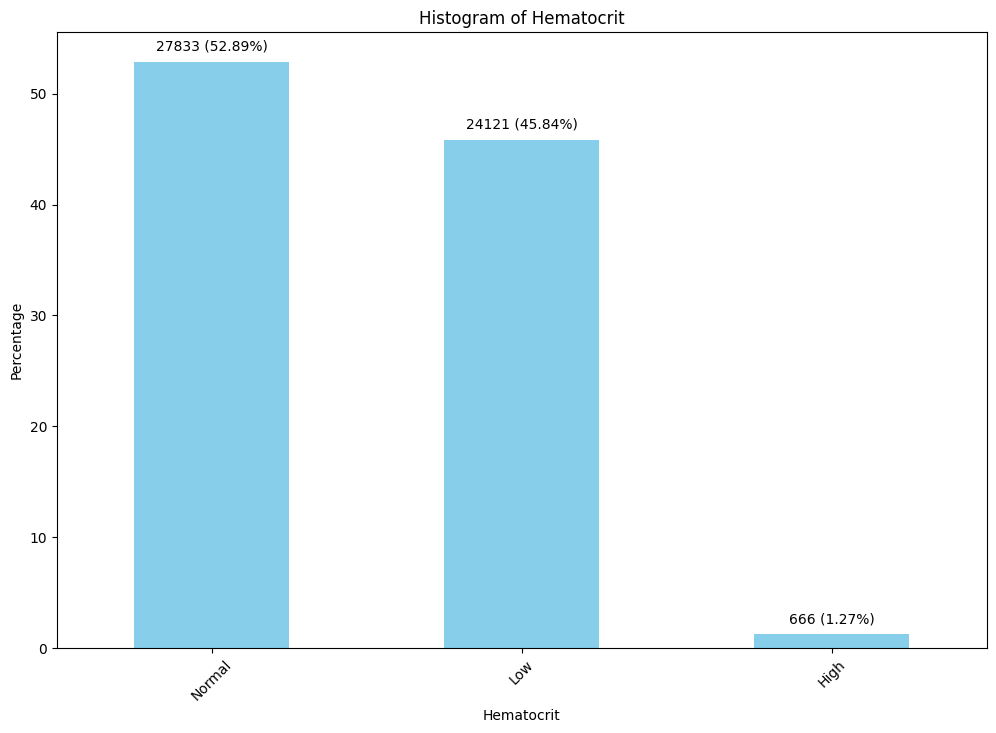

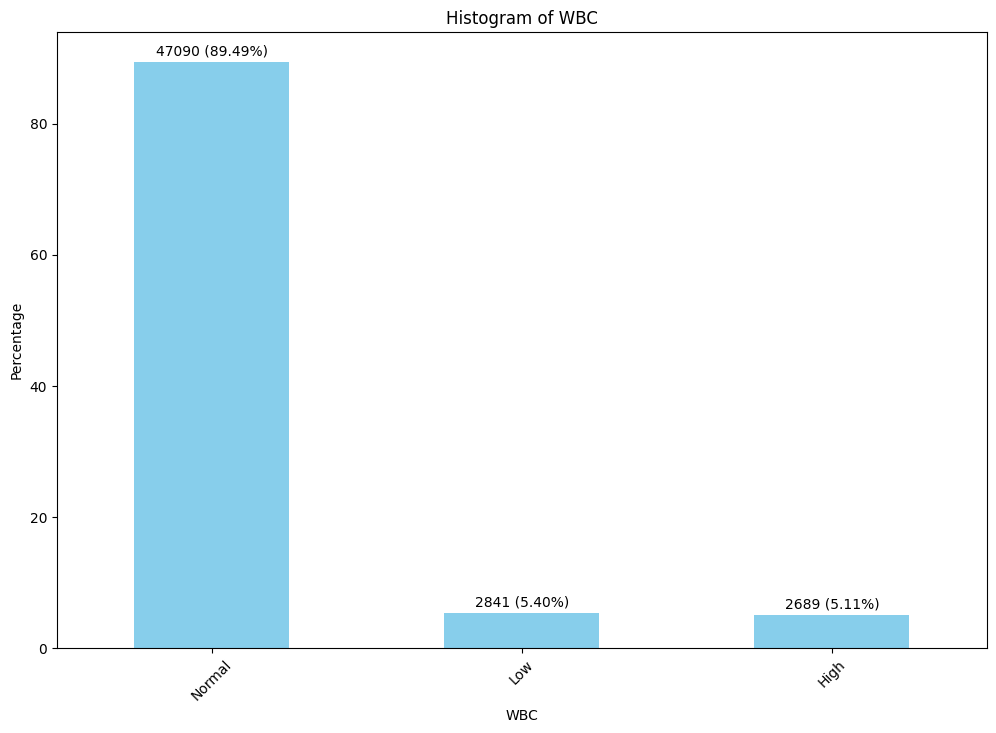

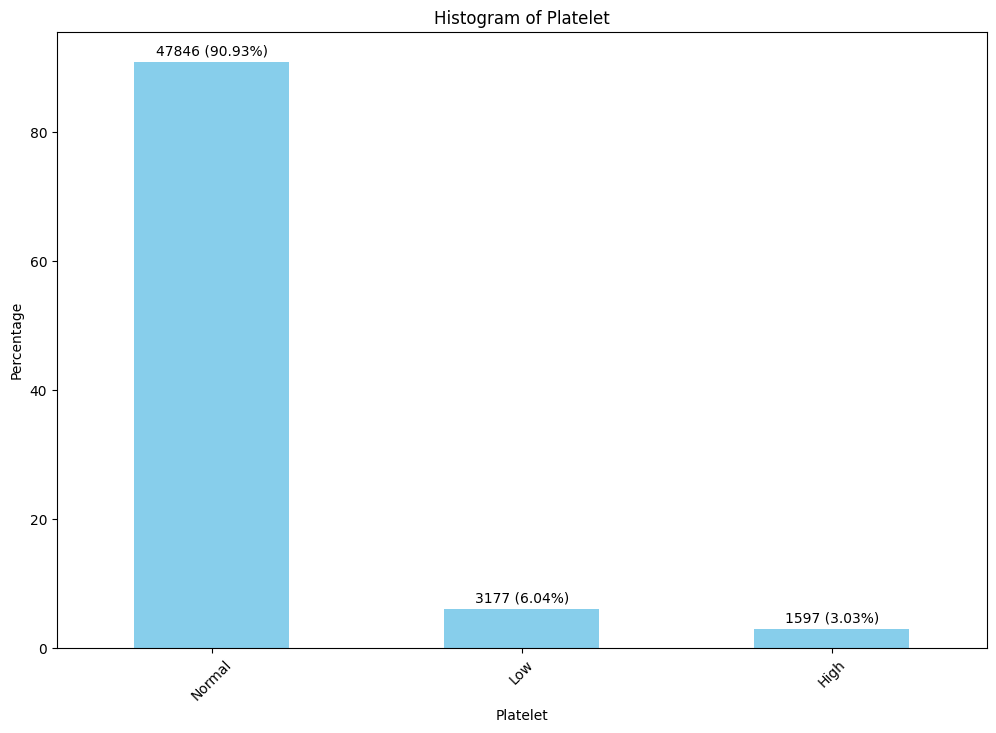

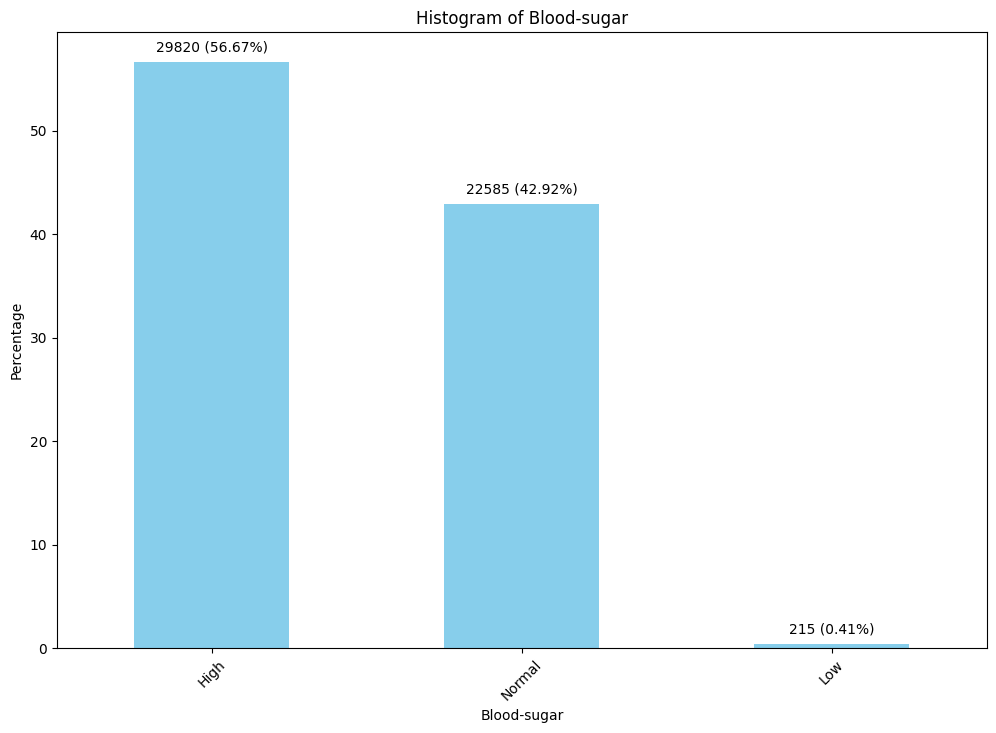

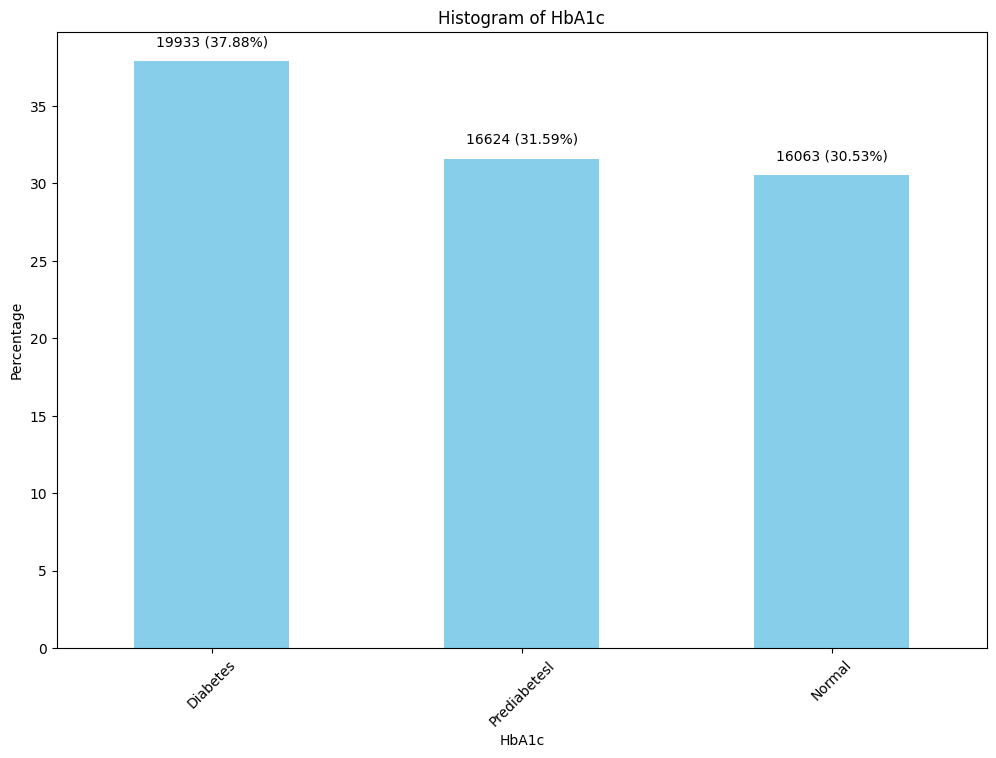

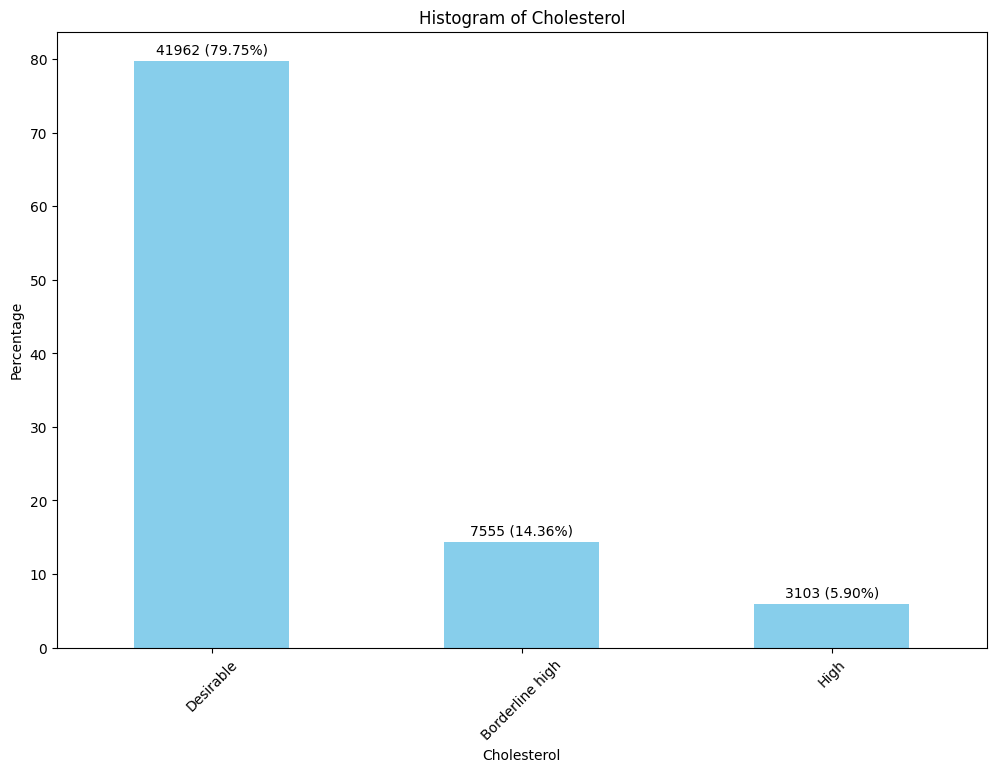

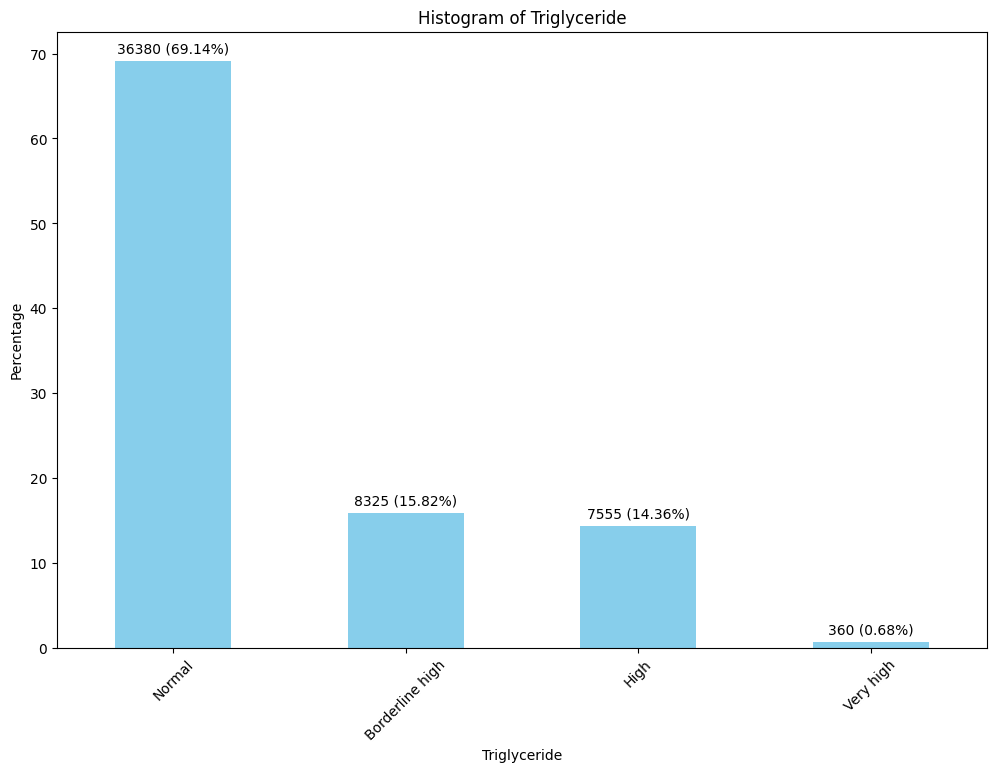

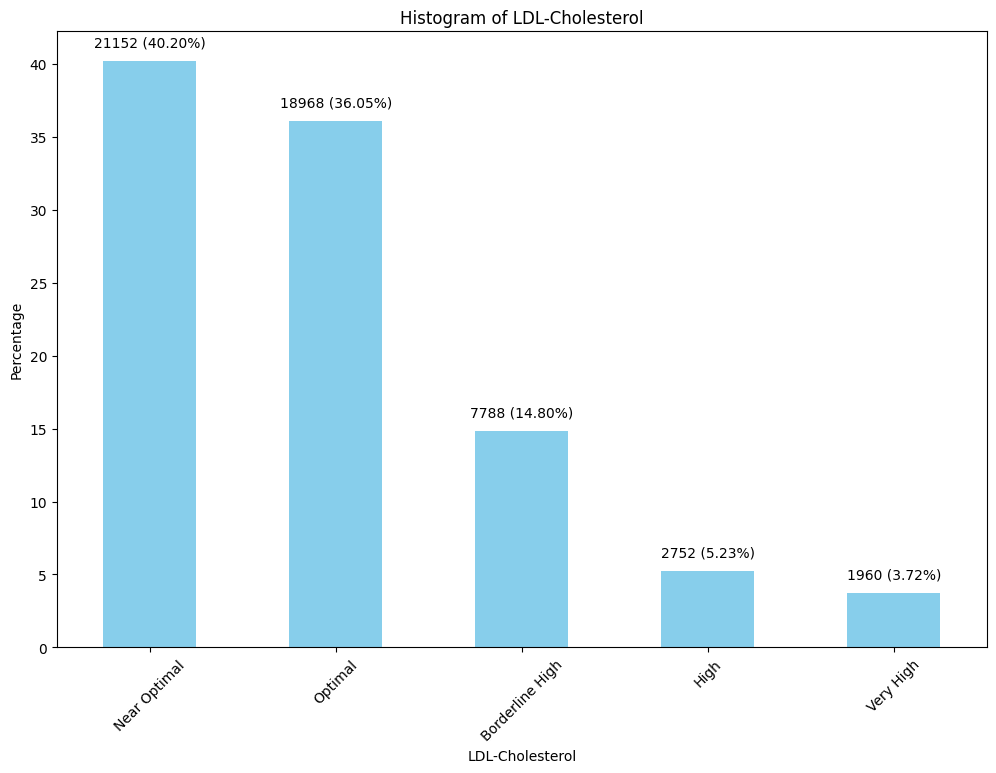

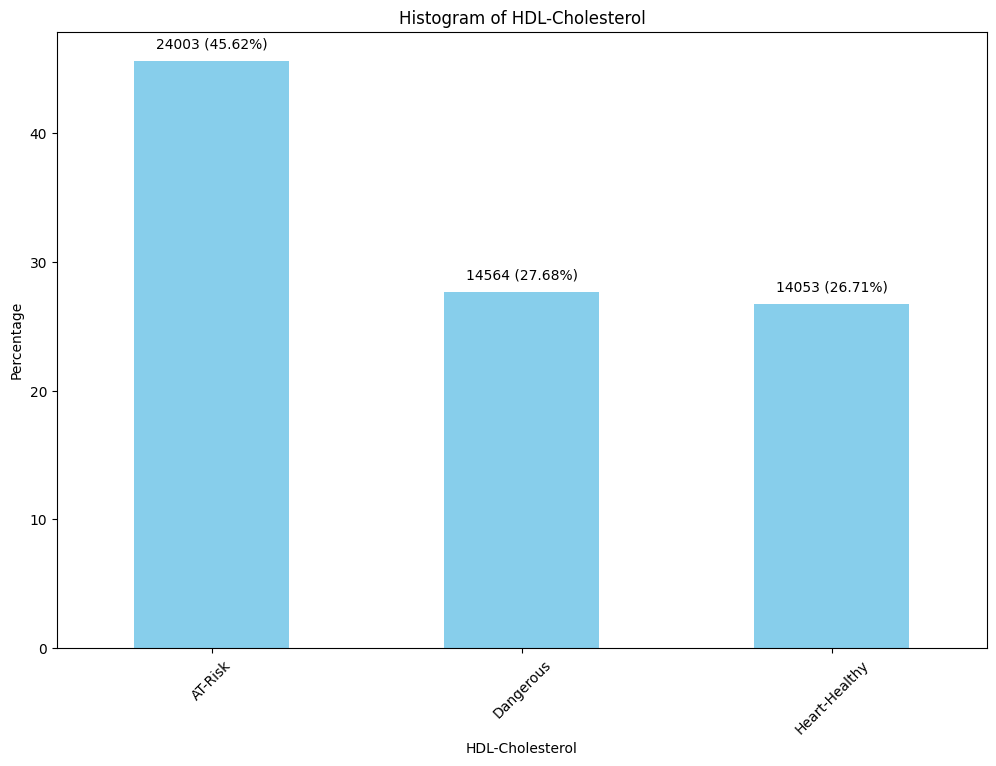

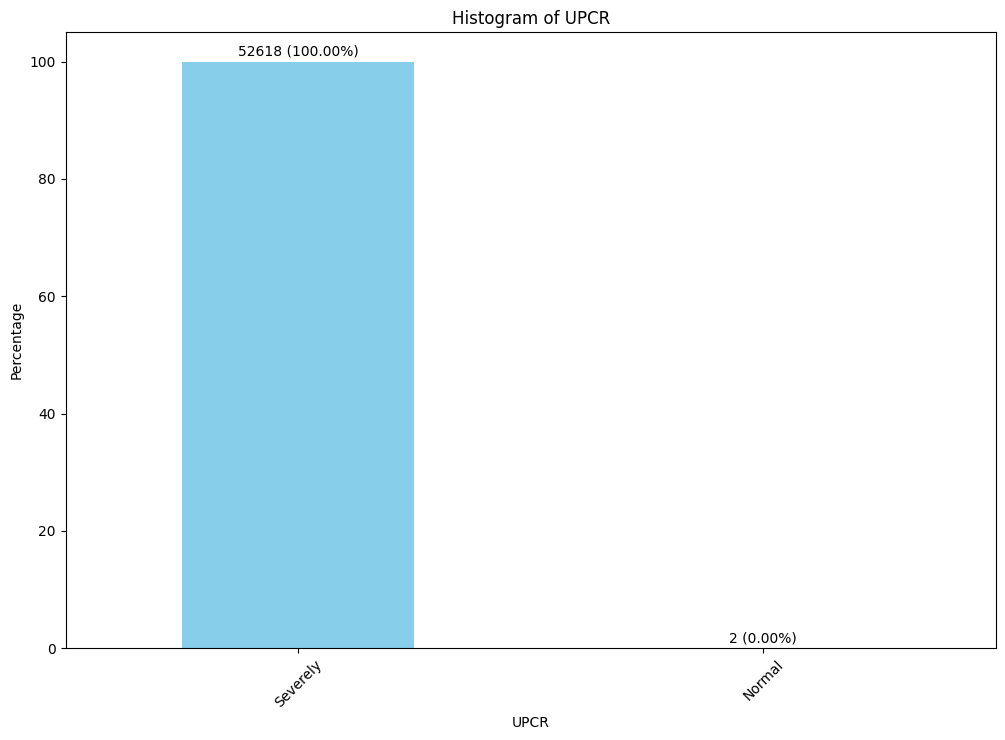

In [84]:
object_category_columns = data.select_dtypes(include=['object', 'category', 'int64']).columns

for column in object_category_columns:
    plt.figure(figsize=(12, 8))
    value_counts = data[column].value_counts(normalize=True) * 100  # แปลงเป็นเปอร์เซ็นต์
    total_records = len(data[column])

    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)

    for i, (value, count) in enumerate(zip(value_counts, data[column].value_counts())):
        plt.text(i, value + 1, f'{count} ({value:.2f}%)', ha='center')  # สลับตำแหน่ง count และ value

    plt.show()

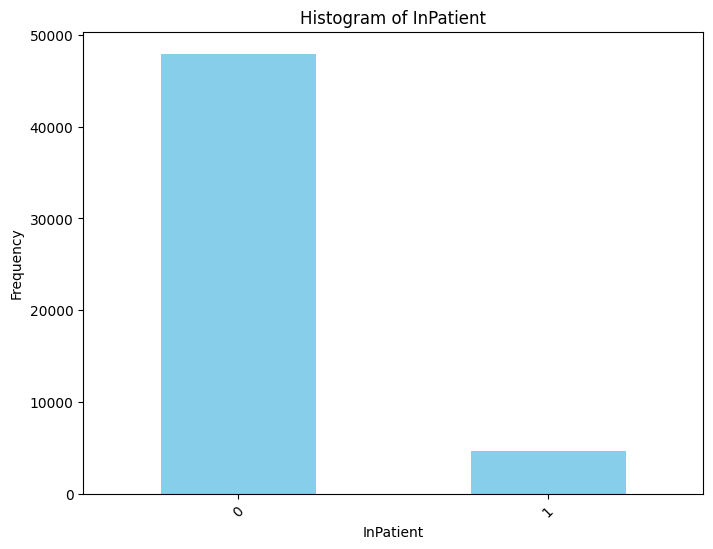

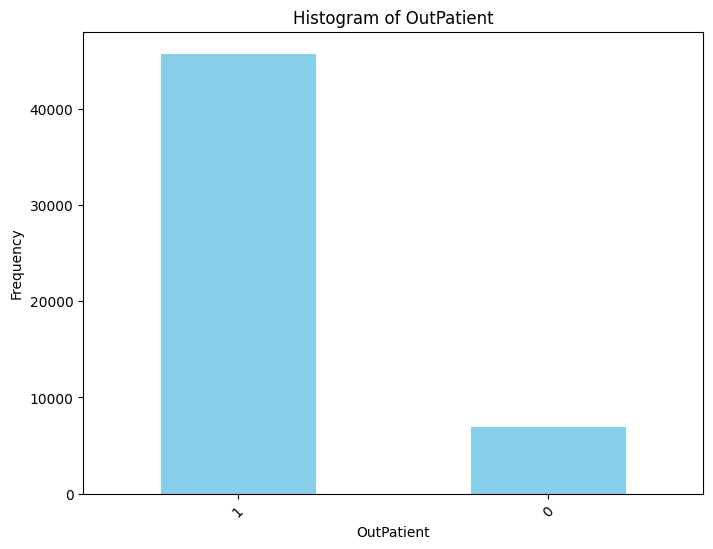

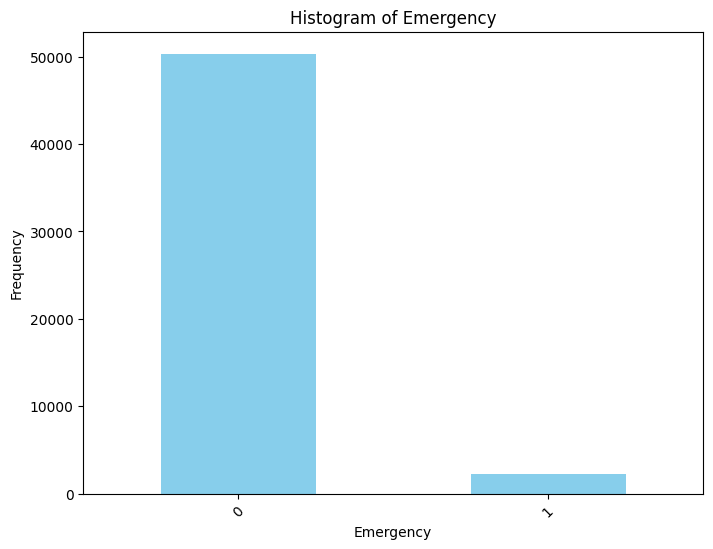

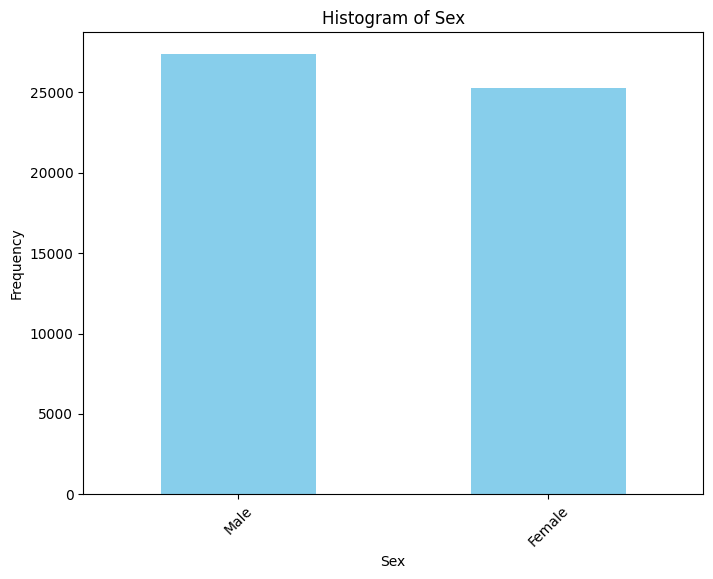

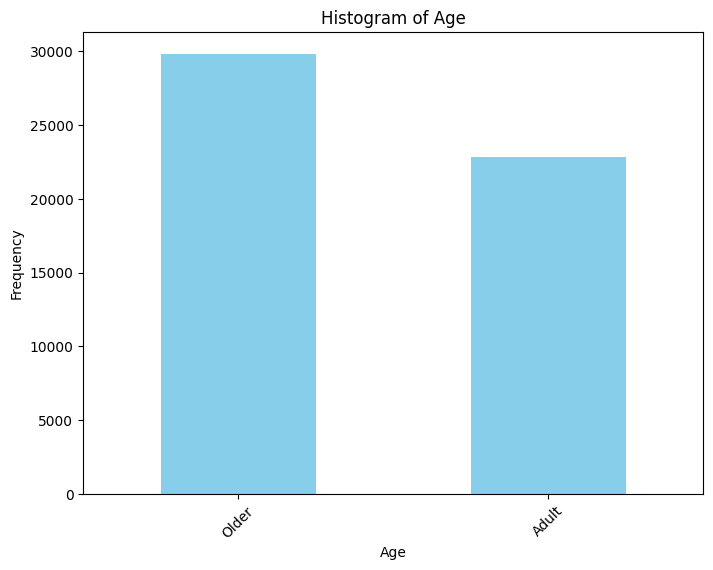

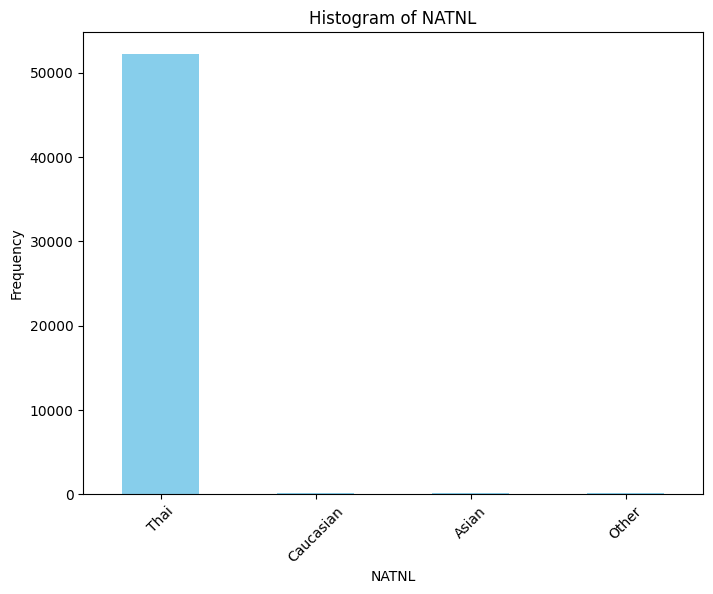

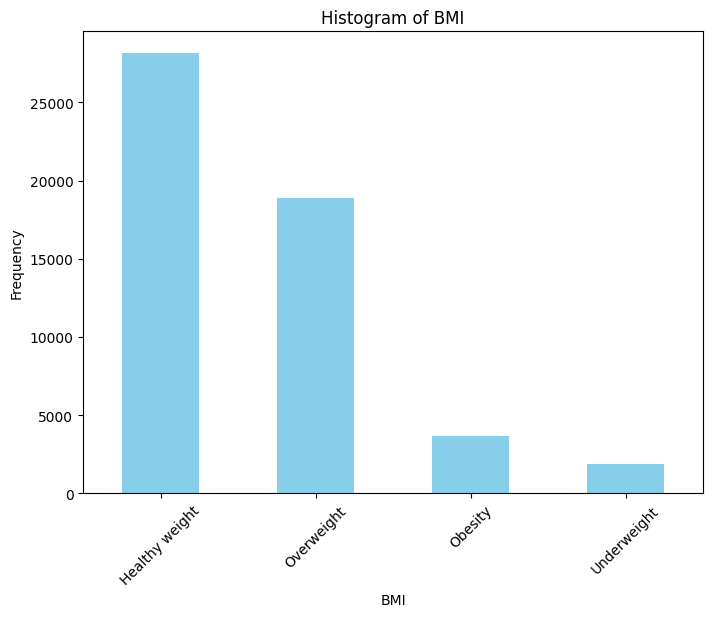

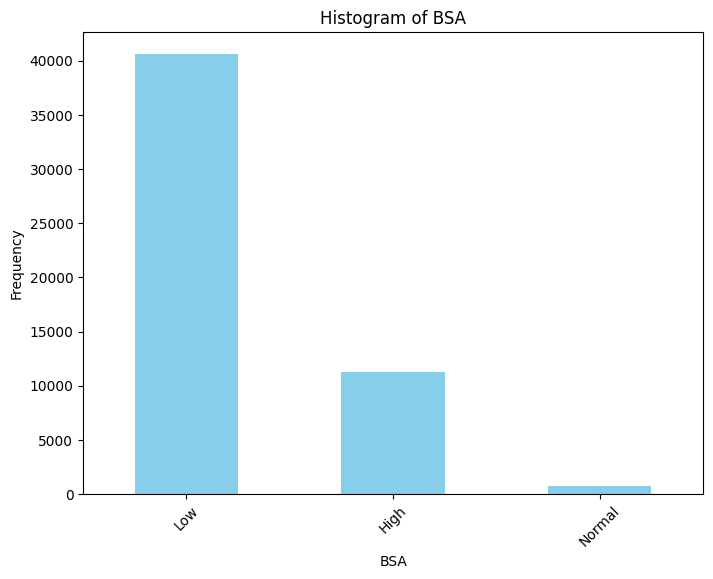

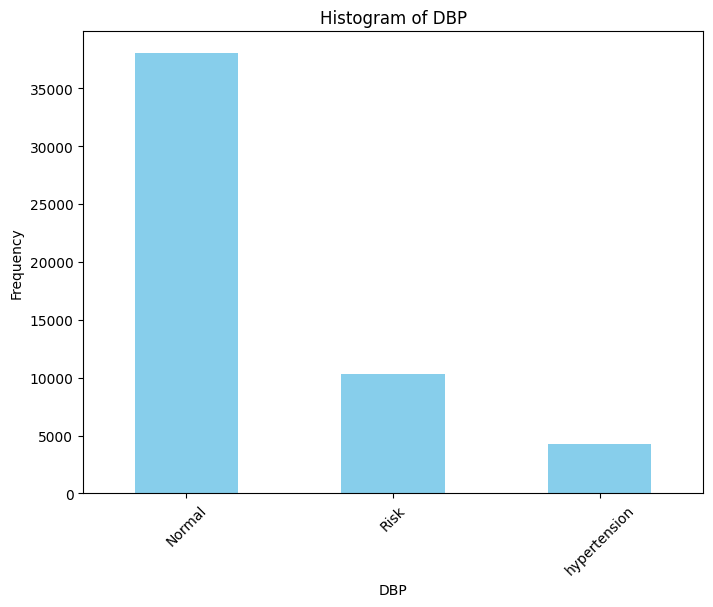

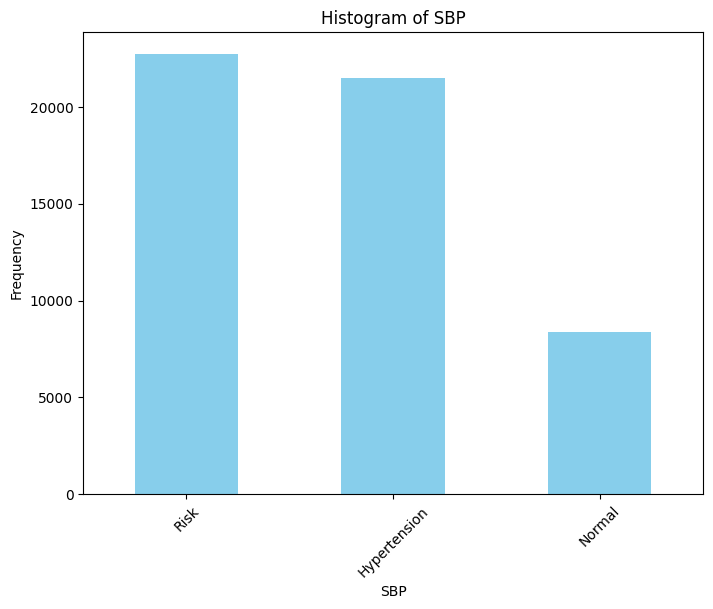

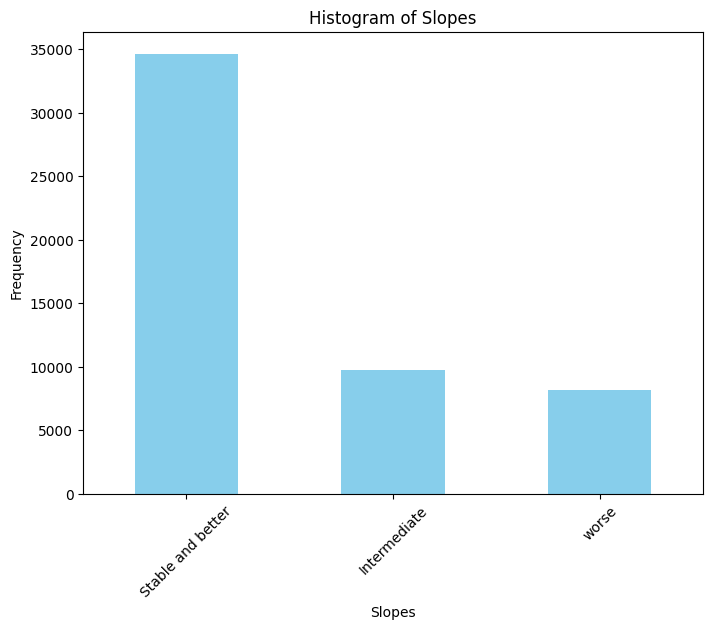

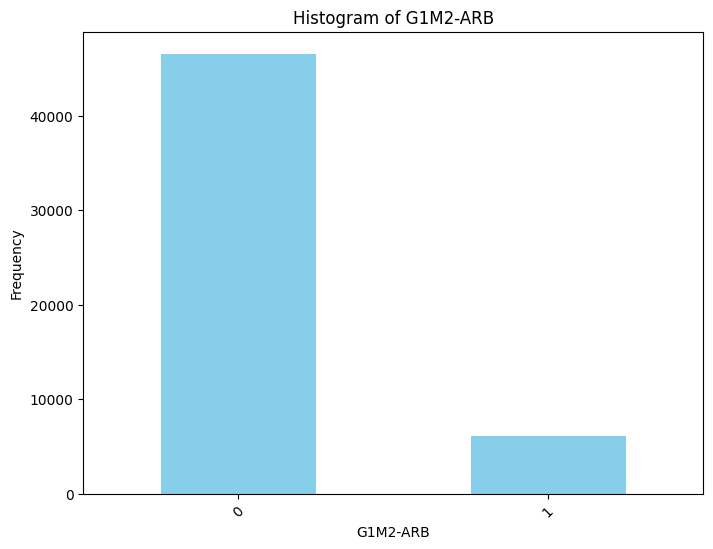

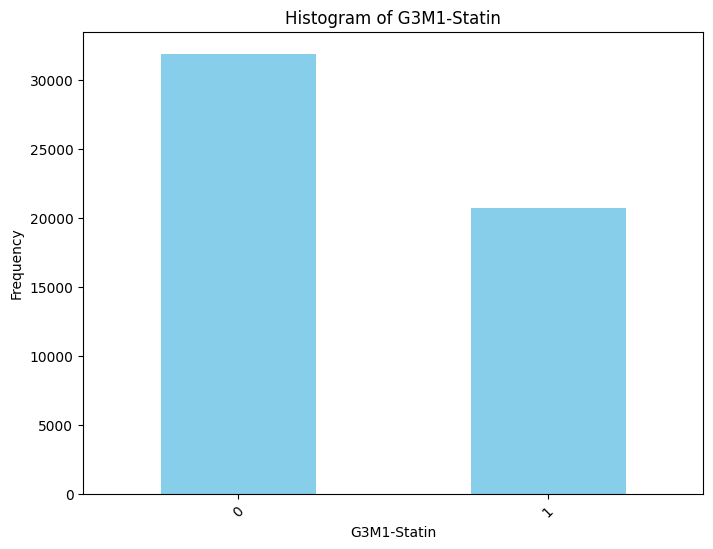

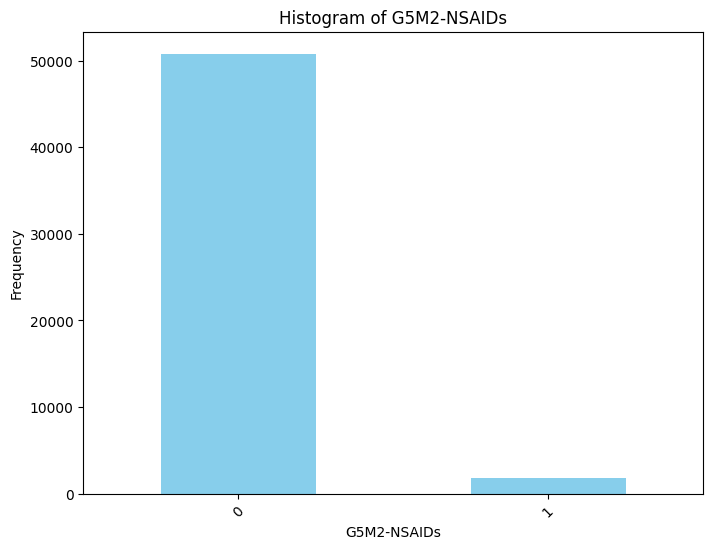

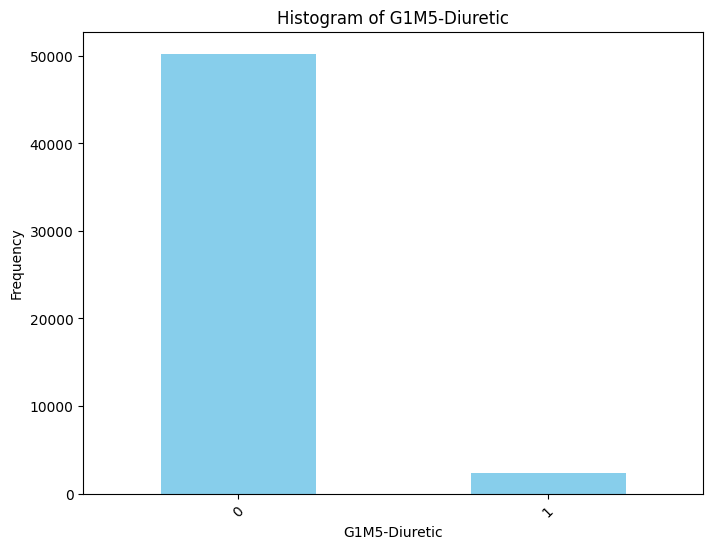

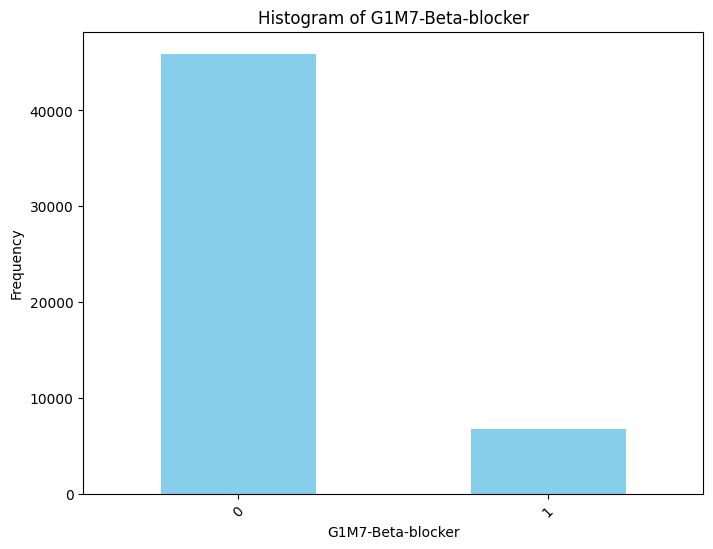

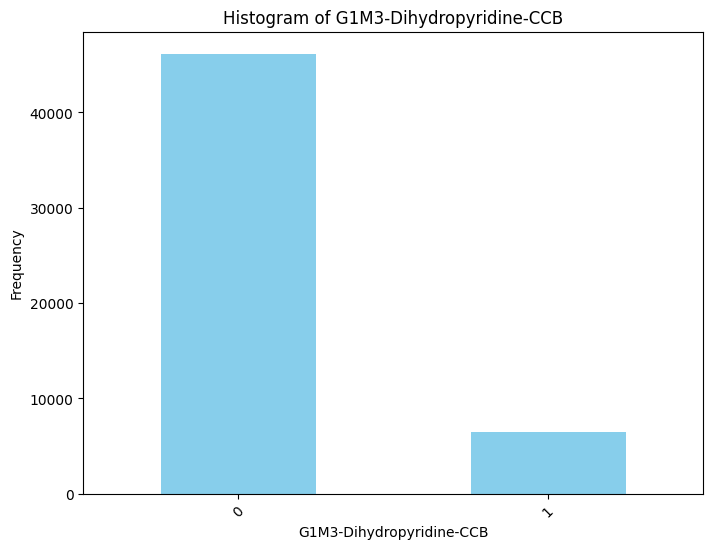

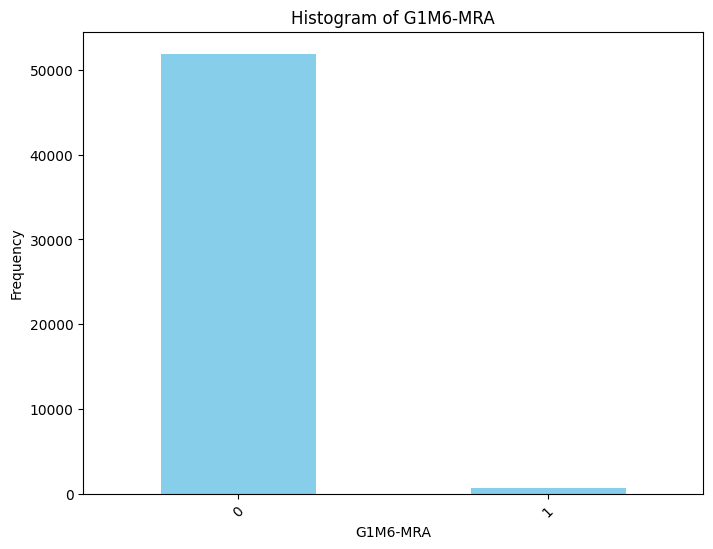

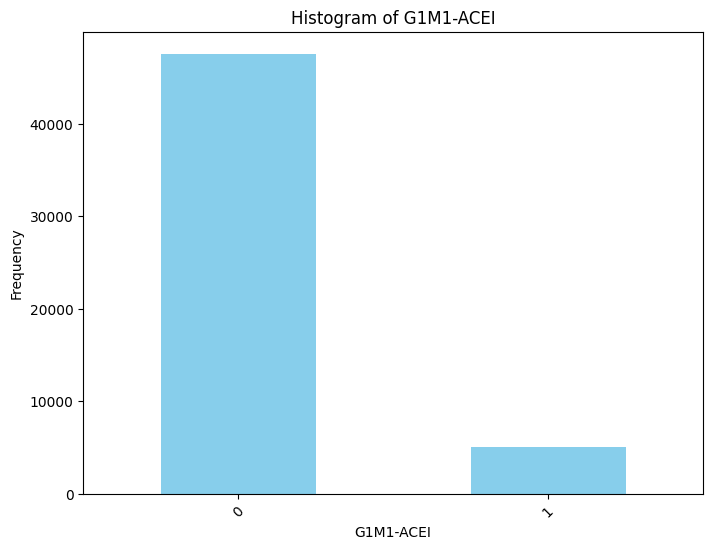

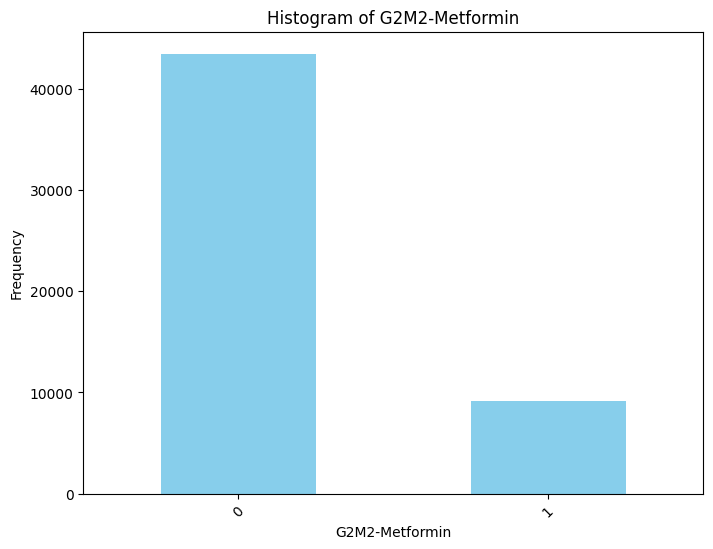

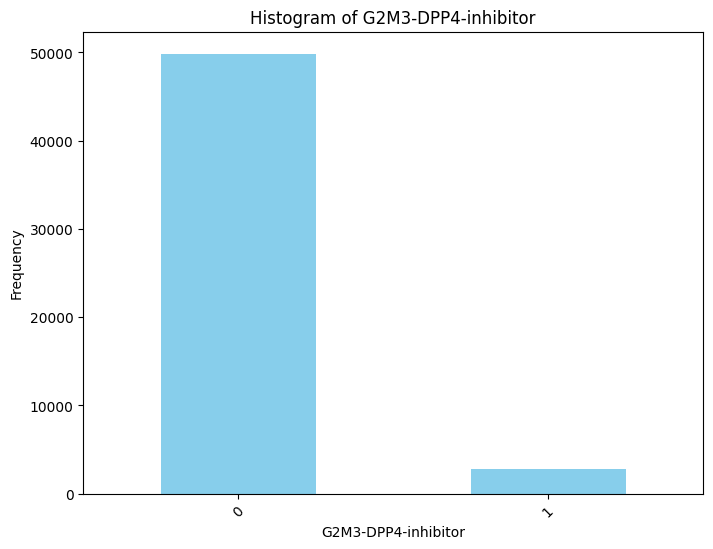

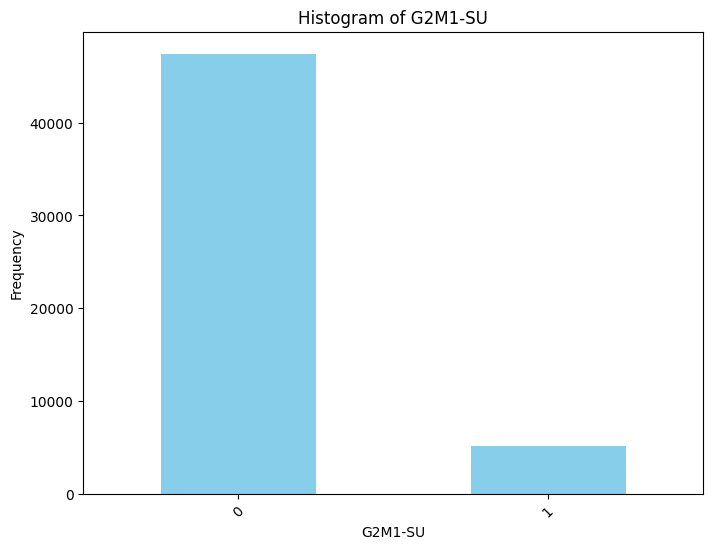

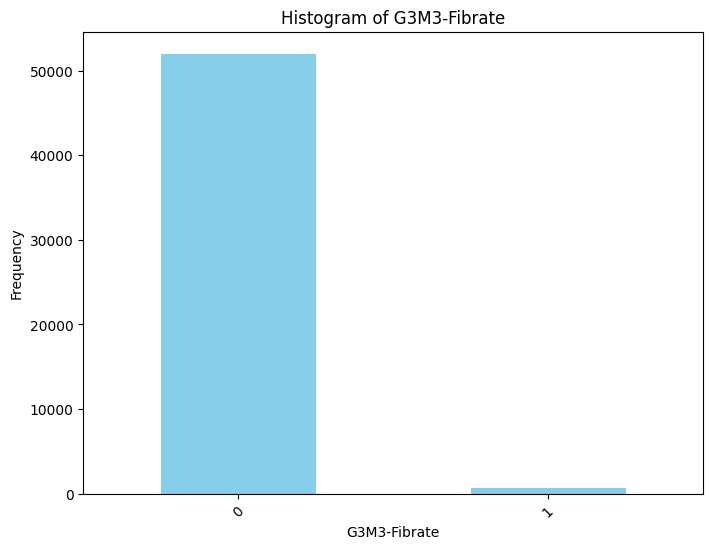

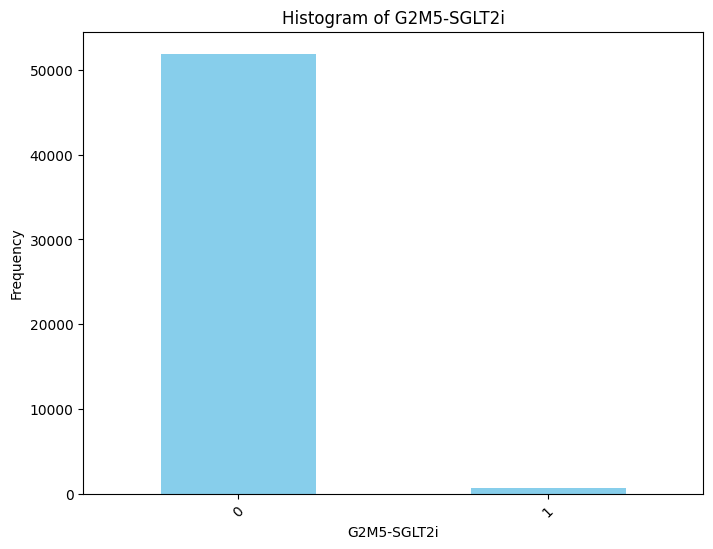

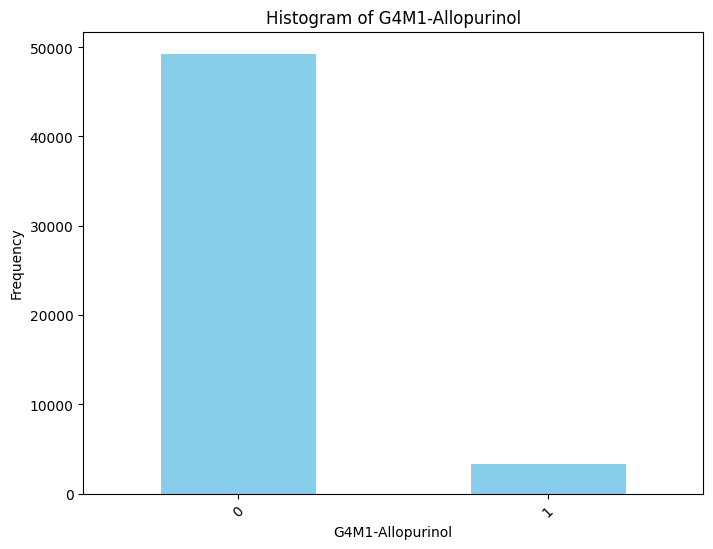

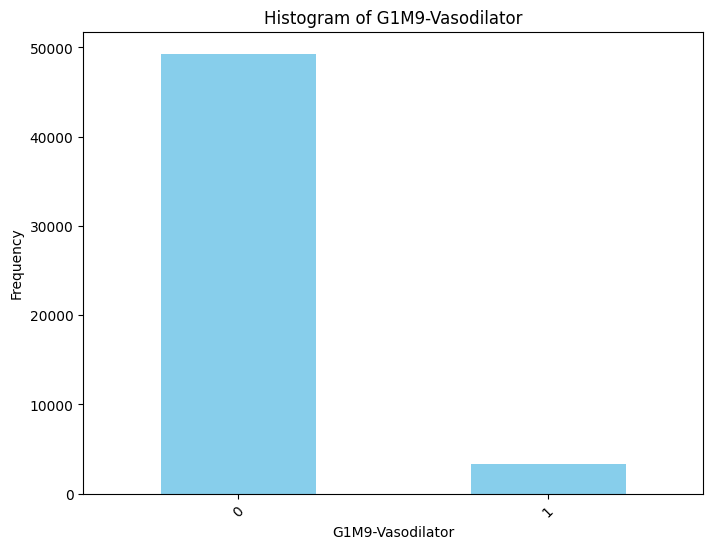

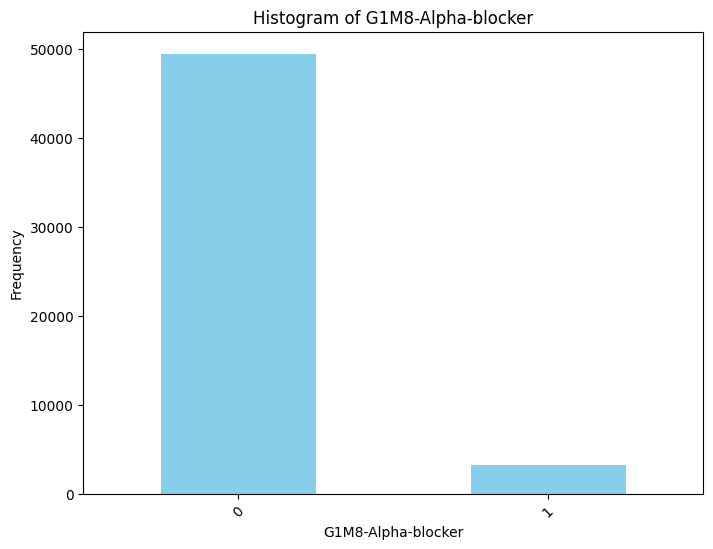

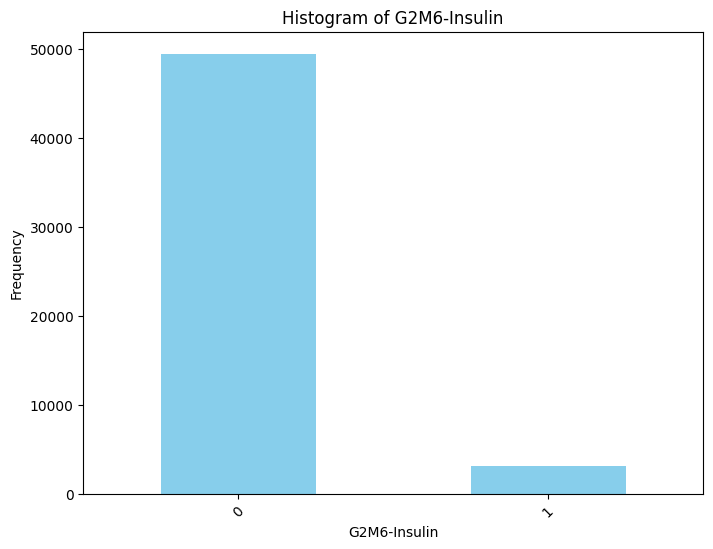

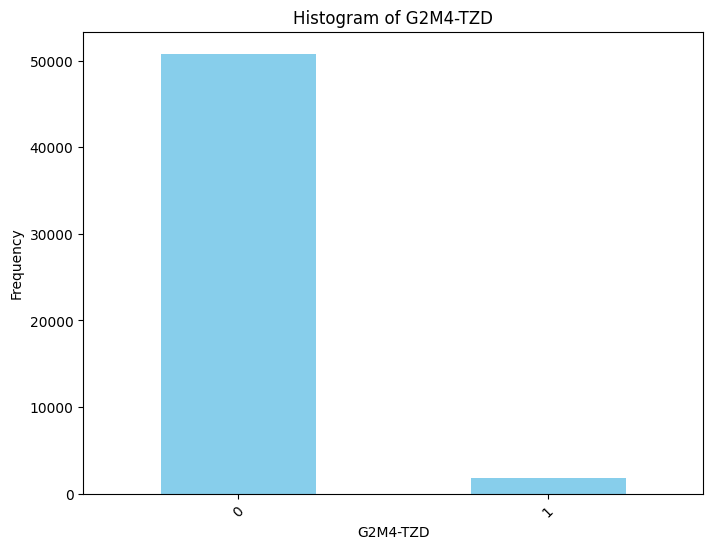

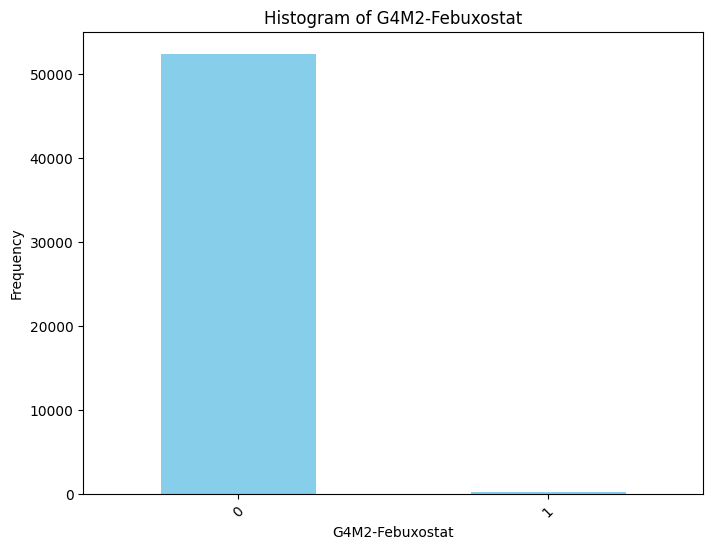

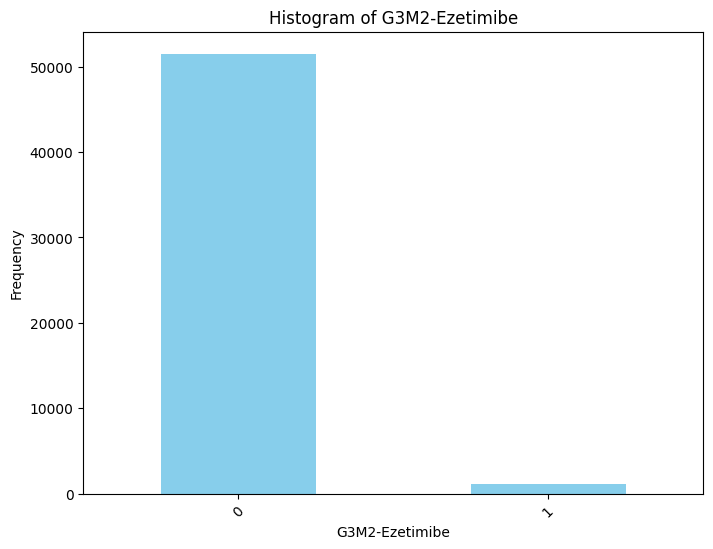

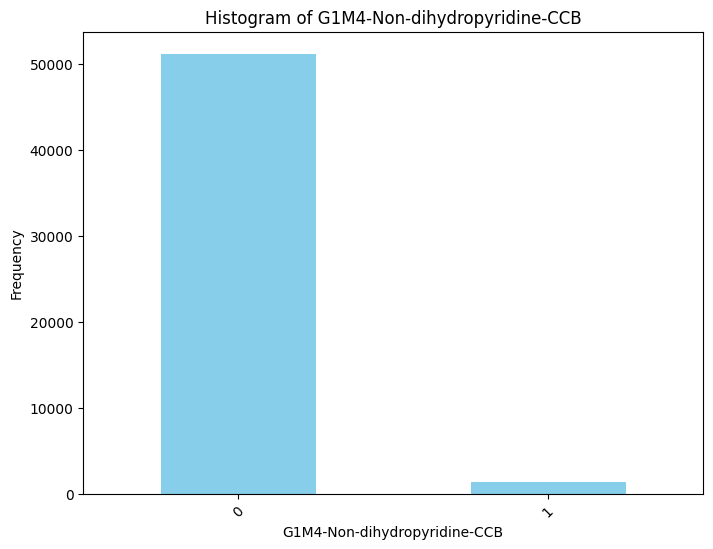

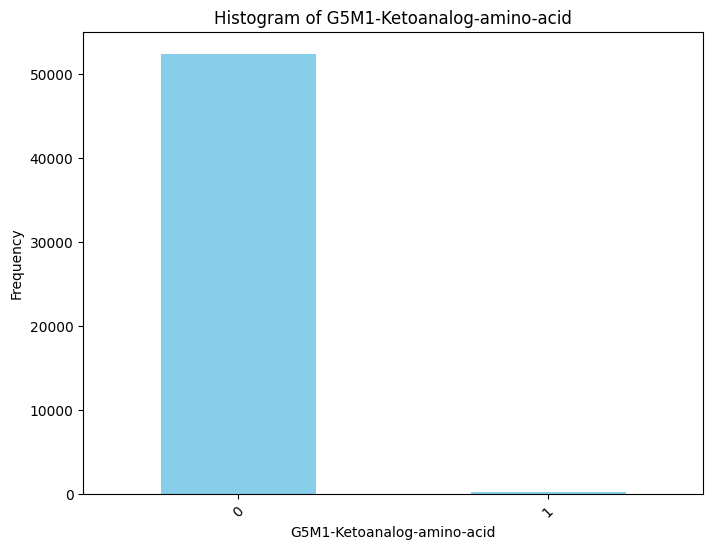

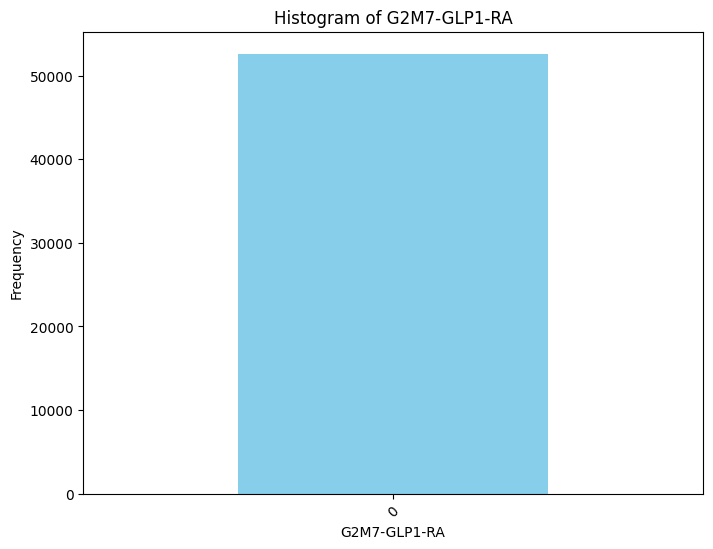

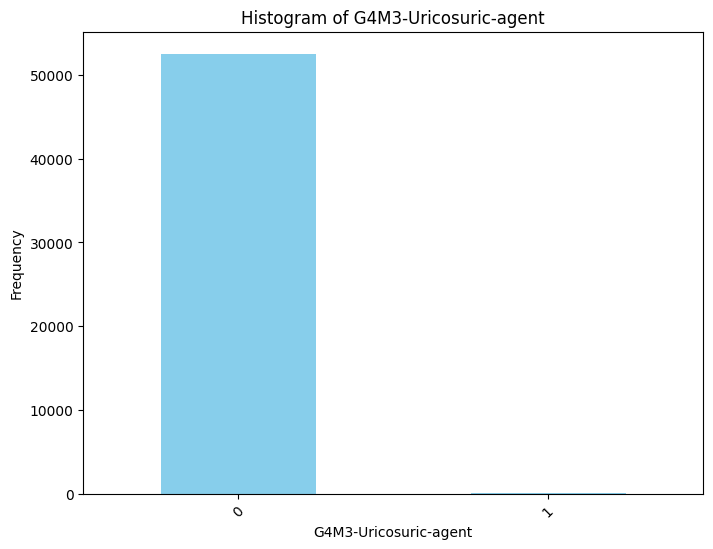

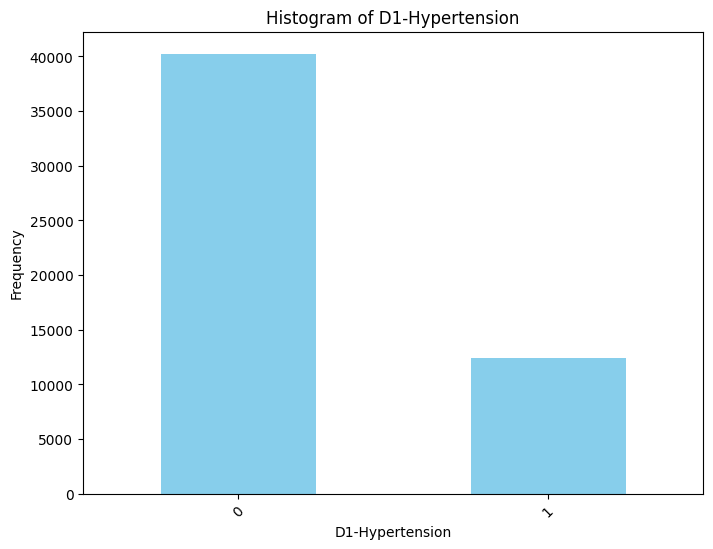

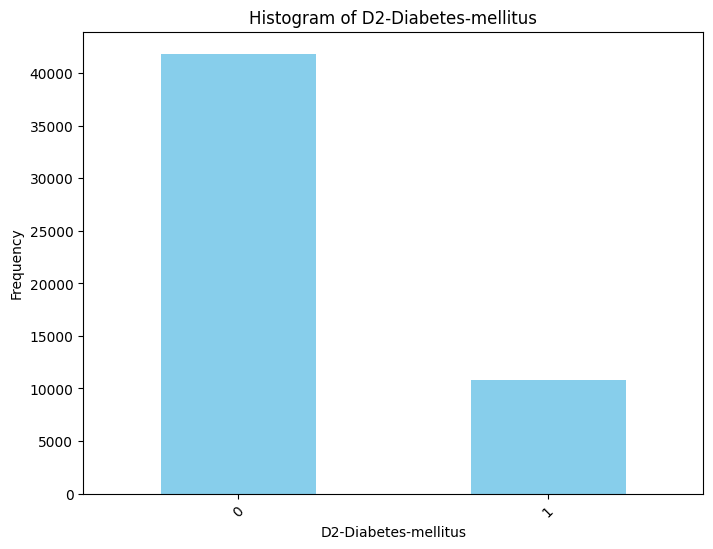

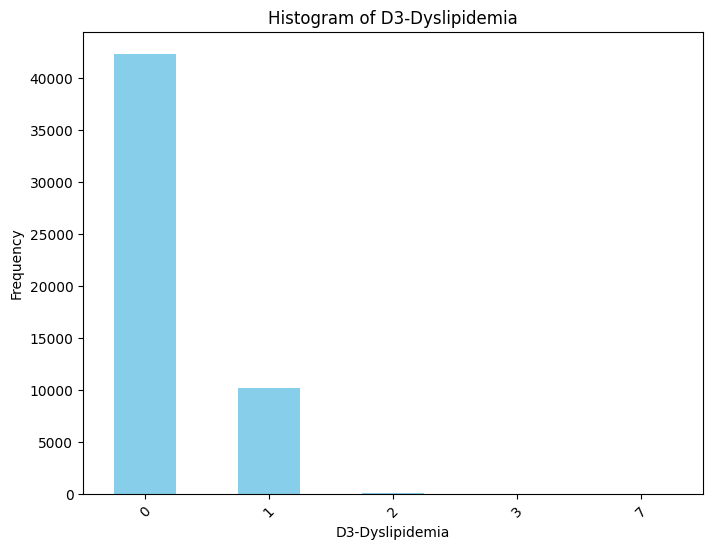

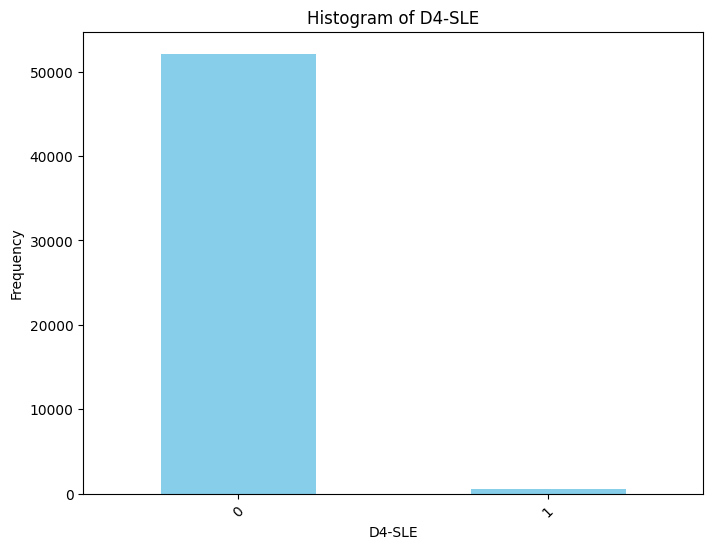

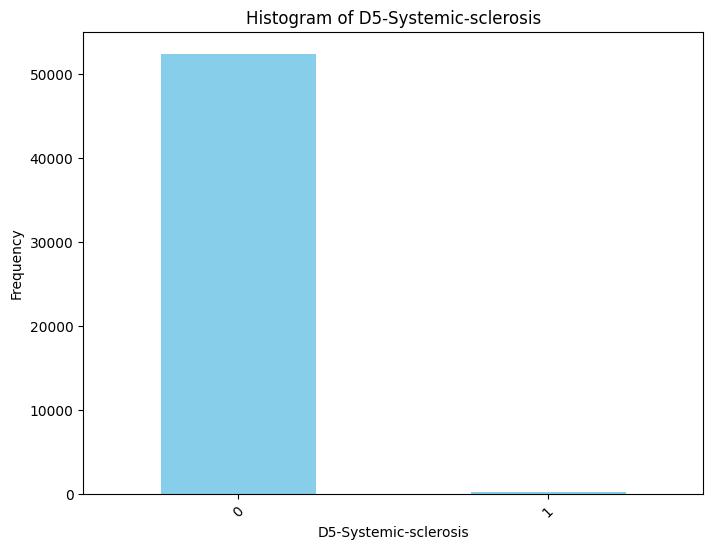

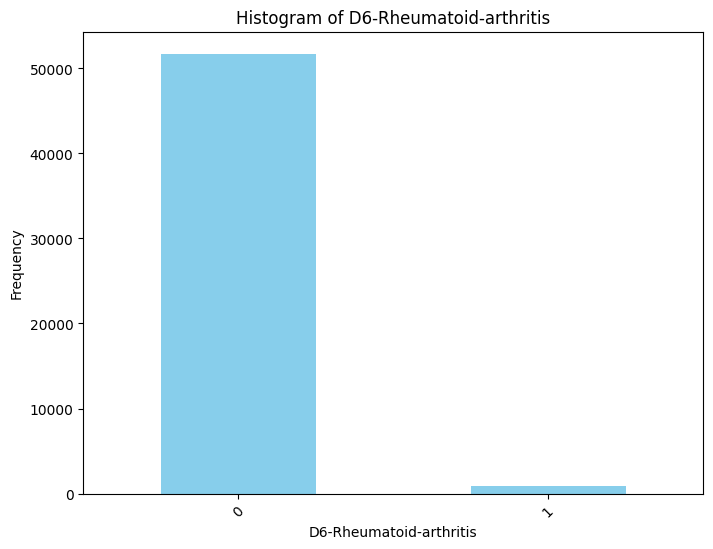

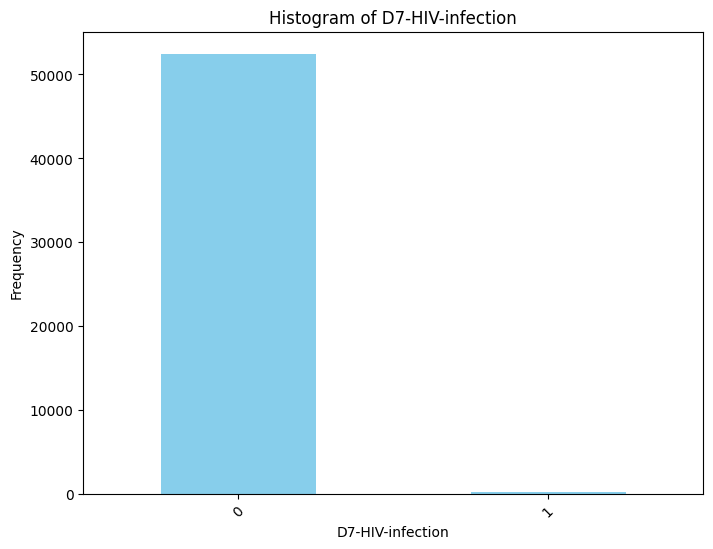

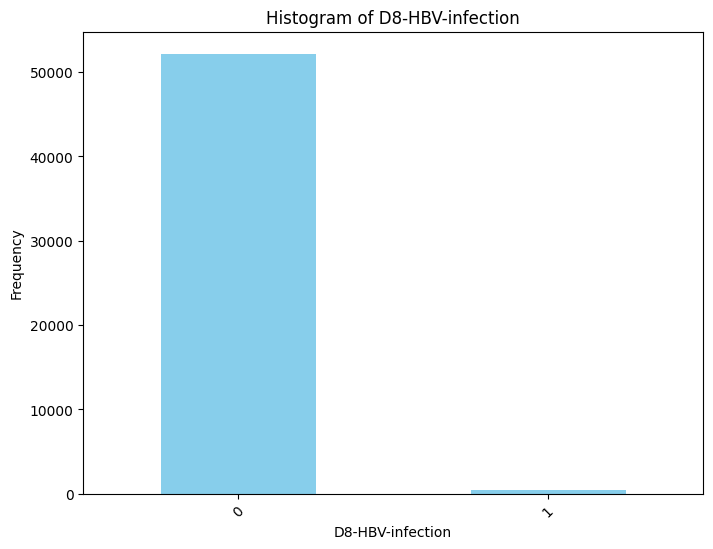

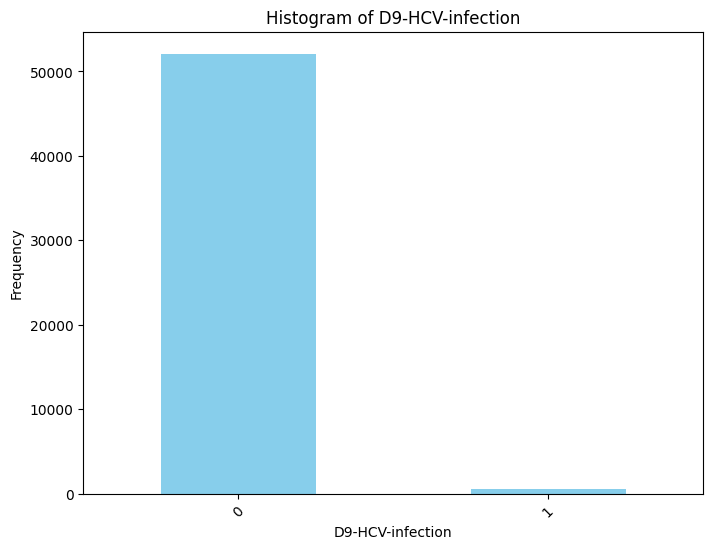

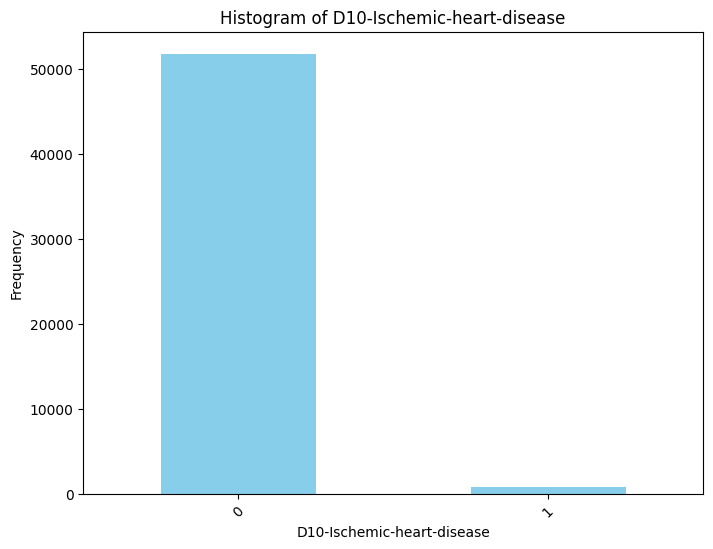

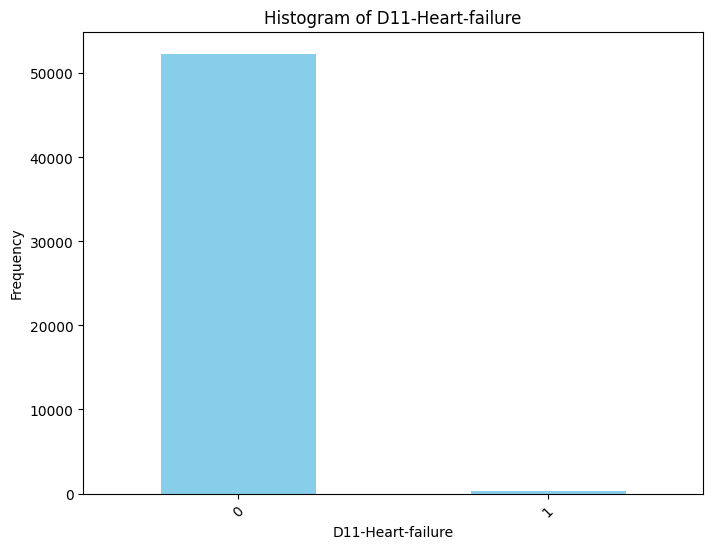

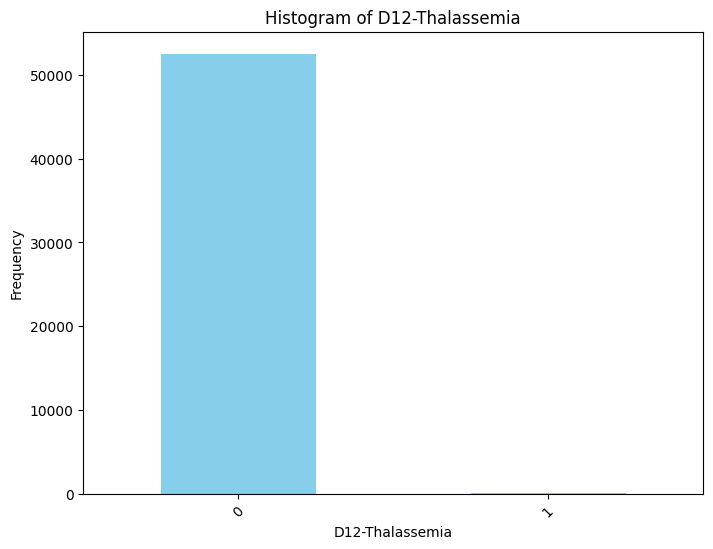

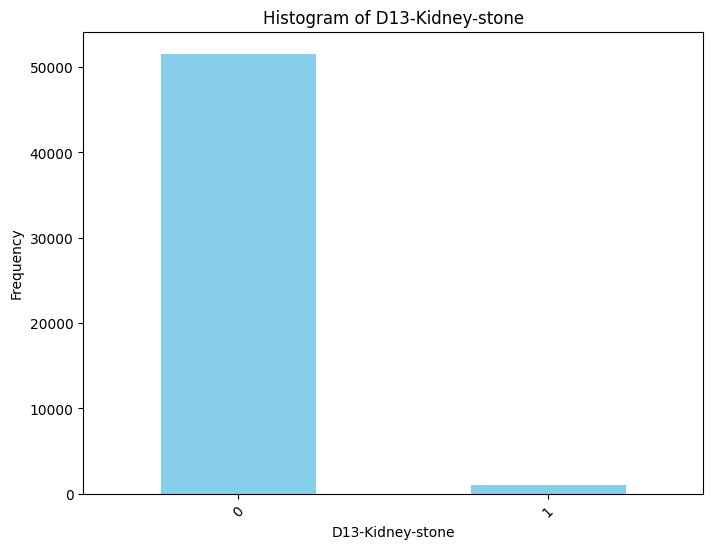

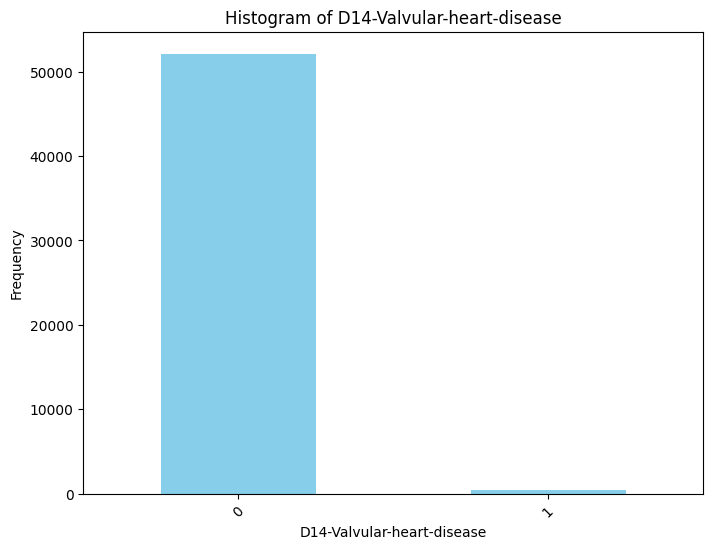

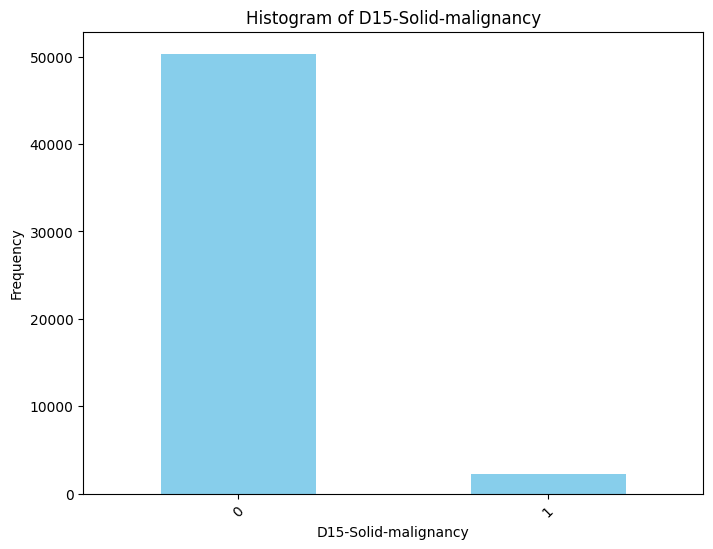

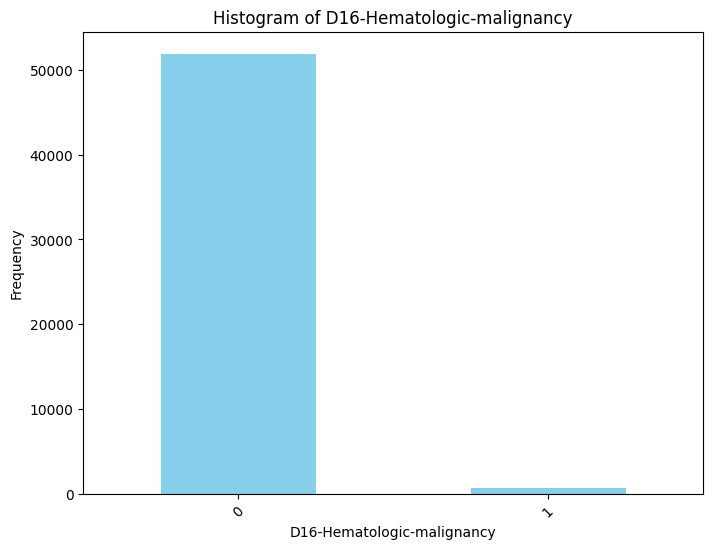

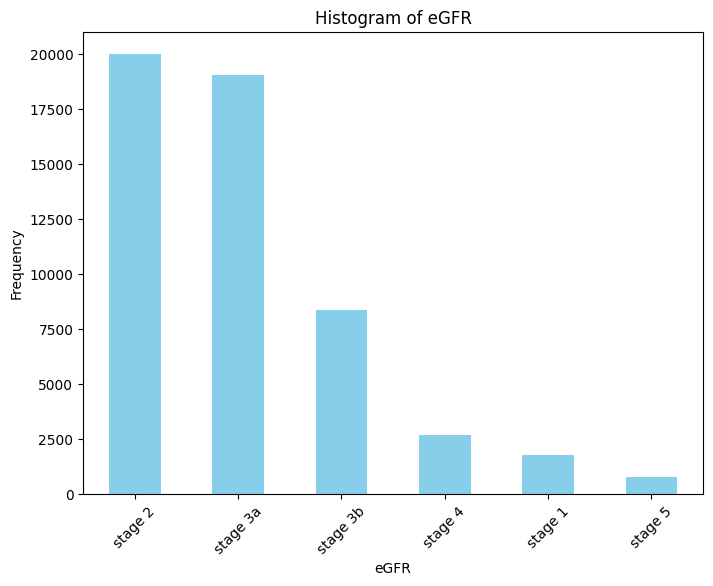

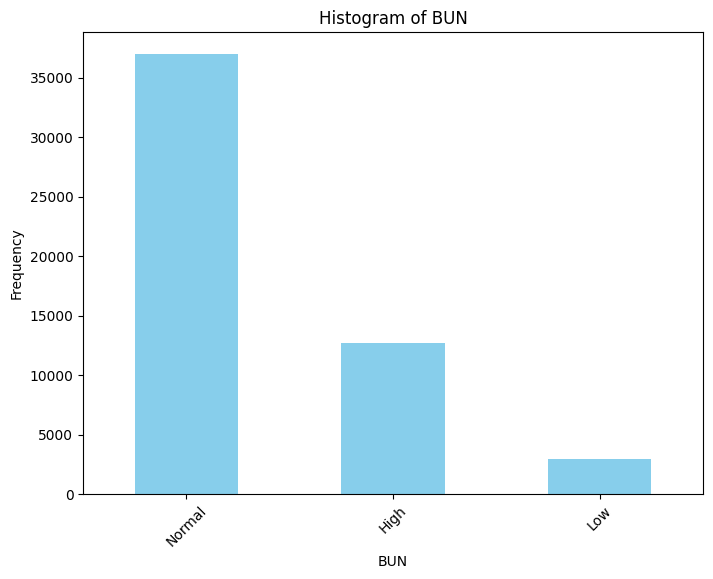

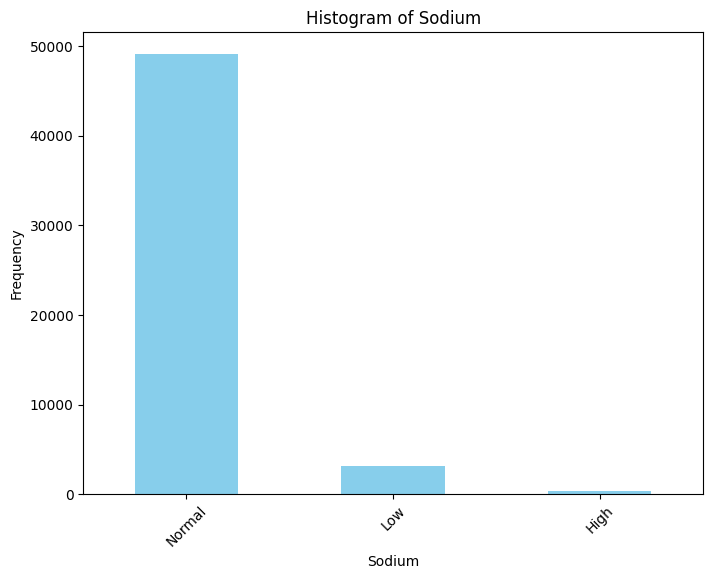

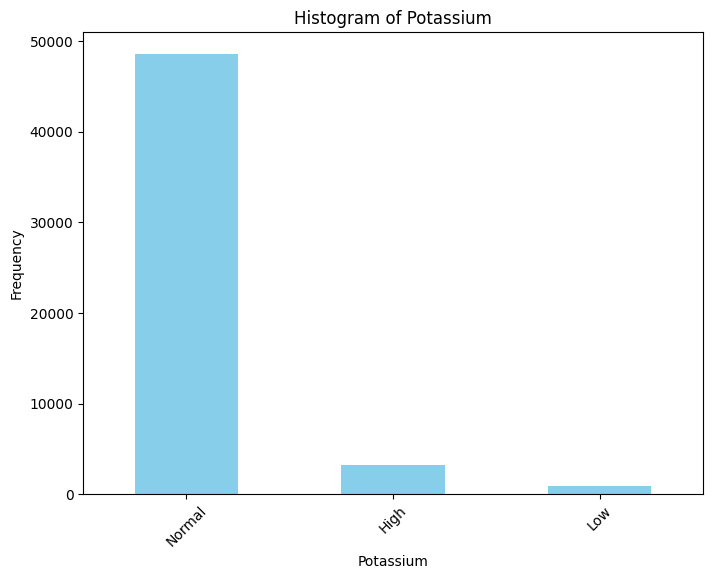

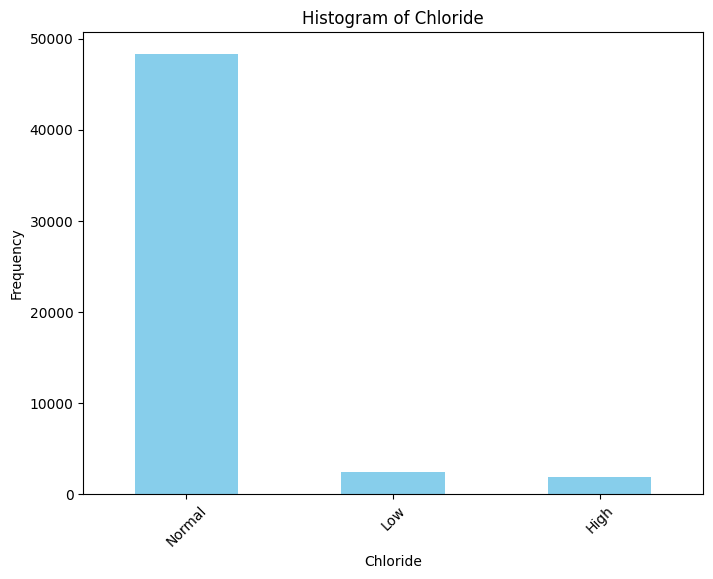

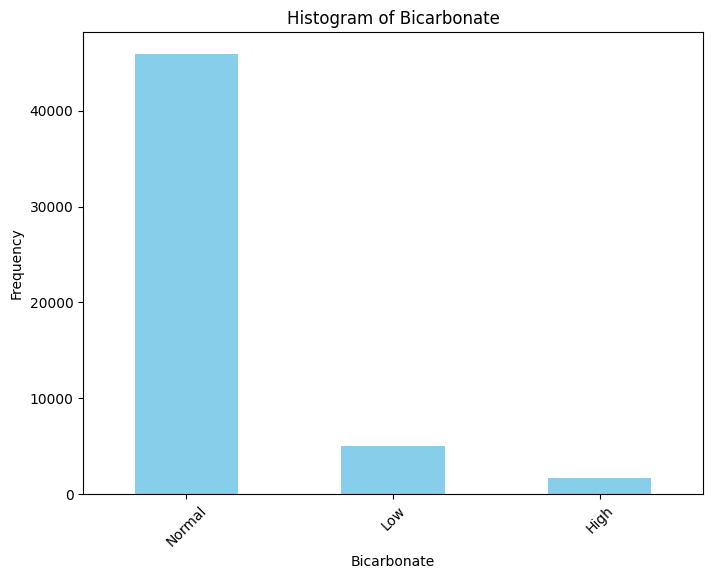

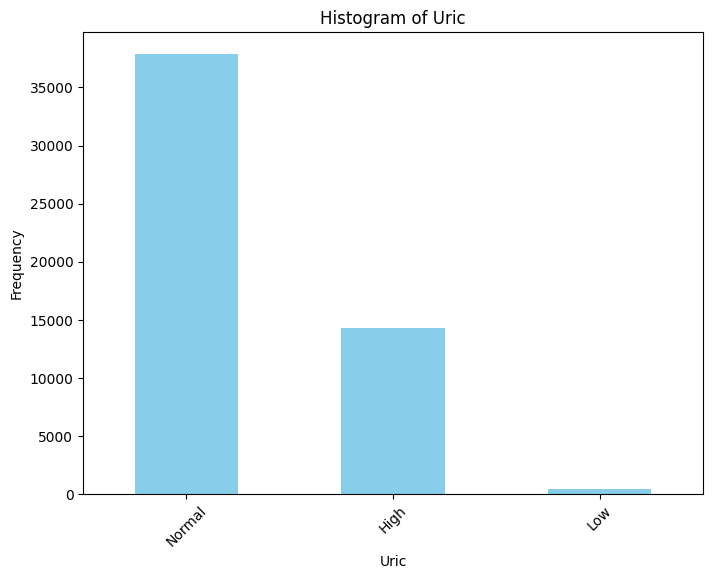

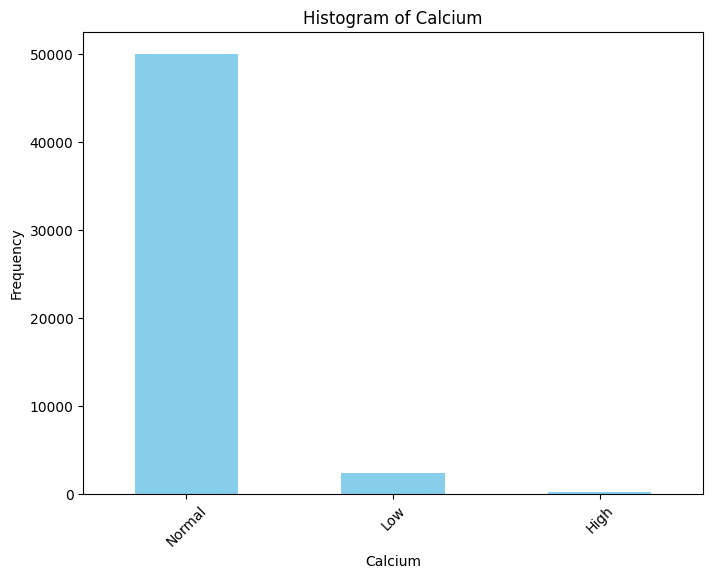

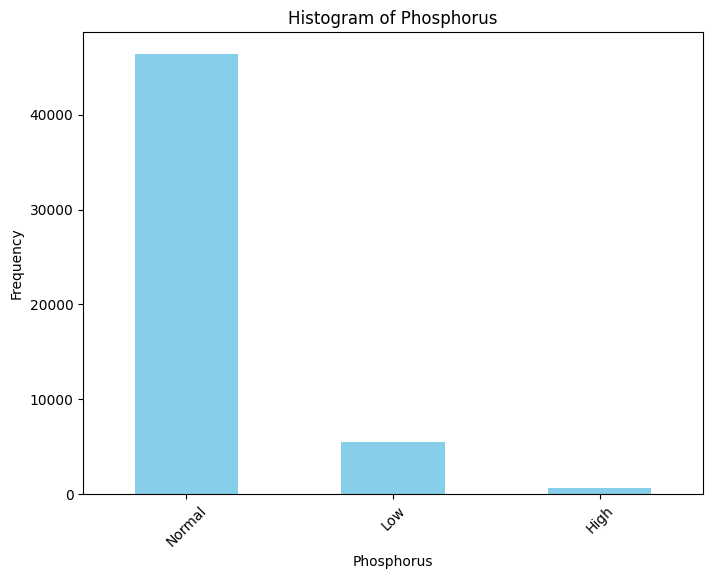

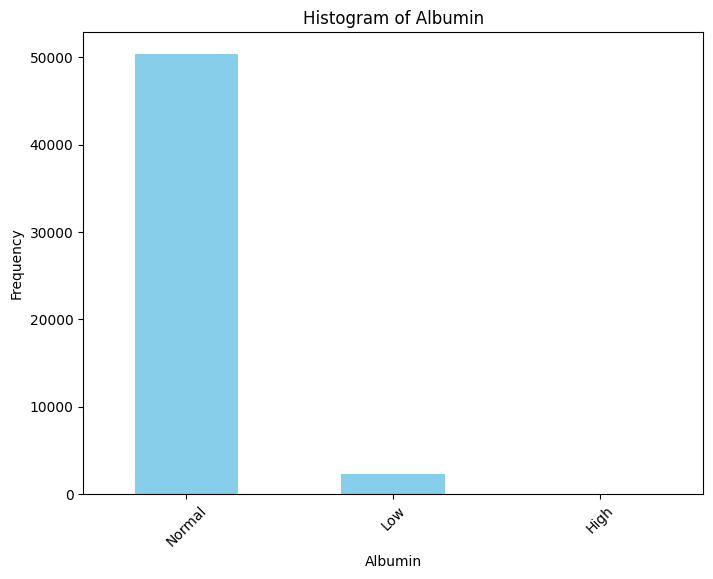

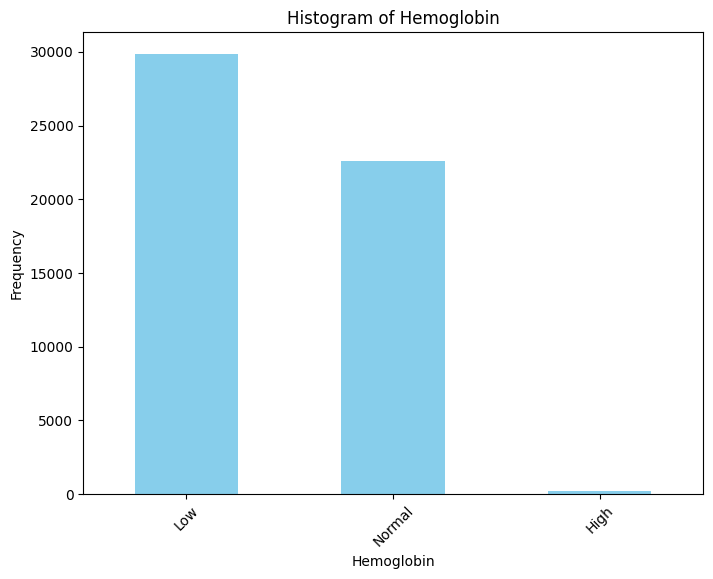

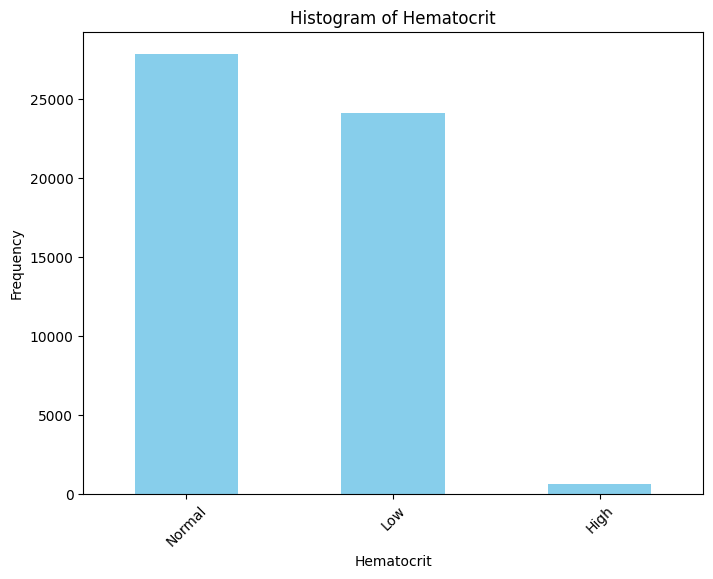

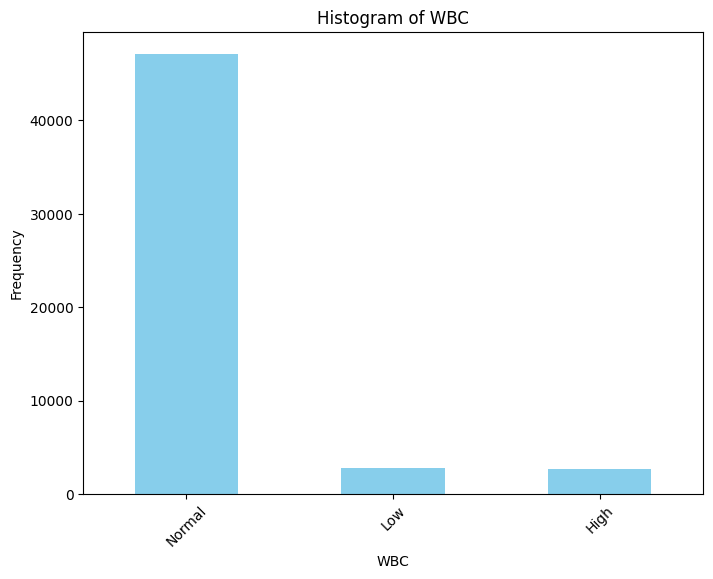

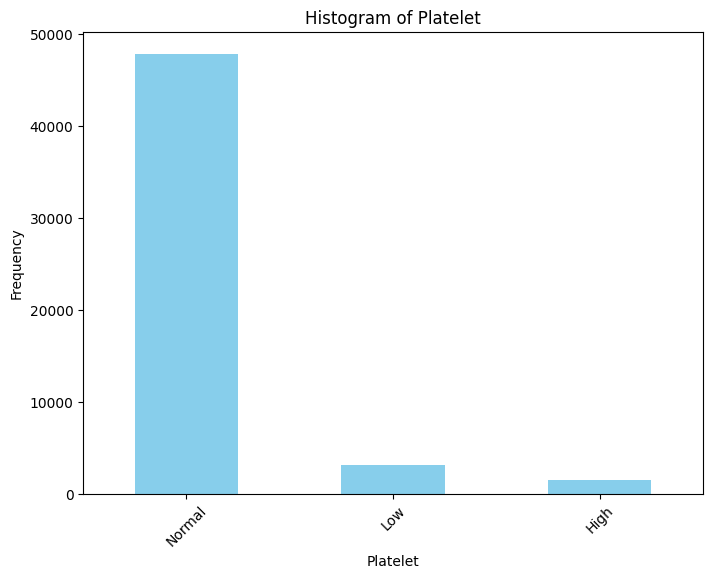

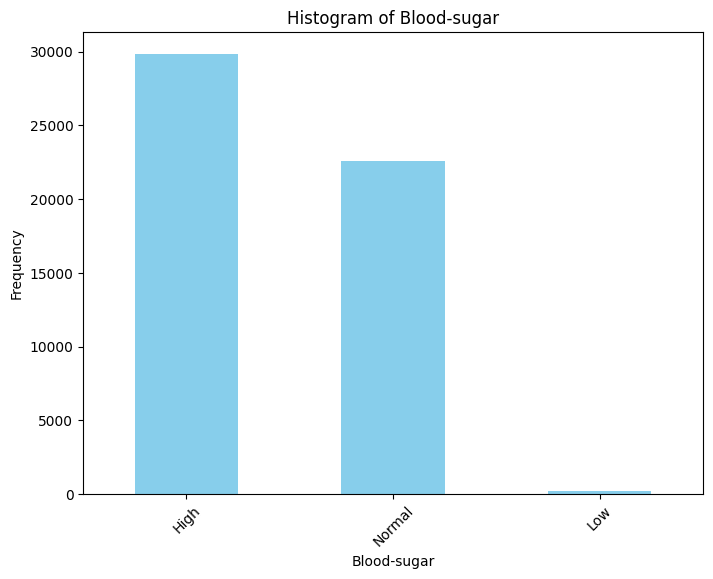

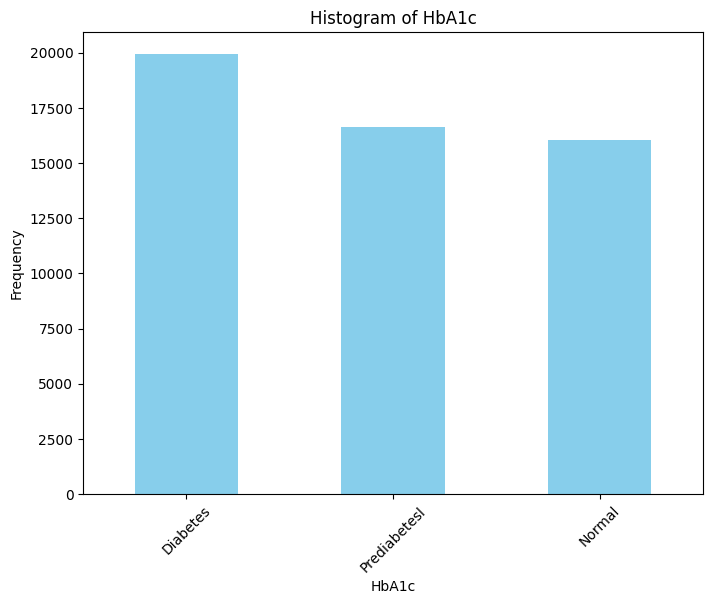

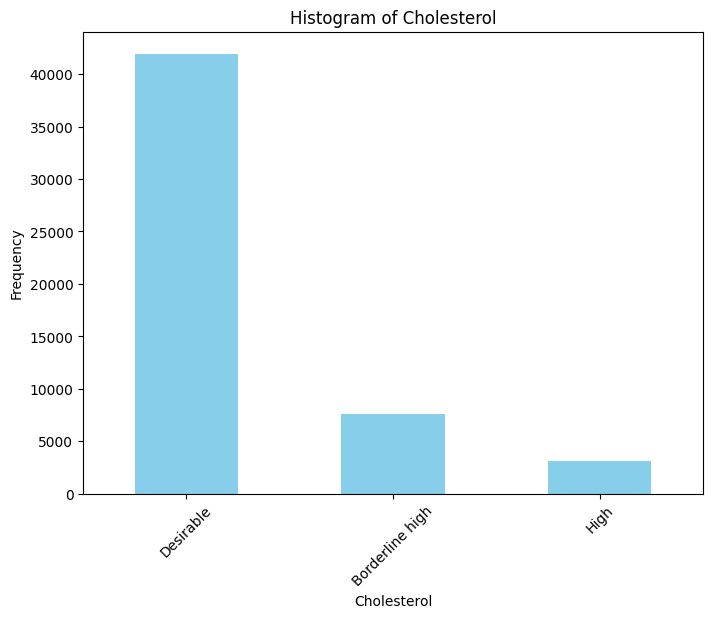

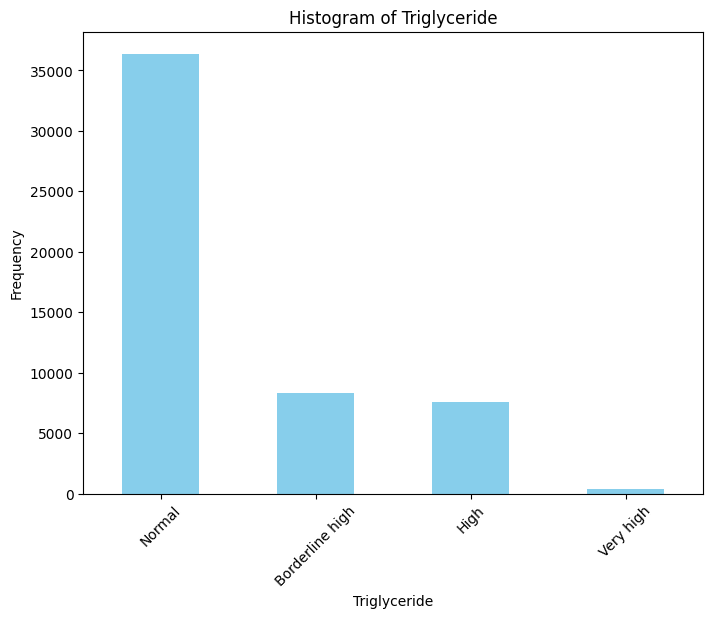

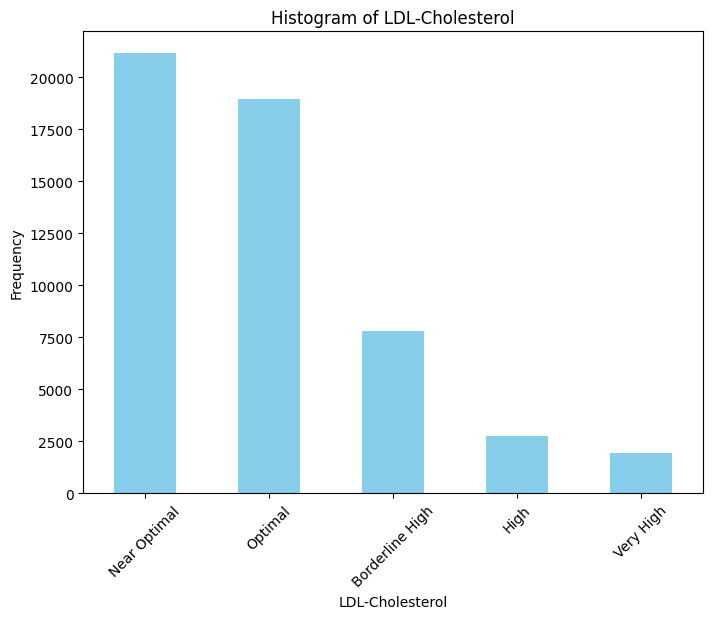

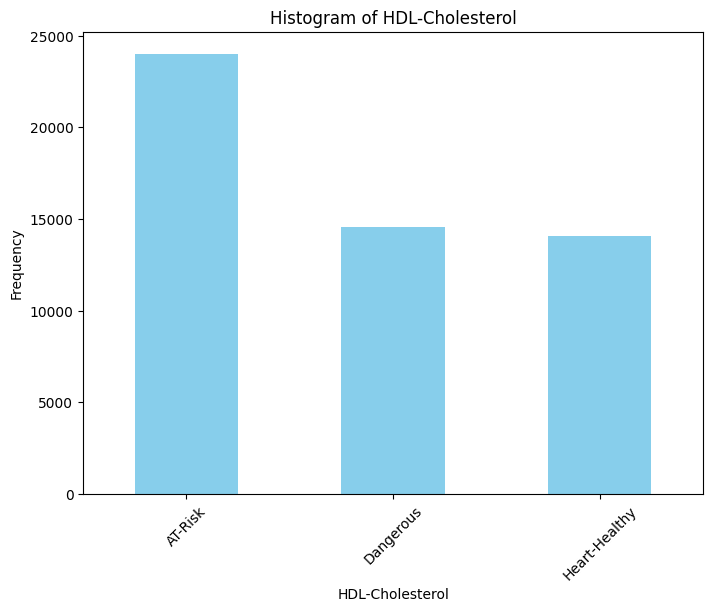

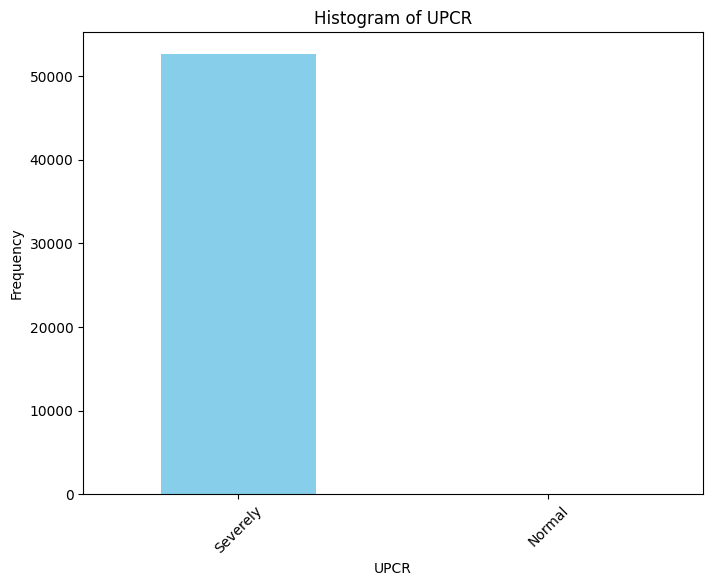

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
# สร้าง histograms ของแต่ละคอลัมน์ที่มีข้อมูลชนิด object หรือ category
object_category_columns = data.select_dtypes(include=['object', 'category','int64']).columns

for column in object_category_columns:
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

### Analysis

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [67]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InPatient  OutPatient  Emergency     Sex    Age NATNL             BMI  BSA  \
0          0           1          0  Female  Older  Thai  Healthy weight  Low   
1          0           1          0  Female  Older  Thai  Healthy weight  Low   
2          0           1          0  Female  Older  Thai  Healthy weight  Low   
3          0           1          0  Female  Older  Thai  Healthy weight  Low   
4          0           1          0  Female  Older  Thai  Healthy weight  Low   

      DBP     SBP  ... Hematocrit     WBC  Platelet  Blood-sugar  \
0  Normal    Risk  ...     Normal  Normal    Normal       Normal   
1  Normal  Normal  ...     Normal  Normal    Normal       Normal   
2  Normal    Risk  ...        Low  Normal    Normal       Normal   
3  Normal    Risk  ...     Normal     Low    Normal       Normal   
4  Normal  Normal  ...        Low  Normal      High       Normal   

          HbA1c      Cholesterol  Triglyceride  LDL-Cholesterol  \
0        Normal  Borderline high        Normal     Near Optimal   
1  Prediabetesl  Borderline high        Normal  Borderline High   
2        Normal        Desirable        Normal     Near Optimal   
3        Normal  Borderline high        Normal  Borderline High   
4        Normal        Desirable        Normal     Near Optimal   

   HDL-Cholesterol      UPCR  
0    Heart-Healthy  Severely  
1    Heart-Healthy  Severely  
2    Heart-Healthy  Severely  
3    Heart-Healthy  Severely  
4    Heart-Healthy  Severely  

[5 rows x 72 columns]

In [68]:
# เลือกคอลัมน์ที่มีชนิดข้อมูลเป็น string object
string_columns = data.select_dtypes(include='object').columns.tolist()

# แสดงรายชื่อคอลัมน์ที่เป็น string object
print(string_columns)

['Sex', 'NATNL', 'BMI', 'BSA', 'Slopes', 'eGFR', 'BUN', 'Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin', 'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c', 'Cholesterol', 'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Reduce memory usage by changing data types of columns (if applicable)
# For example, converting categorical columns to a more memory-efficient type like 'category'
# Assuming 'data' is your DataFrame, replace column names with your actual categorical columns
categorical_columns = ['Age', 'DBP', 'SBP','Slopes', 'Sex', 'NATNL', 'BMI',
                       'BSA', 'eGFR', 'BUN', 'Sodium', 'Potassium', 'Chloride',
                       'Bicarbonate', 'Uric', 'Calcium', 'Phosphorus', 'Albumin', 'Hemoglobin',
                       'Hematocrit', 'WBC', 'Platelet', 'Blood-sugar', 'HbA1c', 'Cholesterol',
                       'Triglyceride', 'LDL-Cholesterol', 'HDL-Cholesterol', 'UPCR']  # Replace with your categorical column names
data[categorical_columns] = data[categorical_columns].astype('category')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-69-b6663f160b38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_columns] = data[categorical_columns].astype('category')


In [70]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

# One-hot encode categorical columns
association = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Apriori min support
min_support = 0.2

# Max length of apriori n-grams
max_len = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
association.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InPatient  OutPatient  Emergency  G1M2-ARB  G3M1-Statin  G5M2-NSAIDs  \
0          0           1          0         1            0            0   
1          0           1          0         1            1            0   
2          0           1          0         1            1            1   
3          0           1          0         1            0            1   
4          0           1          0         1            0            1   

   G1M5-Diuretic  G1M7-Beta-blocker  G1M3-Dihydropyridine-CCB  G1M6-MRA  \
0              0                  0                         0         0   
1              0                  0                         0         0   
2              0                  0                         0         0   
3              1                  0                         0         0   
4              0                  0                         0         0   

   G1M1-ACEI  G2M2-Metformin  G2M3-DPP4-inhibitor  G2M1-SU  G3M3-Fibrate  \
0          0               0                    0        0             0   
1          0               0                    0        0             0   
2          0               0                    0        0             0   
3          0               0                    0        0             0   
4          0               0                    0        0             0   

   G2M5-SGLT2i  G4M1-Allopurinol  G1M9-Vasodilator  G1M8-Alpha-blocker  \
0            0                 0                 0                   0   
1            0                 0                 0                   0   
2            0                 0                 0                   0   
3            0                 0                 0                   0   
4            0                 0                 0                   0   

   G2M6-Insulin  G2M4-TZD  G4M2-Febuxostat  G3M2-Ezetimibe  \
0             0         0                0               0   
1             0         0                0               0   
2             0         0                0               0   
3             0         0                0               0   
4             0         0                0               0   

   G1M4-Non-dihydropyridine-CCB  G5M1-Ketoanalog-amino-acid  G2M7-GLP1-RA  \
0                             0                           0             0   
1                             0                           0             0   
2                             0                           0             0   
3                             0                           0             0   
4                             0                           0             0   

   G4M3-Uricosuric-agent  D1-Hypertension  D2-Diabetes-mellitus  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                1                     1   

   D3-Dyslipidemia  D4-SLE  D5-Systemic-sclerosis  D6-Rheumatoid-arthritis  \
0                0       0                      0                        0   
1                1       0                      0                        0   
2                1       0                      0                        0   
3                1       0                      0                        0   
4                1       0                      0                        0   

   D7-HIV-infection  D8-HBV-infection  D9-HCV-infection  \
0                 0                 0                 0   
1                 0                 0                 0   
2                 0                 0                 0   
3                 0                 0                 0   
4                 0                 0                 0   

   D10-Ischemic-heart-disease  D11-Heart-failure  D12-Thalassemia  \
0                           0                  0                0  

In [72]:
association.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(52620, 106)

In [ ]:
#association.to_csv('association_all.csv')

In [73]:
asso = association.astype(bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
asso.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InPatient  OutPatient  Emergency  G1M2-ARB  G3M1-Statin  G5M2-NSAIDs  \
0      False        True      False      True        False        False   
1      False        True      False      True         True        False   
2      False        True      False      True         True         True   
3      False        True      False      True        False         True   
4      False        True      False      True        False         True   

   G1M5-Diuretic  G1M7-Beta-blocker  G1M3-Dihydropyridine-CCB  G1M6-MRA  \
0          False              False                     False     False   
1          False              False                     False     False   
2          False              False                     False     False   
3           True              False                     False     False   
4          False              False                     False     False   

   G1M1-ACEI  G2M2-Metformin  G2M3-DPP4-inhibitor  G2M1-SU  G3M3-Fibrate  \
0      False           False                False    False         False   
1      False           False                False    False         False   
2      False           False                False    False         False   
3      False           False                False    False         False   
4      False           False                False    False         False   

   G2M5-SGLT2i  G4M1-Allopurinol  G1M9-Vasodilator  G1M8-Alpha-blocker  \
0        False             False             False               False   
1        False             False             False               False   
2        False             False             False               False   
3        False             False             False               False   
4        False             False             False               False   

   G2M6-Insulin  G2M4-TZD  G4M2-Febuxostat  G3M2-Ezetimibe  \
0         False     False            False           False   
1         False     False            False           False   
2         False     False            False           False   
3         False     False            False           False   
4         False     False            False           False   

   G1M4-Non-dihydropyridine-CCB  G5M1-Ketoanalog-amino-acid  G2M7-GLP1-RA  \
0                         False                       False         False   
1                         False                       False         False   
2                         False                       False         False   
3                         False                       False         False   
4                         False                       False         False   

   G4M3-Uricosuric-agent  D1-Hypertension  D2-Diabetes-mellitus  \
0                  False            False                  True   
1                  False            False                  True   
2                  False            False                  True   
3                  False            False                  True   
4                  False             True                  True   

   D3-Dyslipidemia  D4-SLE  D5-Systemic-sclerosis  D6-Rheumatoid-arthritis  \
0            False   False                  False                    False   
1             True   False                  False                    False   
2             True   False                  False                    False   
3             True   False                  False                    False   
4             True   False                  False                    False   

   D7-HIV-infection  D8-HBV-infection  D9-HCV-infection  \
0             False             False             False   
1             False             False             False   
2             False             False             False   
3             False             False             False   
4             False             False             False   

   D10-Ischemic-heart-disease  D11-Heart-failure  D12-Thalassemia  \
0                       False              False            False  

In [ ]:
#asso.to_csv('asso_all(2).csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
#rules = association_rules(frequent_items, metric='lift', min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Rule

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Old code

In [ ]:
import pandas as pd
# อ่านไฟล์ CSV โดยไม่เอาคอลัมน์แรกเป็น index
rules = pd.read_csv('/content/drive/MyDrive/ULckdresearch2023/rules_all_minsup0.2.csv', index_col=0, encoding='latin1')
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                     consequents  \
0       frozenset({'OutPatient'})      frozenset({'G3M1-Statin'})   
1      frozenset({'G3M1-Statin'})       frozenset({'OutPatient'})   
2       frozenset({'OutPatient'})  frozenset({'D1-Hypertension'})   
3  frozenset({'D1-Hypertension'})       frozenset({'OutPatient'})   
4  frozenset({'eGFR_t1_stage 2'})       frozenset({'OutPatient'})   

   antecedent support  consequent support  support  confidence  lift  \
0               0.869               0.394    0.357       0.411 1.045   
1               0.394               0.869    0.357       0.908 1.045   
2               0.869               0.235    0.218       0.251 1.069   
3               0.235               0.869    0.218       0.929 1.069   
4               0.317               0.869    0.281       0.885 1.018   

   leverage  conviction  zhangs_metric  
0     0.015       1.030          0.326  
1     0.015       1.421          0.071  
2     0.014       1.022          0.493  
3     0.014       1.846          0.085  
4     0.005       1.139          0.026

In [ ]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(11249612, 10)

In [ ]:
filtered_rules = rules[(rules['support'] >= 0.5) & (rules['confidence'] >= 0.5)]
filtered_rules.shape # ผ่านแค่ slope ได้ 79 แถว

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(90766, 10)

In [ ]:
# We select the product and the segment we want to analyze
targeted ='slope'
outcome ='worse'
target = f"\'{targeted}_outcome_{outcome}\'"

# ค้นหา 'consequents' ที่มีค่าเป็น 'slope_worse'
results_slope_worse = filtered_rules[filtered_rules['consequents'].apply(lambda x: 'slope_worse' in x)].sort_values(by='confidence', ascending=False)
# แสดงผลลัพธ์
results_slope_worse.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents  \
2889                    frozenset({'Phosphorus_Normal', 'Chloride_Normal'})   
34903  frozenset({'Phosphorus_Normal', 'UPCR_Severely', 'Chloride_Normal'})   
34907                   frozenset({'Phosphorus_Normal', 'Chloride_Normal'})   
89                                        frozenset({'Bicarbonate_Normal'})   
2987                     frozenset({'UPCR_Severely', 'Bicarbonate_Normal'})   

                                       consequents  antecedent support  \
2889                    frozenset({'slope_worse'})               0.867   
34903                   frozenset({'slope_worse'})               0.867   
34907  frozenset({'slope_worse', 'UPCR_Severely'})               0.867   
89                      frozenset({'slope_worse'})               0.872   
2987                    frozenset({'slope_worse'})               0.872   

       consequent support  support  confidence  lift  leverage  conviction  \
2889                0.577    0.502       0.579 1.002     0.001       1.003   
34903               0.577    0.502       0.579 1.002     0.001       1.003   
34907               0.577    0.502       0.579 1.002     0.001       1.003   
89                  0.577    0.504       0.579 1.002     0.001       1.003   
2987                0.577    0.504       0.579 1.002     0.001       1.003   

       zhangs_metric  
2889           0.019  
34903          0.018  
34907          0.019  
89             0.018  
2987           0.018

In [ ]:
results_slope_worse.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(79, 10)

In [ ]:
#results_slope_worse.to_csv('slope_worse_new.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# We select the product and the segment we want to analyze
targeted ='eGFR'
outcome ='stage 2'
target = f"\'{targeted}_outcome_{outcome}\'"

# ค้นหา 'consequents' ที่มีค่าเป็น 'BUN_Normal'
results_eGFR_stage2 = rules[rules['consequents'].apply(lambda x: 'eGFR_stage 2' in x)].sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
results_eGFR_stage2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents  \
202606                                                            frozenset({'Creatinine_Normal', 'slope_worse', 'BUN_Normal'})   
31288                                                             frozenset({'BUN_Normal', 'slope_worse', 'Creatinine_Normal'})   
202598                                           frozenset({'Creatinine_Normal', 'slope_worse', 'UPCR_Severely', 'BUN_Normal'})   
2415758  frozenset({'Calcium_Normal', 'Creatinine_Normal', 'slope_worse', 'UPCR_Severely', 'Sodium_Normal', 'Platelet_Normal'})   
841793                    frozenset({'Calcium_Normal', 'Creatinine_Normal', 'slope_worse', 'Sodium_Normal', 'Platelet_Normal'})   

                                          consequents  antecedent support  \
202606   frozenset({'eGFR_stage 2', 'UPCR_Severely'})               0.273   
31288                     frozenset({'eGFR_stage 2'})               0.273   
202598                    frozenset({'eGFR_stage 2'})               0.273   
2415758                   frozenset({'eGFR_stage 2'})               0.273   
841793                    frozenset({'eGFR_stage 2'})               0.273   

         consequent support  support  confidence  lift  leverage  conviction  \
202606                0.380    0.201       0.737 1.940     0.097       2.358   
31288                 0.380    0.201       0.737 1.940     0.097       2.358   
202598                0.380    0.201       0.737 1.940     0.097       2.358   
2415758               0.380    0.201       0.737 1.939     0.097       2.355   
841793                0.380    0.201       0.737 1.939     0.097       2.355   

         zhangs_metric  
202606           0.666  
31288            0.666  
202598           0.666  
2415758          0.666  
841793           0.666

In [ ]:
results_eGFR_stage2.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(436071, 10)

In [ ]:
# We select the product and the segment we want to analyze
targeted ='eGFR'
outcome ='stage 3a'
target = f"\'{targeted}_outcome_{outcome}\'"

# ค้นหา 'consequents' ที่มีค่าเป็น 'BUN_Normal'
results_eGFR_stage3a = rules[rules['consequents'].apply(lambda x: 'eGFR_stage 3a' in x)].sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
results_eGFR_stage3a.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents  \
786                                             frozenset({'eGFR_t1_stage 3a', 'OutPatient'})   
13120                          frozenset({'eGFR_t1_stage 3a', 'OutPatient', 'UPCR_Severely'})   
13124                                           frozenset({'eGFR_t1_stage 3a', 'OutPatient'})   
39638                    frozenset({'Platelet_Normal', 'eGFR_t1_stage 3a', 'Calcium_Normal'})   
236885  frozenset({'Platelet_Normal', 'eGFR_t1_stage 3a', 'Calcium_Normal', 'UPCR_Severely'})   

                                          consequents  antecedent support  \
786                      frozenset({'eGFR_stage 3a'})               0.349   
13120                    frozenset({'eGFR_stage 3a'})               0.349   
13124   frozenset({'eGFR_stage 3a', 'UPCR_Severely'})               0.349   
39638                    frozenset({'eGFR_stage 3a'})               0.356   
236885                   frozenset({'eGFR_stage 3a'})               0.356   

        consequent support  support  confidence  lift  leverage  conviction  \
786                  0.362    0.201       0.576 1.593     0.075       1.506   
13120                0.362    0.201       0.576 1.593     0.075       1.506   
13124                0.362    0.201       0.576 1.593     0.075       1.506   
39638                0.362    0.201       0.565 1.563     0.073       1.469   
236885               0.362    0.201       0.565 1.563     0.072       1.468   

        zhangs_metric  
786             0.571  
13120           0.571  
13124           0.571  
39638           0.559  
236885          0.559

In [ ]:
results_eGFR_stage3a.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100069, 10)

####New code from outlier file

In [ ]:
import pandas as pd
newrules = pd.read_csv('/content/drive/MyDrive/ULckdresearch2023/allrules_new.csv', index_col=0, encoding='latin1')
newrules.head()

antecedents                     consequents  \
0      frozenset({'G3M1-Statin'})       frozenset({'OutPatient'})   
1       frozenset({'OutPatient'})      frozenset({'G3M1-Statin'})   
2  frozenset({'D1-Hypertension'})       frozenset({'OutPatient'})   
3       frozenset({'OutPatient'})  frozenset({'D1-Hypertension'})   
4         frozenset({'SBP_Risk'})       frozenset({'OutPatient'})   

   antecedent support  consequent support   support  confidence      lift  \
0            0.393824            0.868890  0.357488    0.907735  1.044707   
1            0.868890            0.393824  0.357488    0.411430  1.044707   
2            0.235139            0.868890  0.218434    0.928958  1.069132   
3            0.868890            0.235139  0.218434    0.251394  1.069132   
4            0.431870            0.868890  0.389871    0.902750  1.038969   

   leverage  conviction  zhangs_metric  
0  0.015298    1.421020       0.070596  
1  0.015298    1.029914       0.326395  
2  0.014124    1.845531       0.084540  
3  0.014124    1.021714       0.493188  
4  0.014623    1.348177       0.066020

In [ ]:
newrules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(29483786, 10)

In [ ]:
# We select the product and the segment we want to analyze
targeted ='eGFR'
outcome ='stage 2'
target = f"\'{targeted}_outcome_{outcome}\'"

# ค้นหา 'consequents' ที่มีค่าเป็น 'BUN_Normal'
results_eGFR_stage2 = newrules[newrules['consequents'].apply(lambda x: 'eGFR_stage 2' in x)].sort_values(by='confidence', ascending=False)

# แสดงผลลัพธ์
results_eGFR_stage2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents  \
2220049  frozenset({'Albumin_Normal', 'UPCR_Severely', 'eGFR_t1_stage 2', 'Calcium_Normal', 'Sodium_Normal'})   
2220062                   frozenset({'Sodium_Normal', 'Albumin_Normal', 'eGFR_t1_stage 2', 'Calcium_Normal'})   
550746                    frozenset({'Sodium_Normal', 'Albumin_Normal', 'Calcium_Normal', 'eGFR_t1_stage 2'})   
597244                                    frozenset({'Chloride_Normal', 'Albumin_Normal', 'eGFR_t1_stage 2'})   
597236                   frozenset({'Chloride_Normal', 'Albumin_Normal', 'UPCR_Severely', 'eGFR_t1_stage 2'})   

                                          consequents  antecedent support  \
2220049                   frozenset({'eGFR_stage 2'})               0.286   
2220062  frozenset({'eGFR_stage 2', 'UPCR_Severely'})               0.286   
550746                    frozenset({'eGFR_stage 2'})               0.286   
597244   frozenset({'eGFR_stage 2', 'UPCR_Severely'})               0.287   
597236                    frozenset({'eGFR_stage 2'})               0.287   

         consequent support  support  confidence  lift  leverage  conviction  \
2220049               0.380    0.202       0.707 1.861     0.094       2.117   
2220062               0.380    0.202       0.707 1.861     0.094       2.117   
550746                0.380    0.202       0.707 1.861     0.094       2.117   
597244                0.380    0.203       0.707 1.859     0.094       2.113   
597236                0.380    0.203       0.707 1.859     0.094       2.113   

         zhangs_metric  
2220049          0.648  
2220062          0.648  
550746           0.648  
597244           0.649  
597236           0.649

In [ ]:
results_eGFR_stage2.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(416584, 10)